# README

Before execute the code above in google colab, execute the steps of section "**Steps for run in Google Colab**". These steps will configure the execution environment in colab, with all requirements necessaries. Otherwhise, skip to section "**Library**".

# Steps for run in Google Colab

## FIRST HERE! Accessing Google Drive from Google Colab

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

## Install [python 3.8](https://stackoverflow.com/a/71512702/13976785)

### Run de commands below

In [ ]:
!apt install chromium-chromedriver
#!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.10.3-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y jupyter
!conda install -q -y google-colab -c conda-forge
!python -m ipykernel install --name "py38" --user

### Before check the current version, save the file (Ctrl+s) and reload the page (F5) and than check the current version

In [ ]:
import sys
print("User Current Version:-", sys.version)

## Move to the project directory



> **WARNING: For this step you will need to have downloaded the repository on your google drive. [How to do here](https://colab.research.google.com/drive/156ye97gzuYg4jFlL49495WQy9t-_oJnH?authuser=2#scrollTo=NNQ-wTalk-Fn).** 



In [ ]:
%cd /content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification
!pwd

### Install requirements

#### Instaling project requirements

In [ ]:
!pip install -U -r requirements.txt

#### Restart [runtime](https://stackoverflow.com/a/53165687/13976785)

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
# Another way, if first doesn't work
exit()

#### Move to the project folder, again

In [ ]:
%cd /content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification
!pwd

# Reports for dissertation

This file contains the analysis of the data set, in order to generate tables and reports to compose the dissertation.

# Library

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import csv_treatments
import pre_processing
import reports
import utils
import settings

/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/.venv-precoce-ms-for-jupyter-notebook/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


# Settings

In [2]:
# Some settings are configured by default. If you want to change any settings,
# just follow the instruction for the specific setting. For more information, view the settings.py file.

# Number of jobs to run in parallel
settings.n_jobs = -1

# Folder path where the CSV file is located
# settings.dataset_folder_path = '/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/base_dados/'
settings.dataset_folder_path = '/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/base_dados/'

# Path to the dataset
settings.csv_path = csv_treatments.choose_csv_path(
        sampling='ANIMAIS-POR-LOTE-CATEGORIA_BINARIA', folder_path=settings.dataset_folder_path)

# Class column name
settings.class_column = 'CATEGORIA_BINARIA'

# Checks if it is batch separated animals dataset
# It was necessary to create to do some validations while loading the dataset, as it was changed from the original.
is_batch_dataset = True if settings.csv_path.find(
    'ANIMAIS-POR-LOTE') != -1 else False

# List with columns to delete when loading dataset
settings.delete_columns_names_on_load_data = [
    'EstabelecimentoMunicipio', 'Frigorifico_ID', 'Frigorifico_CNPJ', 'Frigorifico_RazaoSocial', 'Municipio_Frigorifico',
    'Peso',
    'Maturidade', 'Acabamento',
    # 'EstabelecimentoIdentificador',
    'Questionario_ID', 'FERTIIRRIGACAO', 'CONCEN_VOLUM', 'CREEPFEEDING', 'FORN_ESTRAT_SILAGEM',
    'PROTEICO', 'PROTEICO_ENERGETICO', 'RACAO_BAL_CONS_INFERIOR', 'SAL_MINERAL', 'SALMINERAL_UREIA',
    'RACAOO_BAL_CONSUMO_IG', 'GRAO_INTEIRO', 'ALTO_CONCENTR_VOLUM', 'ALTO_CONCENTRADO', 'area so confinamento',
    # two columns above removed because they have 19.352582% of missing values
    'boa cobertura vegetal, com baixa', 'erosaoo laminar ou em sulco igua',
    'Lista Trace', 'BPA', 'dif_datas',
    'tot7d_Chuva', 'med7d_TempInst', 'med7d_TempMin', 'med7d_UmidInst',
    'med7d_formITUinst', 'med7d_formITUmax', 'med7d_NDVI', 'med7d_EVI',
    'med7d_preR_soja', 'med7d_preR_milho', 'med7d_preR_boi',
    'tot1m_Chuva', 'med1m_TempInst', 'med1m_UmidInst',
    'med1m_formITUinst', 'med1m_NDVI', 'med1m_EVI',
    'med1m_preR_soja', 'med1m_preR_milho', 'med1m_preR_boi',
    'med3m_TempInst', 'med3m_UmidInst', 'med3m_formITUmax', 'med3m_EVI', 'med3m_preR_soja',
    'tot6m_Chuva', 'med6m_TempInst', 'med6m_UmidInst', 'med6m_formITUinst', 'med6m_NDVI',
    'med6m_EVI', 'med6m_preR_soja', 'med6m_preR_milho', 'med6m_preR_boi',
    'tot12m_Chuva', 'med12m_TempInst', 'med12m_TempMin', 'med12m_UmidInst', 'med12m_formITUinst',
    'med12m_NDVI', 'med12m_EVI', 'med12m_preR_soja', 'med12m_preR_milho', 'med12m_preR_boi',
    'cnt7d_CL_ITUinst', 'cnt1m_CL_ITUinst', 'cnt3m_CL_ITUinst', 'cnt6m_CL_ITUinst', 'cnt12m_CL_ITUinst',
    'ANO', 'Motivo',
    # 'DataAbate',
    'Data_homol', 'DataAbate_6m_ANT', 'data_homol_select',
    'data12m', 'data6m', 'data3m', 'data1m', 'data7d',
    # column above removed because it will not have the attribute at the time of performing the prediction and the target is derived from this attribute
    'classificacao',
    'CATEGORIA'
]

# Dict update for ordinal encoding
# settings.ordinal_encoder_columns_names.update(
#     {
#         'DataAbate': None
#     }
# )
settings.ordinal_encoder_columns_names.pop('CATEGORIA')
settings.ordinal_encoder_columns_names.pop('Maturidade')
settings.ordinal_encoder_columns_names.pop('Acabamento')

# List with column names to apply the label encoder
settings.label_encoder_columns_names = [
    settings.class_column
]

# List with column names to apply the one hot encoder
settings.one_hot_encoder_columns_names = [
    'Tipificacao'
]

# List with column names to apply the min max scaler
settings.min_max_scaler_columns_names = [
    'QTD_ANIMAIS_LOTE',
    'PESO_MEDIO_LOTE',
    'tot3m_Chuva', 'med3m_formITUinst', 'med3m_NDVI', 'med3m_preR_milho', 'med3m_preR_boi'
]

# List with column names to apply the simple imputer
# settings.simple_imputer_columns_names = [
#     'rastreamento SISBOV', 'regua de manejo', 'identificacao individual',
#     'participa de aliancas mercadolog', 'Confinamento', 'Suplementacao_a_campo',
#     'SemiConfinamento'
# ]

# List with column names to drop feature by correlation
# I choise the features greater than or equal to threshold 0.95, because the spearman correlation
# matrix showed that there are some features that are highly correlated
# settings.columns_names_drop_feature_by_correlation = [
#     'med3m_formITUinst', 'med3m_preR_boi',
#     settings.class_column
# ]

# CSV Treatments

## Load dataset

In [3]:
if is_batch_dataset:
    settings.parse_dates = ['DataAbate']

# Load the dataset
precoce_ms_data_frame = csv_treatments.load_data(
    csv_path=settings.csv_path, delete_columns_names=settings.delete_columns_names_on_load_data,
    number_csv_lines=settings.number_csv_lines, dtype_dict=settings.dtype_dict, parse_dates=settings.parse_dates
)

# Load the dataset without the parse_dates parameter, for data set after excluded the date columns (i.e. 'DataAbate')
# precoce_ms_data_frame = csv_treatments.load_data(
#     csv_path=settings.csv_path, delete_columns_names=settings.delete_columns_names_on_load_data,
#     number_csv_lines=settings.number_csv_lines, dtype_dict=settings.dtype_dict
# )


*****INICIO LOAD DATA******

*****INICIO PRINT INFOS******
Número total de linhas do DataFrame: 49641
Número de colunas: 25
Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49641 entries, 0 to 49640
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   DataAbate                         49641 non-null  datetime64[ns]
 1   EstabelecimentoIdentificador      49641 non-null  uint16        
 2   Tipificacao                       49641 non-null  category      
 3   QTD_ANIMAIS_LOTE                  49641 non-null  uint16        
 4   PESO_MEDIO_LOTE                   49641 non-null  float32       
 5   QuestionarioClassificacaoEstabel  49641 non-null  uint8         
 6   ILP                               49641 non-null  uint8         
 7   IFP                               49641 non-null  uint8         
 8   ILPF                              4

# Reports

## Generate table with a summary of all attributes

In [65]:
summary_all_attributes = pd.DataFrame(columns=['Nome Atributo', 'Total Exemplos', 'Total Valores Ausentes', 'Cinco Exemplos'])

for column_name, column_data in precoce_ms_data_frame.iteritems():
    five_examples = ''
    for example in column_data.sample(5).values:
        # print(str(example) + ', ')
        five_examples += str(example) + ',\\\\'
        # five_examples += str(example) + ', '
    summary_all_attributes = pd.concat([summary_all_attributes, pd.DataFrame.from_records(
        [
            {
                'Nome Atributo': column_name,
                'Total Exemplos': column_data.size,
                'Total Valores Ausentes': column_data.isna().sum(),
                'Cinco Exemplos': '\makecell{{{}}}'.format(five_examples)
                # 'Cinco Exemplos': five_examples
            }
        ])])
with pd.option_context("max_colwidth", 1000):
    print(summary_all_attributes.to_latex(
            index=False,
            float_format="%.2f",
            # bold_rows=True,
            # column_format='cccp{20cm}',
            column_format='cccc',
            escape=False,
            # col_space=30,
            longtable=True,
        ))

\begin{longtable}{cccc}
\toprule
                   Nome Atributo & Total Exemplos & Total Valores Ausentes &                                                                                                                                                                                                                                                                                 Cinco Exemplos \\
\midrule
\endfirsthead

\toprule
                   Nome Atributo & Total Exemplos & Total Valores Ausentes &                                                                                                                                                                                                                                                                                 Cinco Exemplos \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
                       ID_ANIMAL &        3153593 &                      0 &     

/tmp/ipykernel_26605/1188159763.py:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(summary_all_attributes.to_latex(


## Generate a sample of the dataset and print the latex table

In [ ]:
print(precoce_ms_data_frame.sample(n=5)[['ID_ANIMAL', 'Tipificacao', 'Peso', 'ANO', 'CATEGORIA', 'classificacao']].to_latex(
        index=False,
        float_format="%.2f",
        # bold_rows=True,
        column_format='cccccc',
    )
)

\begin{tabular}{cccccc}
\toprule
 ID\_ANIMAL &    Tipificacao &   Peso &  ANO & CATEGORIA & classificacao \\
\midrule
    614677 &          Fêmea & 193.20 & 2018 &        AA &           SIM \\
   3532447 &          Fêmea & 175.50 & 2020 &         D &           NÃO \\
    137837 & Macho Castrado & 290.20 & 2017 &       BBB &           SIM \\
   3479832 &          Fêmea & 197.40 & 2020 &        BB &           SIM \\
   2342444 & Macho Castrado & 254.40 & 2019 &         D &           NÃO \\
\bottomrule
\end{tabular}



/tmp/ipykernel_17386/2099984795.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(precoce_ms_data_frame.sample(n=5)[['ID_ANIMAL', 'Tipificacao', 'Peso', 'ANO', 'CATEGORIA', 'classificacao']].to_latex(


## All attributes

In [4]:
# Print a report of all attributes
reports.all_attributes(data_frame=precoce_ms_data_frame)



*****INICIO RELATÓRIO ATRIBUTOS******
Número de atributos: 112
Nome dos atributos: ['ID_ANIMAL', 'EstabelecimentoMunicipio', 'DataAbate', 'Frigorifico_ID', 'Frigorifico_CNPJ', 'Frigorifico_RazaoSocial', 'Municipio_Frigorifico', 'Tipificacao', 'Maturidade', 'Acabamento', 'Peso', 'EstabelecimentoIdentificador', 'Data_homol', 'Questionario_ID', 'QuestionarioClassificacaoEstabel', 'FERTIIRRIGACAO', 'ILP', 'IFP', 'ILPF', 'CONCEN_VOLUM', 'CREEPFEEDING', 'FORN_ESTRAT_SILAGEM', 'PROTEICO', 'PROTEICO_ENERGETICO', 'RACAO_BAL_CONS_INFERIOR', 'SAL_MINERAL', 'SALMINERAL_UREIA', 'RACAOO_BAL_CONSUMO_IG', 'GRAO_INTEIRO', 'ALTO_CONCENTR_VOLUM', 'ALTO_CONCENTRADO', 'QuestionarioPossuiOutrosIncentiv', 'QuestionarioFabricaRacao', 'area so confinamento', 'regua de manejo', 'boa cobertura vegetal, com baixa', 'erosaoo laminar ou em sulco igua', 'identificacao individual', 'rastreamento SISBOV', 'Lista Trace', 'BPA', 'participa de aliancas mercadolog', 'QuestionarioPraticaRecuperacaoPa', 'Confinamento', 'Su

/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/precoce-ms-classification/reports.py:145: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print('Descrição:\n{}'.format(column_data.describe()))


Descrição:
count   3153593.000000
mean         23.072129
std          13.575449
min           1.000000
25%          13.000000
50%          15.000000
75%          33.000000
max          86.000000
Name: Frigorifico_ID, dtype: float64
Número de nan: 0
-------------------------------
-> Atributo: Frigorifico_CNPJ
Contagem de valor:
2916265007768     708793
2916265000402     578857
3853896000220     543488
2916265007687     325910
2916265020276     156051
                   ...  
8020817000133      20931
3720418000161       8551
13837014000378      7619
2916265023020       5807
29884388000546      1476
Name: Frigorifico_CNPJ, Length: 21, dtype: int64
Descrição:
count          3153593.000000
mean     5396822659195.503906
std      4988613865654.157227
min      2591772000170.000000
25%      2916265007687.000000
50%      2916265007768.000000
75%      3853896000220.000000
max     29884388000546.000000
Name: Frigorifico_CNPJ, dtype: float64
Número de nan: 0
-------------------------------
-> Atri

/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/precoce-ms-classification/reports.py:145: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print('Descrição:\n{}'.format(column_data.describe()))


Número de nan: 0
-------------------------------
-> Atributo: Questionario_ID
Contagem de valor:
3454     56167
3872     37554
4414     36355
5044     35883
1197     33441
         ...  
5751         6
13688        5
5307         4
14252        4
1109         1
Name: Questionario_ID, Length: 3818, dtype: int64
Descrição:
count   3153593.000000
mean       6019.359459
std        2969.463197
min           3.000000
25%        3872.000000
50%        5155.000000
75%        7709.000000
max       15715.000000
Name: Questionario_ID, dtype: float64
Número de nan: 0
-------------------------------
-> Atributo: QuestionarioClassificacaoEstabel
Contagem de valor:
21    1617631
26     930813
30     604385
0         764
Name: QuestionarioClassificacaoEstabel, dtype: int64
Descrição:
count   3153593.000000
mean         24.195557
std           3.577411
min           0.000000
25%          21.000000
50%          21.000000
75%          26.000000
max          30.000000
Name: QuestionarioClassificacaoEstabe

/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/precoce-ms-classification/reports.py:145: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print('Descrição:\n{}'.format(column_data.describe()))
/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/precoce-ms-classification/reports.py:145: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print('Descrição:\n{}'.format(column_data.describe()))
/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/precoce-ms-classification/reports.py:145: FutureWarning: Treating datet

Descrição:
count                 3153593
unique                    950
top       2017-04-27 00:00:00
freq                    61914
first     2017-01-29 00:00:00
last      2020-12-18 00:00:00
Name: data_homol_select, dtype: object
Número de nan: 0
-------------------------------
-> Atributo: data12m
Contagem de valor:
2019-12-16    7545
2019-12-15    7470
2019-12-22    7289
2019-09-23    7280
2019-12-21    7175
              ... 
2018-05-31      22
2016-02-17      20
2017-09-21      16
2018-03-29      10
2019-09-07       6
Name: data12m, Length: 1122, dtype: int64
Descrição:
count                 3153593
unique                   1122
top       2019-12-16 00:00:00
freq                     7545
first     2016-02-09 00:00:00
last      2019-12-31 00:00:00
Name: data12m, dtype: object
Número de nan: 0
-------------------------------
-> Atributo: data6m
Contagem de valor:
2020-06-16    7545
2020-06-15    7470
2020-06-22    7289
2020-03-24    7280
2020-06-21    7175
              ... 
2018-11-

/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/precoce-ms-classification/reports.py:145: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print('Descrição:\n{}'.format(column_data.describe()))
/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/precoce-ms-classification/reports.py:145: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print('Descrição:\n{}'.format(column_data.describe()))
/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/precoce-ms-classification/reports.py:145: FutureWarning: Treating datet

Contagem de valor:
2020-09-14    7545
2020-09-13    7470
2020-09-20    7289
2020-06-22    7280
2020-09-19    7175
              ... 
2019-02-28      22
2016-11-16      20
2018-06-21      16
2018-12-27      10
2020-06-06       6
Name: data3m, Length: 1122, dtype: int64
Descrição:
count                 3153593
unique                   1122
top       2020-09-14 00:00:00
freq                     7545
first     2016-11-08 00:00:00
last      2020-09-29 00:00:00
Name: data3m, dtype: object
Número de nan: 0
-------------------------------
-> Atributo: data1m
Contagem de valor:
2020-11-15    7545
2020-11-14    7470
2020-11-21    7289
2020-08-23    7280
2020-11-20    7175
              ... 
2019-05-01      22
2017-01-17      20
2018-08-22      16
2019-02-27      10
2020-08-07       6
Name: data1m, Length: 1122, dtype: int64
Descrição:
count                 3153593
unique                   1122
top       2020-11-15 00:00:00
freq                     7545
first     2017-01-09 00:00:00
last      202

/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/precoce-ms-classification/reports.py:145: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print('Descrição:\n{}'.format(column_data.describe()))


Contagem de valor:
0.000000      819090
0.350000       57105
0.180000       49746
0.170000       32538
0.700000       29864
               ...  
134.750000        11
120.050003         6
193.020004         1
101.849998         1
143.330002         1
Name: tot7d_Chuva, Length: 1250, dtype: int64
Descrição:
count   2855611.000000
mean         20.831009
std          29.699194
min           0.000000
25%           0.000000
50%           7.000000
75%          32.029999
max         544.599976
Name: tot7d_Chuva, dtype: float64
Número de nan: 297982
-------------------------------
-> Atributo: med7d_TempInst
Contagem de valor:
24.889999    8174
25.570000    7655
25.830000    7616
25.459999    7512
25.639999    7325
             ... 
15.780000      10
31.540001       7
15.890000       7
31.410000       6
14.190000       4
Name: med7d_TempInst, Length: 1727, dtype: int64
Descrição:
count   3153066.000000
mean         24.481810
std           3.128794
min          12.730000
25%          22.639999
5

## Delete duplicate rows by attribute, and print the report

In [4]:
# Delete the duplicated rows by attribute, and print the report
precoce_ms_data_frame = pre_processing.delete_duplicate_rows_by_attribute(
    data_frame=precoce_ms_data_frame, attribute_name='ID_ANIMAL', print_report=True)

precoce_ms_data_frame = utils.delete_columns(
    data_frame=precoce_ms_data_frame, delete_columns_names=['ID_ANIMAL'])



*****INICIO DELETE DUPLICATE ROWS BY ATTRIBUTE******
Linhas duplicadas encontradas para o atributo ID_ANIMAL.

*****INICIO RELATÓRIO LINHAS DUPLICADAS******
Data Frame do Atríbuto ID_ANIMAL com as linhas duplicadas:



ID_ANIMAL    Tipificacao Maturidade  \
2361947    3326125  Macho Inteiro          2   
2361946    3326125  Macho Inteiro          2   
2361949    3326126  Macho Inteiro          4   
2361957    3326126  Macho Inteiro          4   
2361945    3326127  Macho Inteiro          4   
2361955    3326127  Macho Inteiro          4   
2361956    3326128  Macho Inteiro          4   
2361959    3326128  Macho Inteiro          4   
2361950    3326129  Macho Inteiro          2   
2361943    3326129  Macho Inteiro          2   
2361958    3326130  Macho Inteiro          d   
2361960    3326130  Macho Inteiro          d   
2361942    3326131  Macho Inteiro          2   
2361904    3326131  Macho Inteiro          2   
2361920    3326132  Macho Inteiro          2   
2361983    3326132  Macho Inteiro          2   
2361941    3326133  Macho Inteiro          4   
2361940    3326133  Macho Inteiro          4   
2361906    3326134  Macho Inteiro          4   
2361912    3326134  Macho Inteiro          4   
2361939    3326135  Macho Inteiro          4   
2361981    3326135  Macho Inteiro          4   
2361909    3326136  Macho Inteiro          4   
2361908    3326136  Macho Inteiro          4   
2361915    3326137  Macho Inteiro          2   
2361938    3326137  Macho Inteiro          2   
2361911    3326138  Macho Inteiro          4   
2361979    3326138  Macho Inteiro          4   
2361980    3326139  Macho Inteiro          2   
2361937    3326139  Macho Inteiro          2   
2361914    3326140  Macho Inteiro          4   
2361928    3326140  Macho Inteiro          4   
2361935    3326141  Macho Inteiro          4   
2361936    3326141  Macho Inteiro          4   
2361921    3326142  Macho Inteiro          4   
2361918    3326142  Macho Inteiro          4   
2361982    3326143  Macho Inteiro          2   
2361934    3326143  Macho Inteiro          2   
2361948    3326144  Macho Inteiro          2   
2361923    3326144  Macho Inteiro          2   
2361933    3326145          Fêmea          2   
2361924    3326145          Fêmea          2   
2361954    3326146          Fêmea          2   
2361926    3326146          Fêmea          2   
2361932    3326147          Fêmea          4   
2361961    3326147          Fêmea          4   
2361951    3326148          Fêmea          4   
2361931    3326148          Fêmea          4   
2361930    3326149          Fêmea          4   
2361929    3326149          Fêmea          4   
2361978    3326150          Fêmea          2   
2361927    3326150          Fêmea          2   
2361925    3326151          Fêmea          4   
2361962    3326151          Fêmea          4   
2361966    3326152          Fêmea          d   
2361963    3326152          Fêmea          d   
2361922    3326153          Fêmea          d   
2361944    3326153          Fêmea          d   
2361965    3326154          Fêmea          2   
2361964    3326154          Fêmea          2   
2361919    3326155          Fêmea          2   
2361952    3326155          Fêmea          2   
2361967    3326156          Fêmea          2   
2361971    3326156          Fêmea          2   
2361916    3326157          Fêmea          4   
2361917    3326157          Fêmea          4   
2361968    3326158          Fêmea          4   
2361969    3326158          Fêmea          4   
2361913    3326159          Fêmea          2   
2361970    3326159          Fêmea          2   
2361973    3326160          Fêmea          2   
2361974    3326160          Fêmea          2   
2361953    3326161          Fêmea          4   
2361910    3326161          Fêmea          4   
2361972    3326162          Fêmea          4   
2361977    3326162          Fêmea          4   
2361905    3326163          Fêmea          2   
2361907    3326163          Fêmea          2   
2361975    3326164          Fêmea          4   
2361976    3326164          Fêmea          4   
2497373    3501482  Macho Inteiro          2   
2497396    3501482  Macho Inteiro          2   
2497374    3501483  Macho

Relatório dos atributos que divergem, entre os registros que tem o atributo ID_ANIMAL igual.
ID_ANIMAL:3326125
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361946    1
2361947    0
Name: identificacao individual, dtype: UInt8
-------------------------------
Próximo ++++++++++++++
ID_ANIMAL:3326126
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361949    1
2361957    0
Name: identificacao individual, dtype: UInt8
-------------------------------
Próximo ++++++++++++++
ID_ANIMAL:3326127
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361945    0
2361955    1
Name: identificacao individual, dtype: UInt8
-------------------------------
Próximo ++++++++++++++
ID_ANIMAL:3326128
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361956    0
2361959    1
Name: identificacao individual, dtype: 

In [5]:
reports.informations(precoce_ms_data_frame)


*****INICIO PRINT INFOS******
Número total de linhas do DataFrame: 3153512
Número de colunas: 111
Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3153512 entries, 0 to 3153592
Data columns (total 111 columns):
 #    Column                            Dtype         
---   ------                            -----         
 0    EstabelecimentoMunicipio          category      
 1    DataAbate                         datetime64[ns]
 2    Frigorifico_ID                    uint8         
 3    Frigorifico_CNPJ                  uint64        
 4    Frigorifico_RazaoSocial           category      
 5    Municipio_Frigorifico             category      
 6    Tipificacao                       category      
 7    Maturidade                        category      
 8    Acabamento                        category      
 9    Peso                              float32       
 10   EstabelecimentoIdentificador      uint16        
 11   Data_homol                        dateti

## NaN attributes

### Report with information about NaN attributes (all dataset)


*****INICIO RELATÓRIO ATRIBUTOS NAN******
Total de Ocorrencia de NaN no DataFrame: 7856185
Linhas com valores NaN:         EstabelecimentoMunicipio  DataAbate  Frigorifico_ID  Frigorifico_CNPJ  \
0              PARAISO DAS AGUAS 2017-02-09              15     2916265007768   
1              PARAISO DAS AGUAS 2017-02-09              15     2916265007768   
2              PARAISO DAS AGUAS 2017-02-09              15     2916265007768   
3              PARAISO DAS AGUAS 2017-02-09              15     2916265007768   
4              PARAISO DAS AGUAS 2017-02-09              15     2916265007768   
...                          ...        ...             ...               ...   
3153588                  TERENOS 2020-12-31               5    13837014000106   
3153589                  TERENOS 2020-12-31               5    13837014000106   
3153590                  TERENOS 2020-12-31               5    13837014000106   
3153591                  TERENOS 2020-12-31               5    13837014000

Coluna total_NaN  Porcentagem
0              area so confinamento   2991154    94.851518
0                       Lista Trace   1911068    60.601260
0  boa cobertura vegetal, com baixa    610286    19.352582
0  erosaoo laminar ou em sulco igua    610286    19.352582
0                       tot7d_Chuva    297919     9.447213
0                       tot1m_Chuva    211904     6.719619
0                        med6m_NDVI    109552     3.473968
0                         med6m_EVI    109552     3.473968
0                        med7d_NDVI    109552     3.473968
0                         med7d_EVI    109552     3.473968
0                        med1m_NDVI    109552     3.473968
0                       med12m_NDVI    109552     3.473968
0                         med3m_EVI    109552     3.473968
0                         med1m_EVI    109552     3.473968
0                        med3m_NDVI    109552     3.473968
0                        med12m_EVI    109552     3.473968
0                       tot3m_Chuva     70611     2.239123
0                       tot6m_Chuva     22724     0.720593
0                      tot12m_Chuva      4424     0.140288
0               rastreamento SISBOV       920     0.029174
0                    med3m_preR_boi       527     0.016712
0                   med3m_preR_soja       527     0.016712
0                    med6m_UmidInst       527     0.016712
0                  med3m_formITUmax       527     0.016712
0                  med3m_preR_milho       527     0.016712
0                 med3m_formITUinst       527     0.016712
0                    med3m_UmidInst       527     0.016712
0                    med6m_TempInst       527     0.016712
0                  med6m_preR_milho       527     0.016712
0                 med6m_formITUinst       527     0.016712
0                   med6m_preR_soja       527     0.016712
0                    med6m_preR_boi       527     0.016712
0                   med12m_TempInst       527     0.016712
0                    med12m_TempMin       527     0.016712
0                   med12m_UmidInst       527     0.016712
0                med12m_formITUinst       527     0.016712
0                  med12m_preR_soja       527     0.016712
0                 med12m_preR_milho       527     0.016712
0                   med12m_preR_boi       527     0.016712
0                  cnt7d_CL_ITUinst       527     0.016712
0                  cnt1m_CL_ITUinst       527     0.016712
0                  cnt3m_CL_ITUinst       527     0.016712
0                  cnt6m_CL_ITUinst       527     0.016712
0                    med3m_TempInst       527     0.016712
0                 cnt12m_CL_ITUinst       527     0.016712
0                    med1m_preR_boi       527     0.016712
0                  med7d_preR_milho       527     0.016712
0                  med1m_preR_milho       527     0.016712
0                    med7d_TempInst       527     0.016712
0                     med7d_TempMin       527     0.016712
0                    med7d_UmidInst       527     0.016712
0                  med7d_formITUmax       527     0.016712
0                   med7d_preR_soja       527     0.016712
0                 med7d_formITUinst       527     0.016712
0                    med7d_preR_boi       527     0.016712
0                    med1m_TempInst       527     0.016712
0                    med1m_UmidInst       527     0.016712
0                 med1m_formITUinst       527     0.016712
0                   med1m_preR_soja       527     0.016712
0               ALTO_CONCENTR_VOLUM       464     0.014714
0               FORN_ESTRAT_SILAGEM       464     0.014714
0                          PROTEICO       464     0.014714
0               PROTEICO_ENERGETICO       464     0.014714
0           RACAO_BAL_CONS_INFERIOR       464     0.014714
0                       SAL_MINERAL       464     0.014714
0                  SALMINERAL_UREIA       464     0.014714
0             RACAOO_BAL_CONSUMO_IG       464     0.014714
0                

A matrix representation of the missing values (white) by variable
*****FIM RELATÓRIO ATRIBUTOS NAN******
Function nan_attributes Took 0:01:45.729100



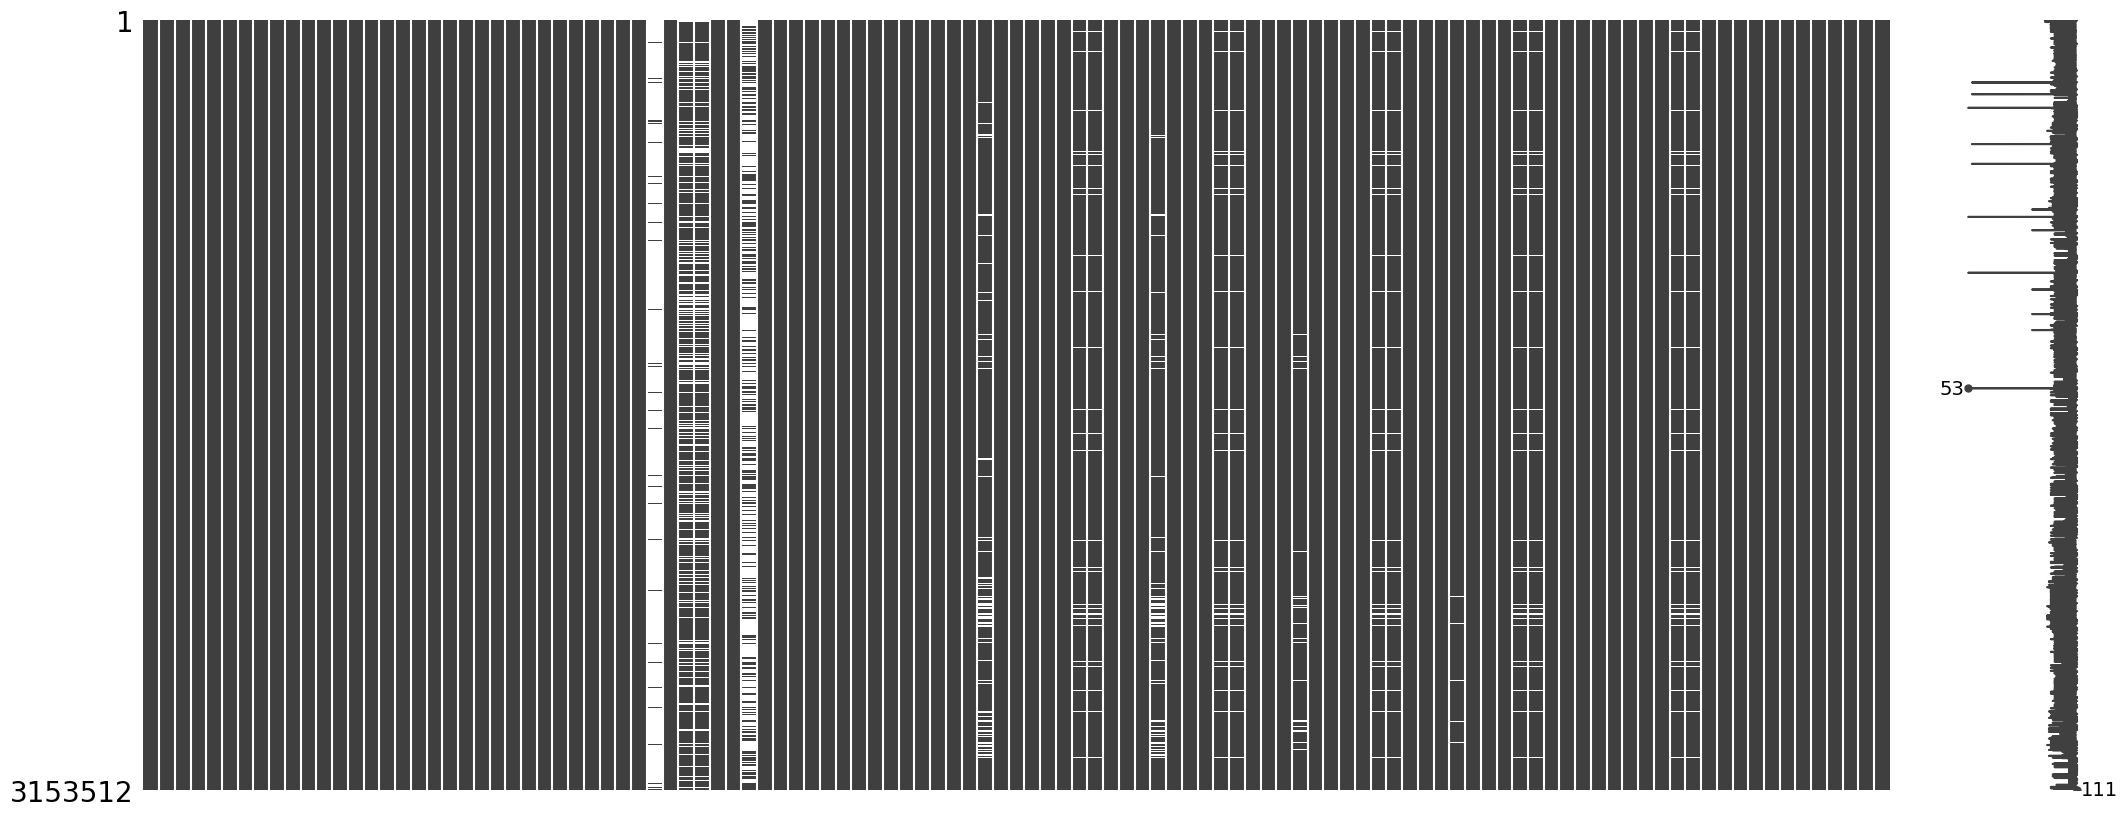

In [6]:
# Show report for NaN rows
reports.nan_attributes(
    data_frame=precoce_ms_data_frame, total_nan=precoce_ms_data_frame.isna().sum().sum())

<AxesSubplot:>

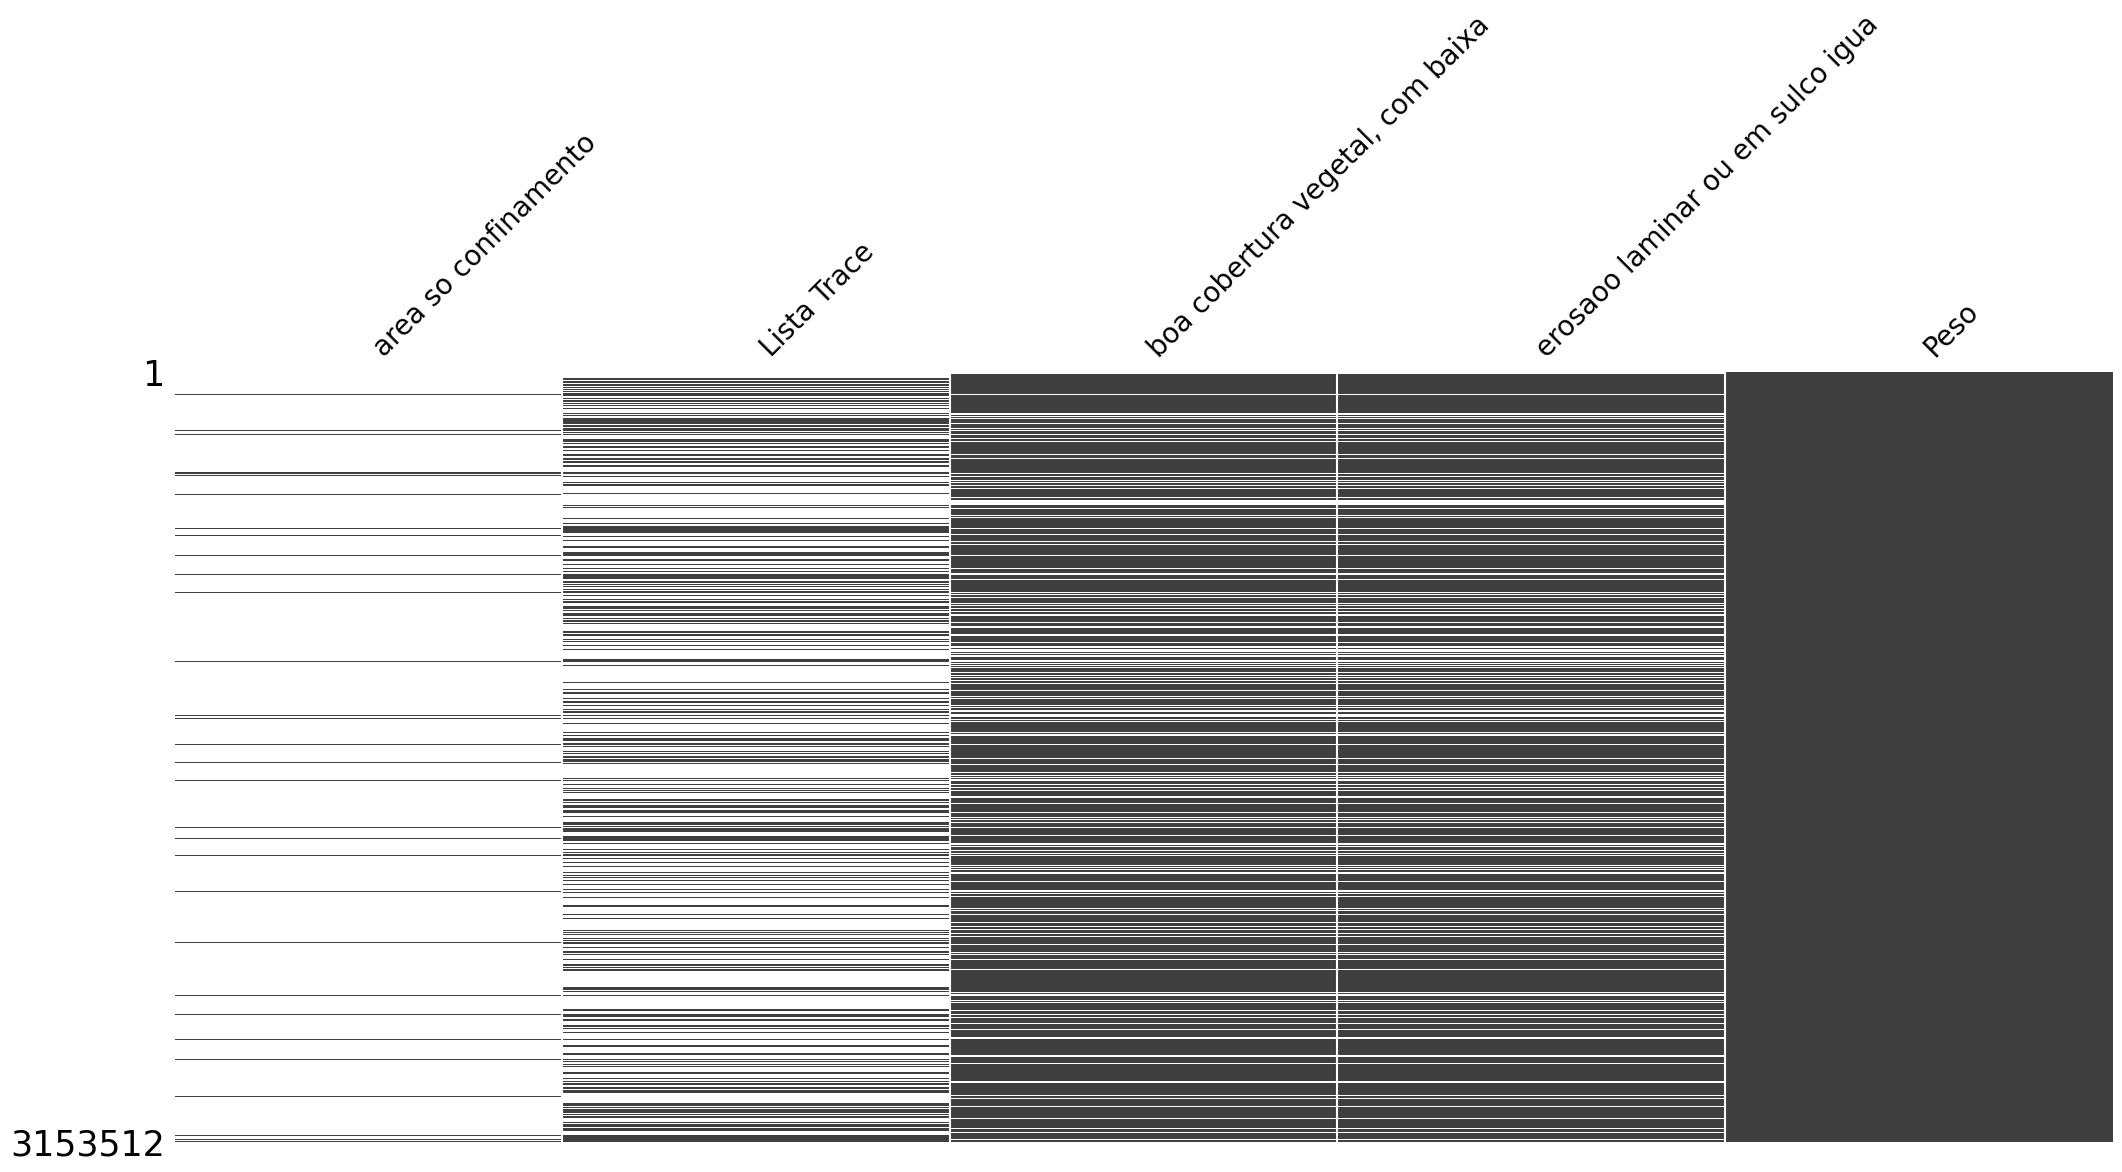

In [17]:
import missingno as msno
msno.matrix(
    precoce_ms_data_frame[['area so confinamento', 'Lista Trace', 'boa cobertura vegetal, com baixa', 'erosaoo laminar ou em sulco igua', 'Peso']],
    sparkline=False,
    fontsize=20
    )

### Report with information about NaN attributes (agg dataset)


*****INICIO RELATÓRIO ATRIBUTOS NAN******
Total de Ocorrencia de NaN no DataFrame: 3005
Linhas com valores NaN:        DataAbate  EstabelecimentoIdentificador     Tipificacao  \
0     2017-02-09                          1034  Macho Castrado   
1     2017-02-09                          1034   Macho Inteiro   
2     2017-02-17                          1034  Macho Castrado   
8     2017-02-28                          1065           Fêmea   
14    2017-03-16                          1034  Macho Castrado   
43    2017-03-28                          1859           Fêmea   
49    2017-03-29                          1801   Macho Inteiro   
64    2017-04-03                          1034  Macho Castrado   
71    2017-04-04                          1065           Fêmea   
98    2017-04-10                          4107  Macho Castrado   
99    2017-04-10                          4107   Macho Inteiro   
135   2017-04-17                          1065           Fêmea   
137   2017-04-17             

Coluna total_NaN  Porcentagem
0                        med3m_NDVI      1560     3.142564
0                       tot3m_Chuva      1351     2.721541
0                 med3m_formITUinst        12     0.024174
0                  med3m_preR_milho        12     0.024174
0                    med3m_preR_boi        12     0.024174
0               rastreamento SISBOV        10     0.020145
0                   regua de manejo         8     0.016116
0          identificacao individual         8     0.016116
0  participa de aliancas mercadolog         8     0.016116
0                      Confinamento         8     0.016116
0             Suplementacao_a_campo         8     0.016116
0                  SemiConfinamento         8     0.016116

A matrix representation of the missing values (white) by variable
*****FIM RELATÓRIO ATRIBUTOS NAN******
Function nan_attributes Took 0:00:00.945062



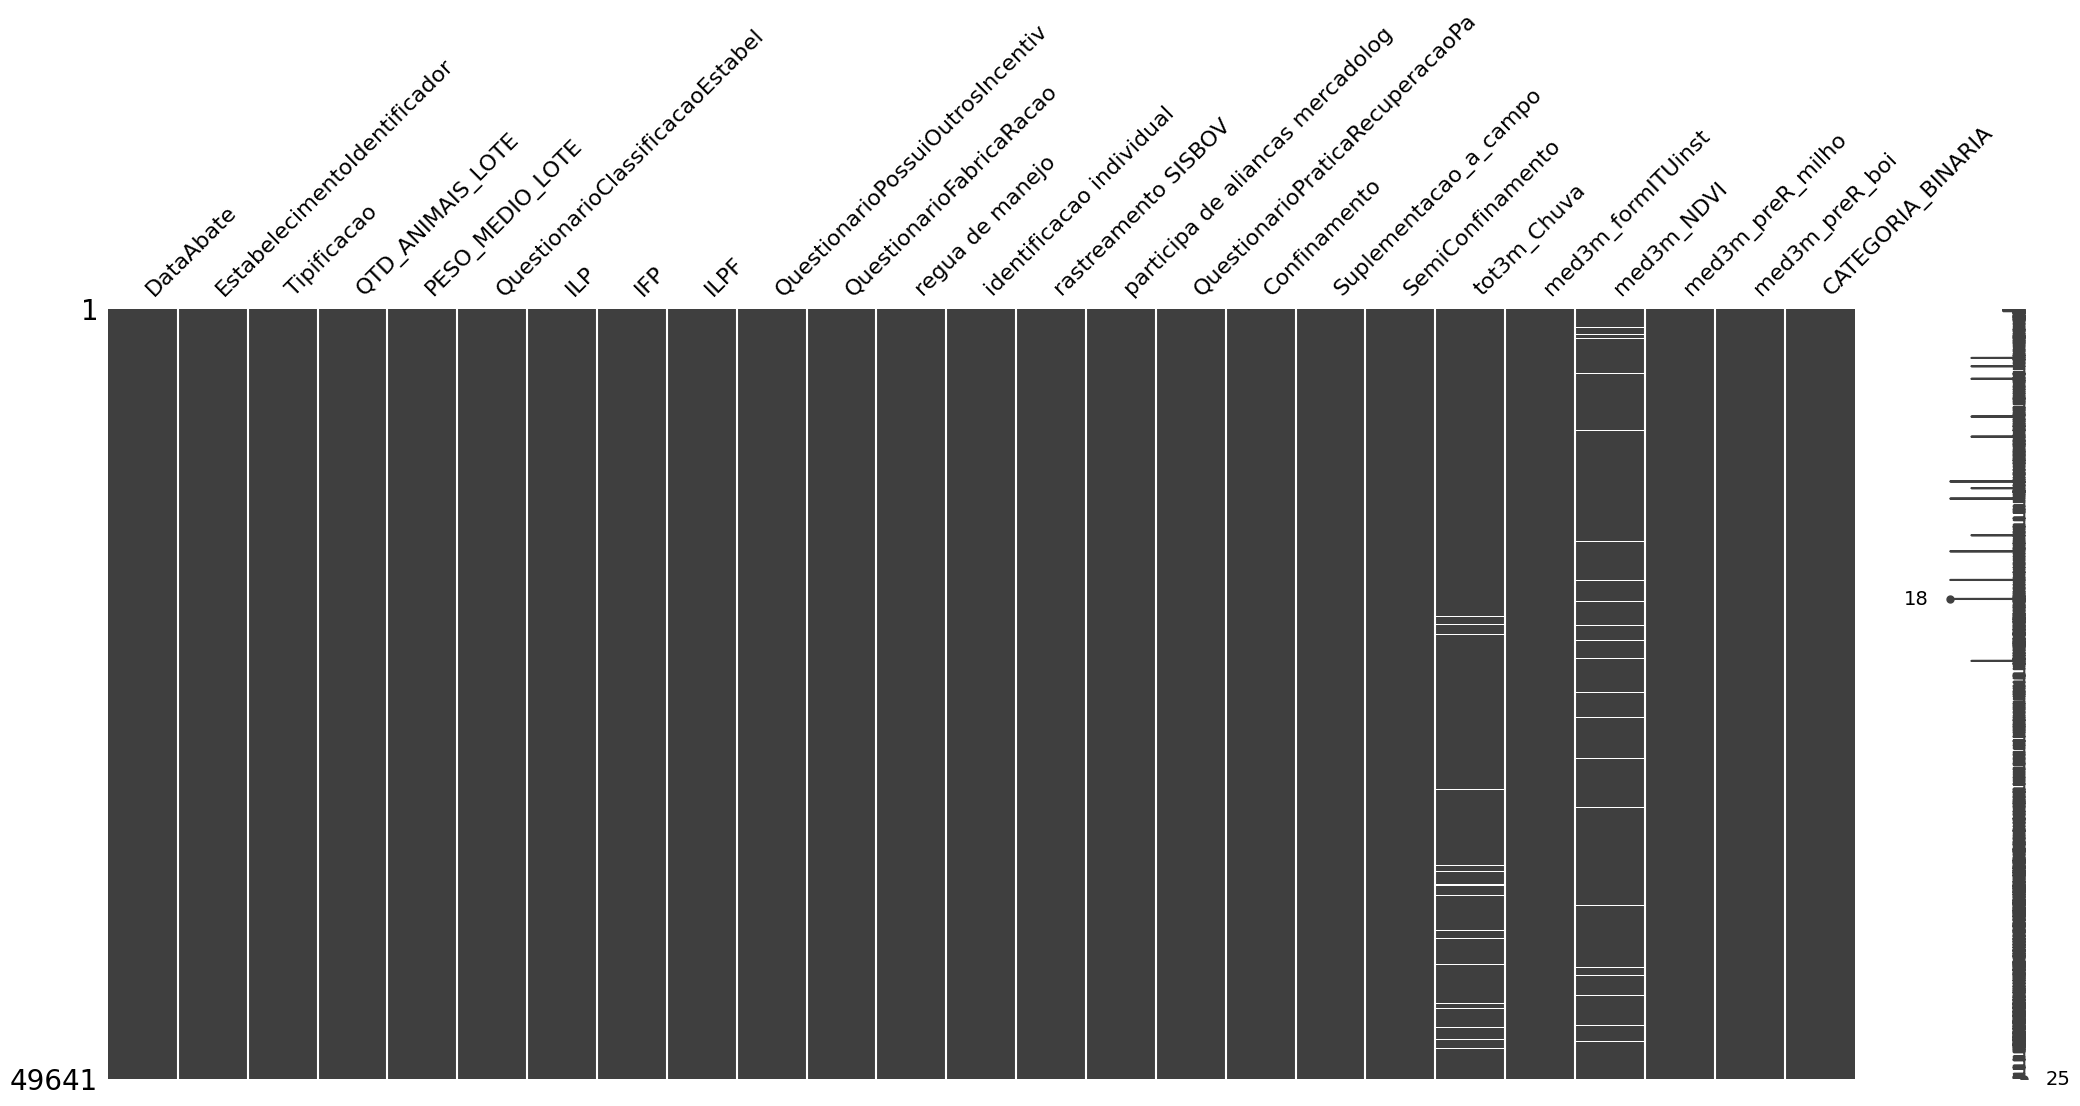

In [4]:
# Show report for NaN rows
reports.nan_attributes(
    data_frame=precoce_ms_data_frame, total_nan=precoce_ms_data_frame.isna().sum().sum())

### Delete rows with NaN attributes

In [5]:
# Strategies for NaN rows
# if is_batch_dataset:
#     # Show report for NaN rows
#     reports.nan_attributes(
#         data_frame=precoce_ms_data_frame, total_nan=precoce_ms_data_frame.isna().sum().sum())

#     # Simple imputer for NaN rows, strategy mean
#     precoce_ms_data_frame = pre_processing.simple_imputer_dataframe(
#         data_frame=precoce_ms_data_frame,
#         strategy='mean',
#         columns=settings.min_max_scaler_columns_names,
#         verbose=True
#     )

#     # Simple imputer for NaN rows, strategy most_frequent
#     precoce_ms_data_frame = pre_processing.simple_imputer_dataframe(
#         data_frame=precoce_ms_data_frame,
#         columns=settings.simple_imputer_columns_names,
#         strategy='most_frequent',
#         verbose=True
#     )

# else:
# Delete NaN rows
precoce_ms_data_frame = pre_processing.delete_nan_rows(
    data_frame=precoce_ms_data_frame, print_report=False)

reports.informations(data_frame=precoce_ms_data_frame)


*****INICIO DELETE NAN ROWS******
Linhas com valores NaN encontradas.
*****FIM DELETE NAN ROWS*********
Function delete_nan_rows Took 0:00:00.025506


*****INICIO PRINT INFOS******
Número total de linhas do DataFrame: 46736
Número de colunas: 25
Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46736 entries, 3 to 49640
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   DataAbate                         46736 non-null  datetime64[ns]
 1   EstabelecimentoIdentificador      46736 non-null  uint16        
 2   Tipificacao                       46736 non-null  category      
 3   QTD_ANIMAIS_LOTE                  46736 non-null  uint16        
 4   PESO_MEDIO_LOTE                   46736 non-null  float32       
 5   QuestionarioClassificacaoEstabel  46736 non-null  uint8         
 6   ILP                               46736 non-null  uin

## Attributes discrepancies of values, before apply encoders (to latex table)

In [14]:
print(
    precoce_ms_data_frame[
        [
            'tot3m_Chuva',
            'med3m_formITUinst',
            'med3m_NDVI',
            'med3m_preR_milho',
            'med3m_preR_boi'
        ]
    ].describe().to_latex(
        index=True,
        float_format="%.2f",
        column_format='ccccc',
    )
)

\begin{tabular}{ccccc}
\toprule
{} &  tot3m\_Chuva &  med3m\_formITUinst &  med3m\_NDVI &  med3m\_preR\_milho &  med3m\_preR\_boi \\
\midrule
count &   2768787.00 &         2768787.00 &  2768787.00 &        2768787.00 &      2768787.00 \\
mean  &       258.77 &              71.79 &        0.54 &             43.11 &          173.12 \\
std   &       197.88 &               3.51 &        0.09 &             10.84 &           38.42 \\
min   &         0.00 &              61.45 &        0.30 &             26.57 &          128.17 \\
25\%   &        91.80 &              68.86 &        0.47 &             37.07 &          145.58 \\
50\%   &       214.07 &              72.15 &        0.55 &             39.54 &          153.36 \\
75\%   &       392.93 &              74.61 &        0.62 &             49.85 &          200.20 \\
max   &      1170.24 &              80.51 &        0.75 &             75.66 &          271.42 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_24212/2003783782.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  precoce_ms_data_frame[


## Apply encoders and move target to last position in dataframe

In [6]:
# Apply ordinal encoder to the columns
precoce_ms_data_frame, settings.columns_ordinal_encoded = pre_processing.ordinal_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_ordinal_encoded=settings.columns_ordinal_encoded,
    columns_names=settings.ordinal_encoder_columns_names
)



*****INICIO ORDINAL ENCODER******
*****FIM ORDINAL ENCODER*********
Function ordinal_encoder_columns Took 0:00:02.809611



In [7]:
# Apply label encoder to the columns
precoce_ms_data_frame, settings.columns_label_encoded = pre_processing.label_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_label_encoded=settings.columns_label_encoded,
    columns_names=settings.label_encoder_columns_names
)



*****INICIO LABEL ENCODER******
*****FIM LABEL ENCODER*********
Function label_encoder_columns Took 0:00:00.683655



In [8]:
# Apply one hot encoder to the columns
precoce_ms_data_frame, settings.columns_one_hot_encoded = pre_processing.one_hot_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_one_hot_encoded=settings.columns_one_hot_encoded,
    columns_names=settings.one_hot_encoder_columns_names
)



*****INICIO ONE-HOT ENCODER******
*****INICIO DELETE COLUNAS******
Coluna Tipificacao excluída.
*****FIM DELETE COLUNAS*********
*****FIM ONE-HOT ENCODER*********
Function one_hot_encoder_columns Took 0:00:02.881579



In [15]:
# Apply min max scaler to the columns
precoce_ms_data_frame, settings.columns_min_max_scaled = pre_processing.min_max_scaler_columns(
    data_frame=precoce_ms_data_frame, columns_min_max_scaled=settings.columns_min_max_scaled,
    columns_names=settings.min_max_scaler_columns_names
)



*****INICIO MIN-MAX SCALER******
*****FIM MIN-MAX SCALER*********
Function min_max_scaler_columns Took 0:00:05.279366



In [16]:
# Move the target column to the last position in dataframe
precoce_ms_data_frame = utils.move_cloumns_last_positions(
    data_frame=precoce_ms_data_frame, columns_names=[settings.class_column])

## Attributes discrepancies of values, after apply encoders (to latex table)

In [19]:
print(
    precoce_ms_data_frame[
        [
            'tot3m_Chuva',
            'med3m_formITUinst',
            'med3m_NDVI',
            'med3m_preR_milho',
            'med3m_preR_boi'
        ]
    ].describe().to_latex(
        index=True,
        float_format="%.2f",
        column_format='ccccc',
    )
)

\begin{tabular}{ccccc}
\toprule
{} &  tot3m\_Chuva &  med3m\_formITUinst &  med3m\_NDVI &  med3m\_preR\_milho &  med3m\_preR\_boi \\
\midrule
count &   2768787.00 &         2768787.00 &  2768787.00 &        2768787.00 &      2768787.00 \\
mean  &         0.22 &               0.54 &        0.54 &              0.34 &            0.31 \\
std   &         0.17 &               0.18 &        0.20 &              0.22 &            0.27 \\
min   &         0.00 &               0.00 &        0.00 &              0.00 &            0.00 \\
25\%   &         0.08 &               0.39 &        0.38 &              0.21 &            0.12 \\
50\%   &         0.18 &               0.56 &        0.56 &              0.26 &            0.18 \\
75\%   &         0.34 &               0.69 &        0.71 &              0.47 &            0.50 \\
max   &         1.00 &               1.00 &        1.00 &              1.00 &            1.00 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_24212/2003783782.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  precoce_ms_data_frame[


## Correlation matrix

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

*Spearman's Correlation, Further, the two variables being considered may have a non-Gaussian distribution.*

### Pearson method

In [ ]:
# Correlation matrix using pearson method, between all attributes
reports.correlation_matrix(
    data_frame=precoce_ms_data_frame, method='pearson',
    display_matrix=True, export_matrix=True, path_save_matrix=settings.PATH_SAVE_PLOTS,
    print_corr_matrix_summarized=True)

In [ ]:
# Correlation matrix using pearson method, between all attributes and the class attribute
reports.correlation_matrix(
    data_frame=precoce_ms_data_frame, method='pearson', attribute=settings.class_column,
    display_matrix=True, export_matrix=True, path_save_matrix=settings.PATH_SAVE_PLOTS)

### Spearman method

In [11]:
# Correlation matrix using spearman method, between all attributes
reports.correlation_matrix(
    data_frame=precoce_ms_data_frame, method='spearman',
    display_matrix=True, export_matrix=True, path_save_matrix=settings.PATH_SAVE_PLOTS,
    print_corr_matrix_summarized=True,
    lower_limit=-0.95, upper_limit=0.95, to_latex=True)


*****INICIO CORRELATION MATRIX******
Correlation summarized:


Atributo 1         Atributo 2  Correlação
0    med3m_formITUmax  med3m_formITUinst    0.998690
0    med7d_formITUmax  med7d_formITUinst    0.997755
0      med12m_TempMin    med12m_TempInst    0.996566
0       med7d_TempMin     med7d_TempInst    0.996232
0     med12m_preR_boi     med6m_preR_boi    0.990540
0      med1m_preR_boi     med7d_preR_boi    0.990316
0      med6m_preR_boi     med3m_preR_boi    0.986892
0     med1m_preR_soja    med7d_preR_soja    0.984408
0     med12m_preR_boi     med3m_preR_boi    0.982283
0      med3m_preR_boi     med1m_preR_boi    0.978714
0    med1m_preR_milho   med7d_preR_milho    0.977185
0     med12m_preR_boi     med1m_preR_boi    0.972668
0           med3m_EVI         med3m_NDVI    0.972584
0      med3m_preR_boi     med7d_preR_boi    0.970481
0     med12m_preR_boi     med7d_preR_boi    0.968733
0           med6m_EVI         med6m_NDVI    0.967767
0           med1m_EVI         med1m_NDVI    0.967723
0      med6m_preR_boi     med1m_preR_boi    0.967485
0     med6m_preR_soja    med3m_preR_soja    0.964836
0  med12m_formITUinst    med12m_TempInst    0.962142
0     med3m_preR_soja    med1m_preR_soja    0.961348
0      med6m_preR_boi     med7d_preR_boi    0.959840
0           med7d_EVI         med7d_NDVI    0.958319
0           med1m_EVI          med7d_EVI    0.957945
0   med12m_preR_milho   med12m_preR_soja    0.957358
0  med12m_formITUinst     med12m_TempMin    0.957145
0   med6m_formITUinst     med6m_TempInst    0.955611
0          med1m_NDVI         med7d_NDVI    0.954781
0           med1m_EVI         med7d_NDVI    0.953960

Correlation summarized in latex format:
\begin{tabular}{llr}
\toprule
        Atributo 1 &        Atributo 2 &  Correlação \\
\midrule
  med3m\_formITUmax & med3m\_formITUinst &        1.00 \\
  med7d\_formITUmax & med7d\_formITUinst &        1.00 \\
    med12m\_TempMin &   med12m\_TempInst &        1.00 \\
     med7d\_TempMin &    med7d\_TempInst &        1.00 \\
   med12m\_preR\_boi &    med6m\_preR\_boi &        0.99 \\
    med1m\_preR\_boi &    med7d\_preR\_boi &        0.99 \\
    med6m\_preR\_boi &    med3m\_preR\_boi &        0.99 \\
   med1m\_preR\_soja &   med7d\_preR\_soja &        0.98 \\
   med12m\_preR\_boi &    med3m\_preR\_boi &        0.98 \\
    med3m\_preR\_boi &    med1m\_preR\_boi &        0.98 \\
  med1m\_preR\_milho &  med7d\_preR\_milho &        0.98 \\
   med12m\_preR\_boi &    med1m\_preR\_boi &        0.97 \\
         med3m\_EVI &        med3m\_NDVI &        0.97 \\
    med3m\_preR\_boi &    med7d\_preR\_boi &        0.97 \\
   med12m\_preR\_boi &    med7d\_pr

/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/precoce-ms-classification/reports.py:1143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(correlation_summarized.to_latex(
/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/precoce-ms-classification/reports.py:202: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  styled_table = correlation_matrix.style.background_gradient(cmap, axis=1)\


[0323/101722.930418:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid=0

[0323/101723.380314:WARNING:sandbox_linux.cc(393)] InitializeSandbox() called with multiple threads in process gpu-process.
114180 bytes written to file /tmp/tmp90iyqjua/temp.png
[0323/101724.068656:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid=0

[0323/101724.245590:WARNING:sandbox_linux.cc(393)] InitializeSandbox() called with multiple threads in process gpu-process.
114180 bytes written to file /tmp/tmp1xm28lpd/temp.png
[0323/101725.055437:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_parano

SyntaxError: not a PNG file (<string>)

In [12]:
# Correlation matrix using spearman method, between all attributes and the class attribute
reports.correlation_matrix(
    data_frame=precoce_ms_data_frame, method='spearman', attribute=settings.class_column,
    display_matrix=True, export_matrix=True, path_save_matrix=settings.PATH_SAVE_PLOTS)


*****INICIO CORRELATION MATRIX******


[0323/105709.297699:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid=0

[0323/105709.407662:WARNING:sandbox_linux.cc(393)] InitializeSandbox() called with multiple threads in process gpu-process.
76074 bytes written to file /tmp/tmp3uroyvzd/temp.png
[0323/105709.936605:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid=0

[0323/105710.093433:WARNING:sandbox_linux.cc(393)] InitializeSandbox() called with multiple threads in process gpu-process.
76074 bytes written to file /tmp/tmpjmu9sto7/temp.png
[0323/105710.550705:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid

SyntaxError: not a PNG file (<string>)

### Delete features by correlation

In [ ]:
# Delete features by correlation
precoce_ms_data_frame = pre_processing.drop_feature_by_correlation(
    data_frame=precoce_ms_data_frame,
    method='spearman',
    columns_names=settings.columns_names_drop_feature_by_correlation)

#### Save result dataframe after delete features by correlation

In [13]:
# Apply inverse ordinal encoder to the columns
precoce_ms_data_frame, settings.columns_ordinal_encoded = pre_processing.inverse_ordinal_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_ordinal_encoded=settings.columns_ordinal_encoded)

# Apply inverse label encoder to the columns
precoce_ms_data_frame, settings.columns_label_encoded = pre_processing.inverse_label_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_label_encoded=settings.columns_label_encoded)

# Apply inverse one hot encoder to the columns
precoce_ms_data_frame, settings.columns_one_hot_encoded = pre_processing.inverse_one_hot_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_one_hot_encoded=settings.columns_one_hot_encoded)

# Apply inverse min max scaler to the columns
precoce_ms_data_frame, settings.columns_min_max_scaled = pre_processing.inverse_min_max_scaler_columns(
    data_frame=precoce_ms_data_frame, columns_min_max_scaled=settings.columns_min_max_scaled)

# Move the target column to the last position in dataframe
precoce_ms_data_frame = utils.move_cloumns_last_positions(
    data_frame=precoce_ms_data_frame, columns_names=[settings.class_column])

# Save dataframe to csv file
# csv_treatments.generate_new_csv(
#     data_frame=precoce_ms_data_frame,
#     csv_path='/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/base_dados/TAB_MODELAGEM_RAFAEL_2020_1-after_drop_feature_by_correlation-{}.csv'.format(
#         utils.get_current_datetime()
#     )
# )


*****INICIO INVERSE ORDINAL ENCODER******
*****FIM INVERSE ORDINAL ENCODER*********
Function inverse_ordinal_encoder_columns Took 0:00:00.643093


*****INICIO INVERSE LABEL ENCODER******
*****FIM INVERSE LABEL ENCODER*********
Function inverse_label_encoder_columns Took 0:00:00.144142


*****INICIO INVERSE ONE-HOT ENCODER******
*****INICIO DELETE COLUNAS******
Coluna Tipificacao_Fêmea excluída.
Coluna Tipificacao_Macho Castrado excluída.
Coluna Tipificacao_Macho Inteiro excluída.
*****FIM DELETE COLUNAS*********
*****FIM INVERSE ONE-HOT ENCODER*********
Function inverse_one_hot_encoder_columns Took 0:00:02.155651


*****INICIO INVERSE MIN-MAX SCALER******
*****FIM INVERSE MIN-MAX SCALER*********
Function inverse_min_max_scaler_columns Took 0:00:04.783214



## Print histogram for each attribute

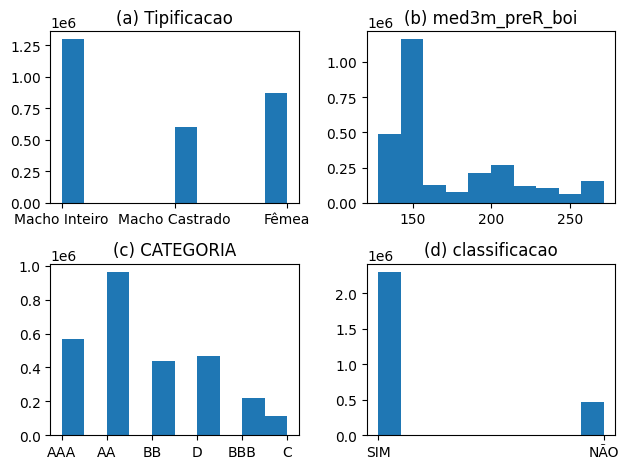

In [13]:
import matplotlib.pyplot as plt

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

ax0.hist(precoce_ms_data_frame['Tipificacao'])
ax0.set_title('(a) Tipificacao')

ax1.hist(precoce_ms_data_frame['med3m_preR_boi'])
ax1.set_title('(b) med3m_preR_boi')

ax2.hist(precoce_ms_data_frame['CATEGORIA'])
ax2.set_title('(c) CATEGORIA')

ax3.hist(precoce_ms_data_frame['classificacao'])
ax3.set_title('(d) classificacao')

fig.tight_layout()
plt.show()


*****INICIO IMPRIMIR HISTOGRAM******


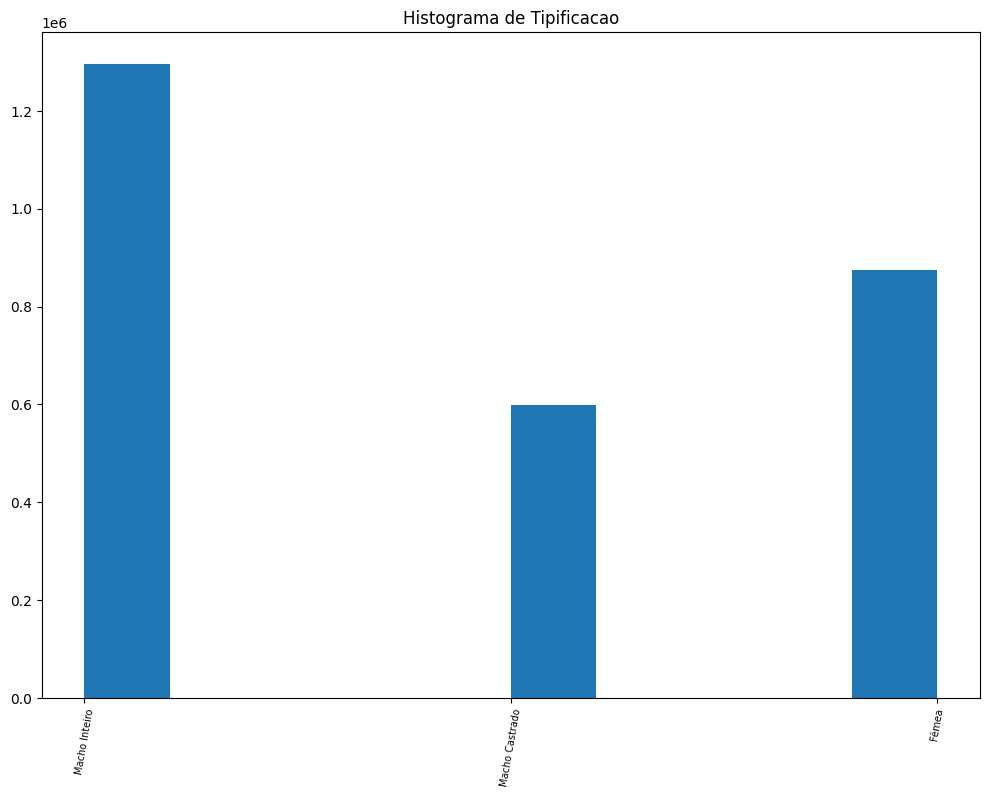

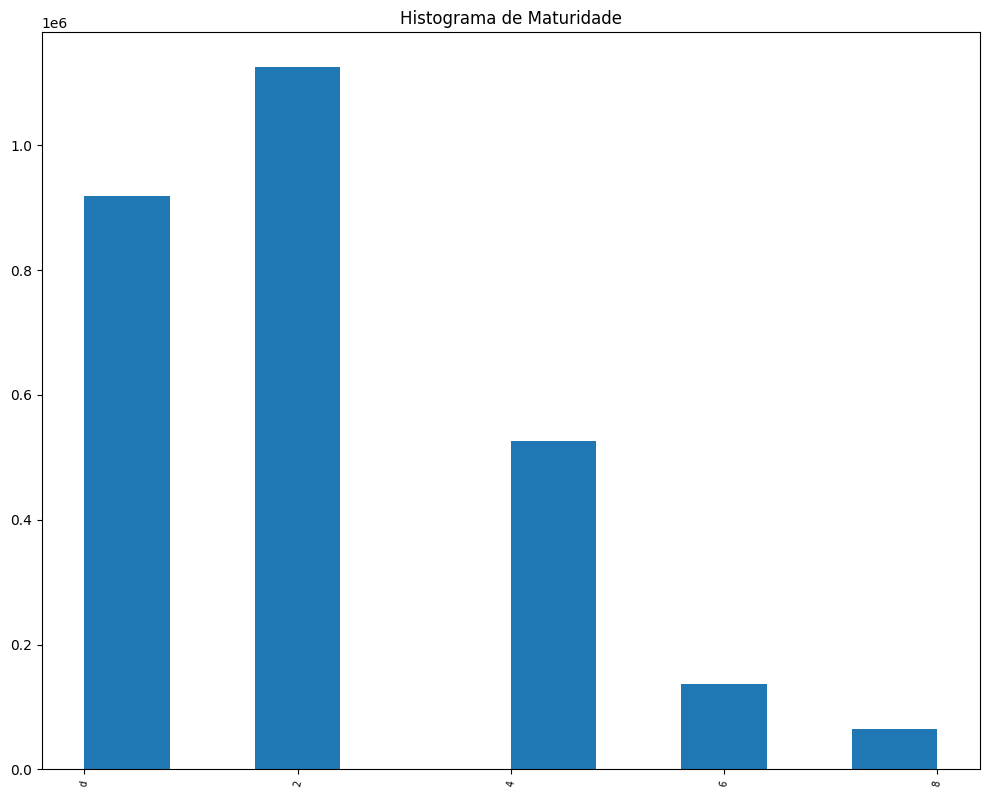

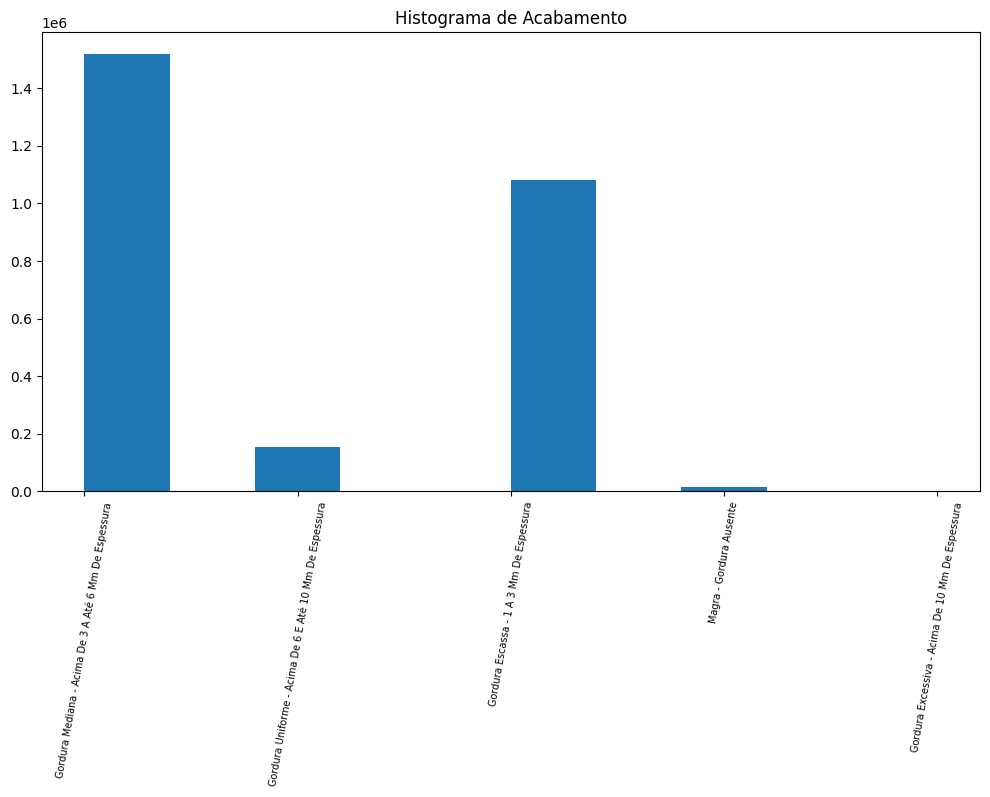

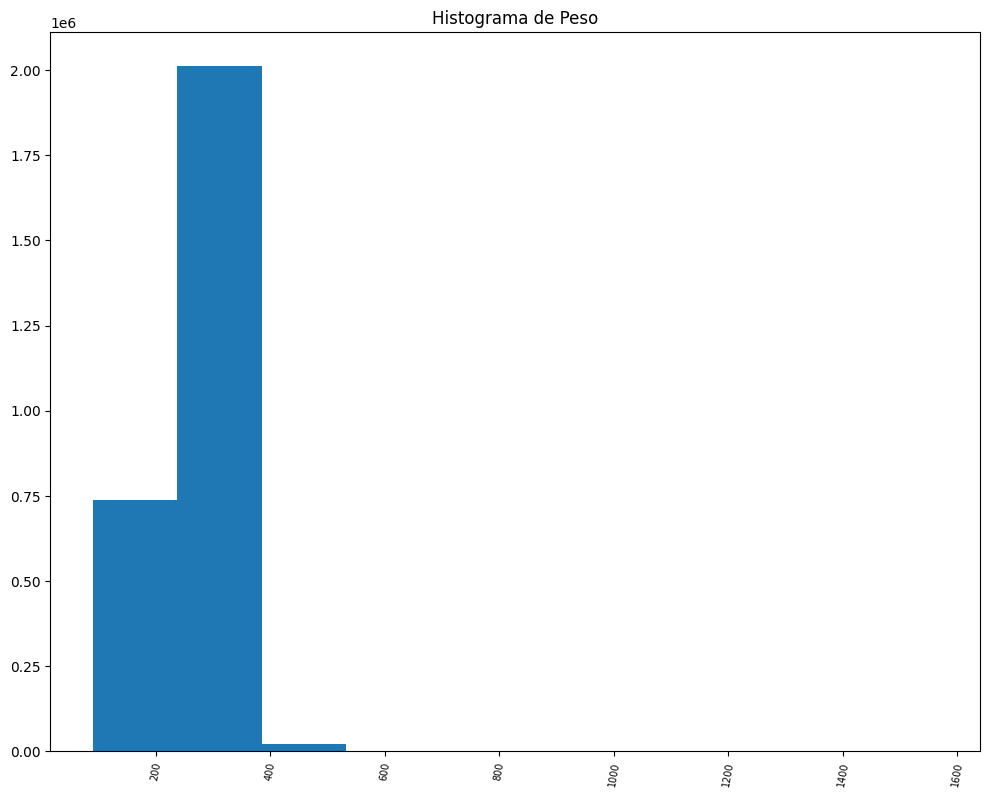

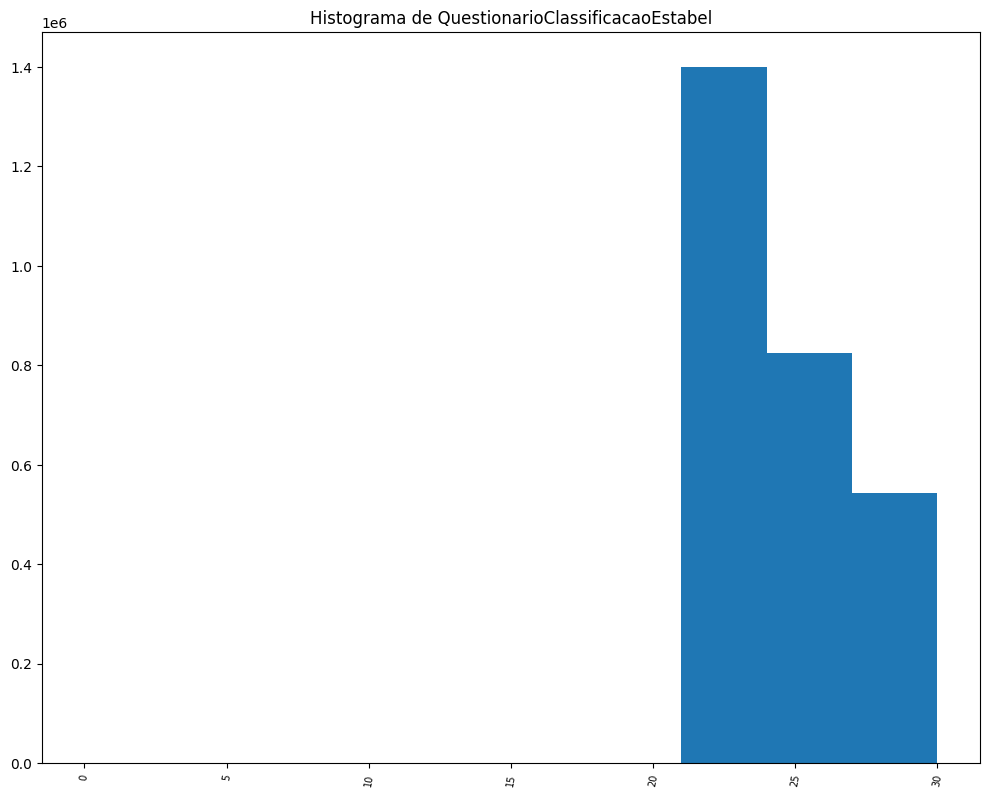

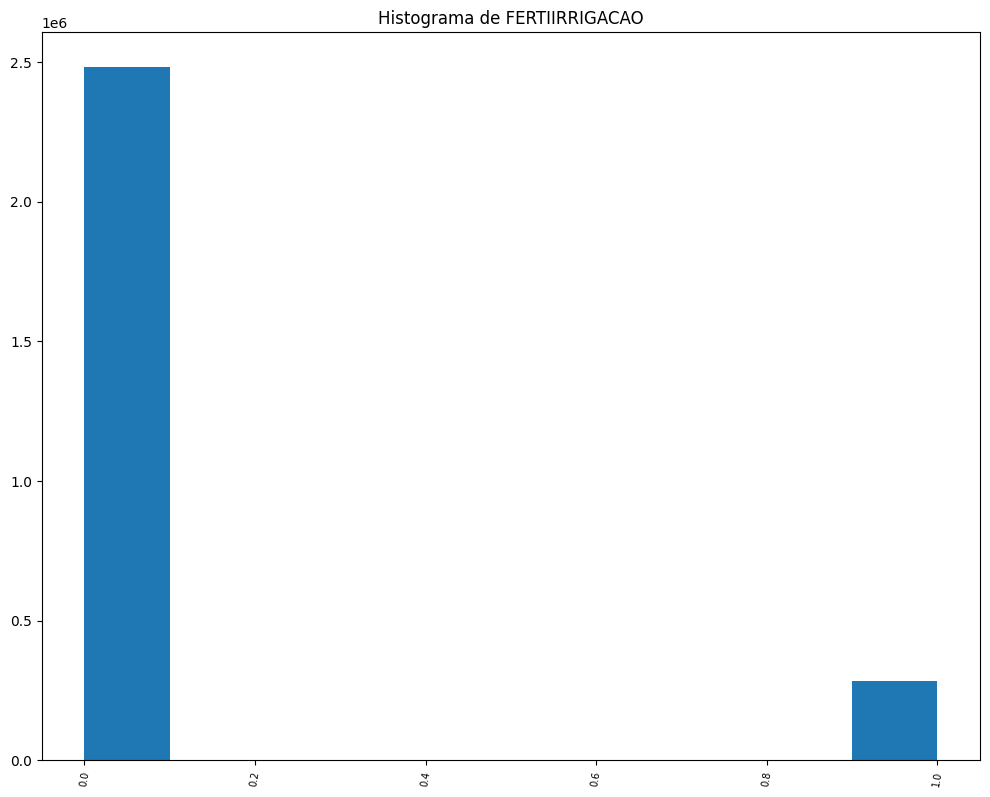

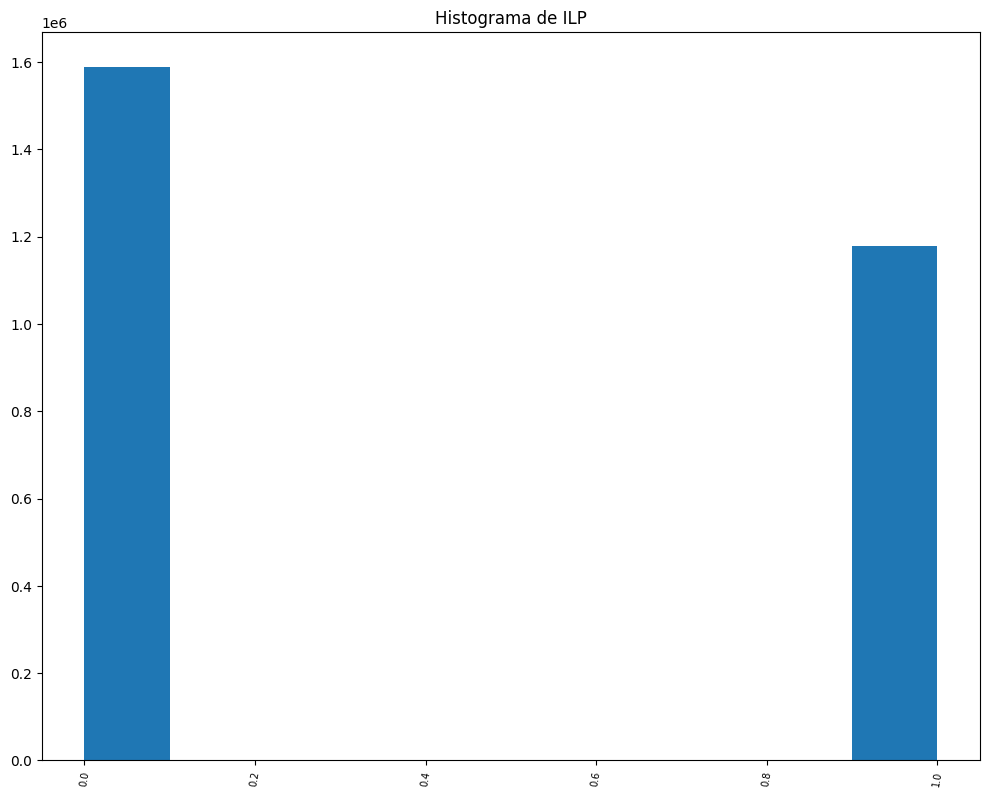

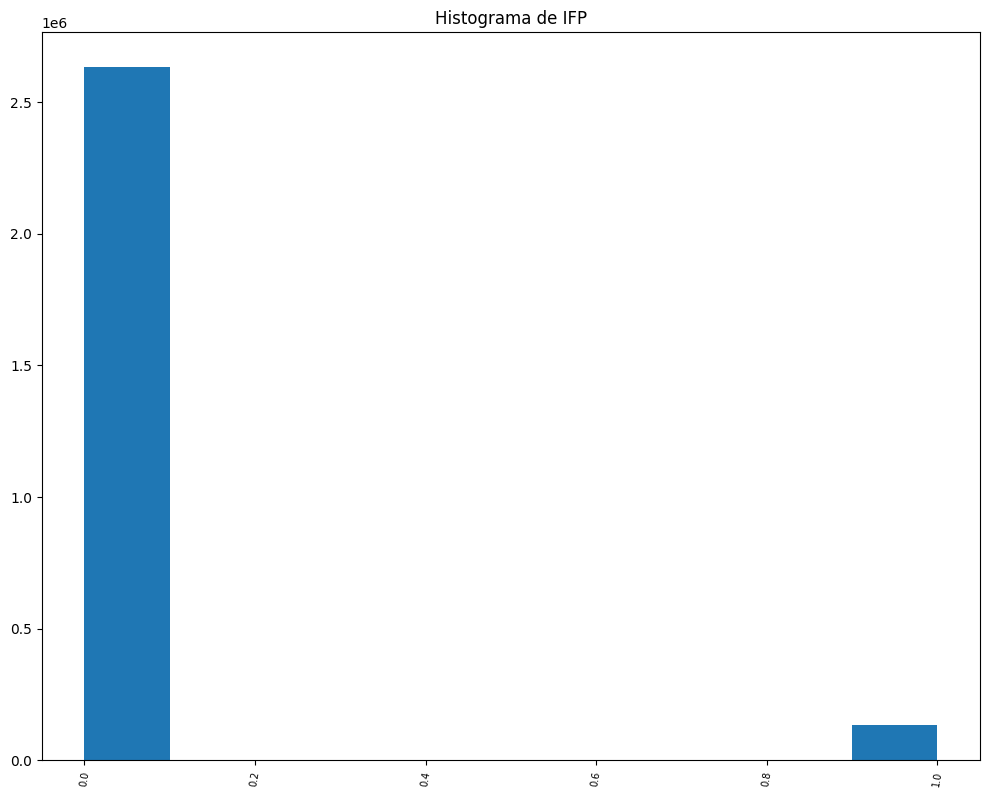

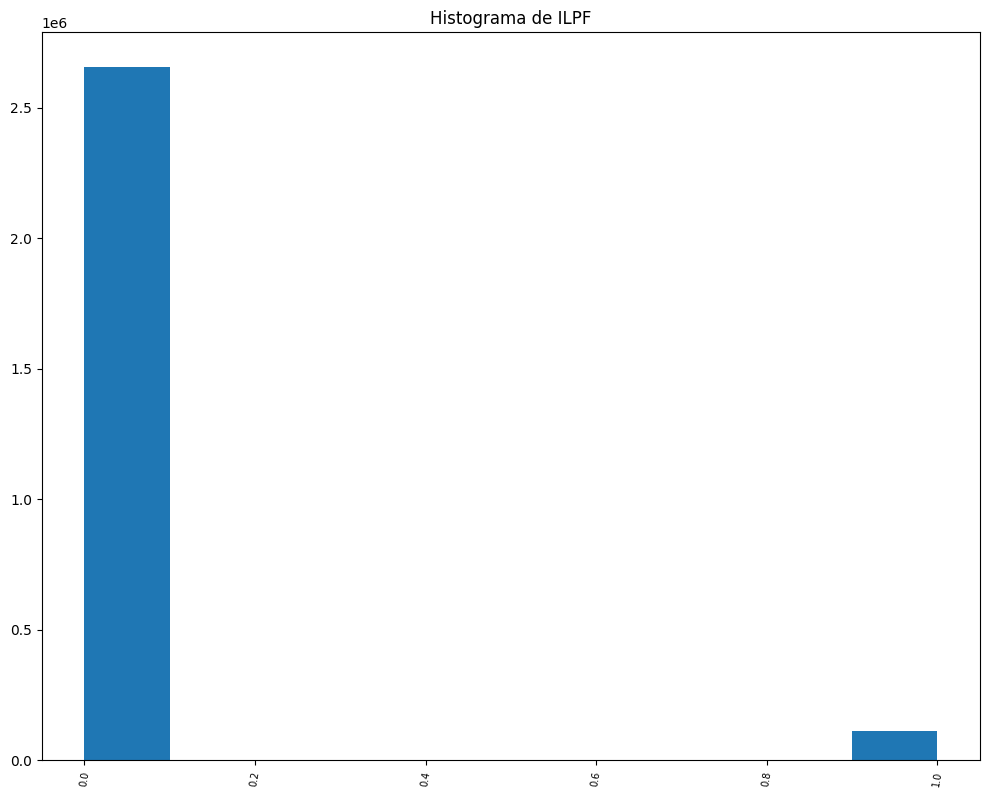

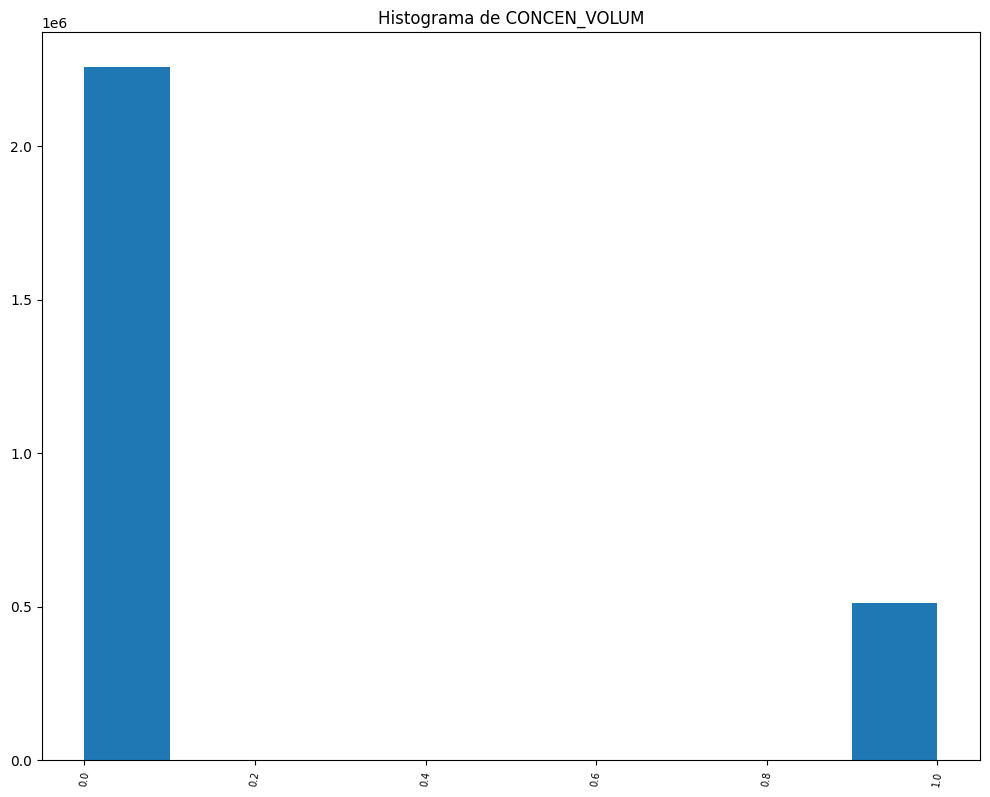

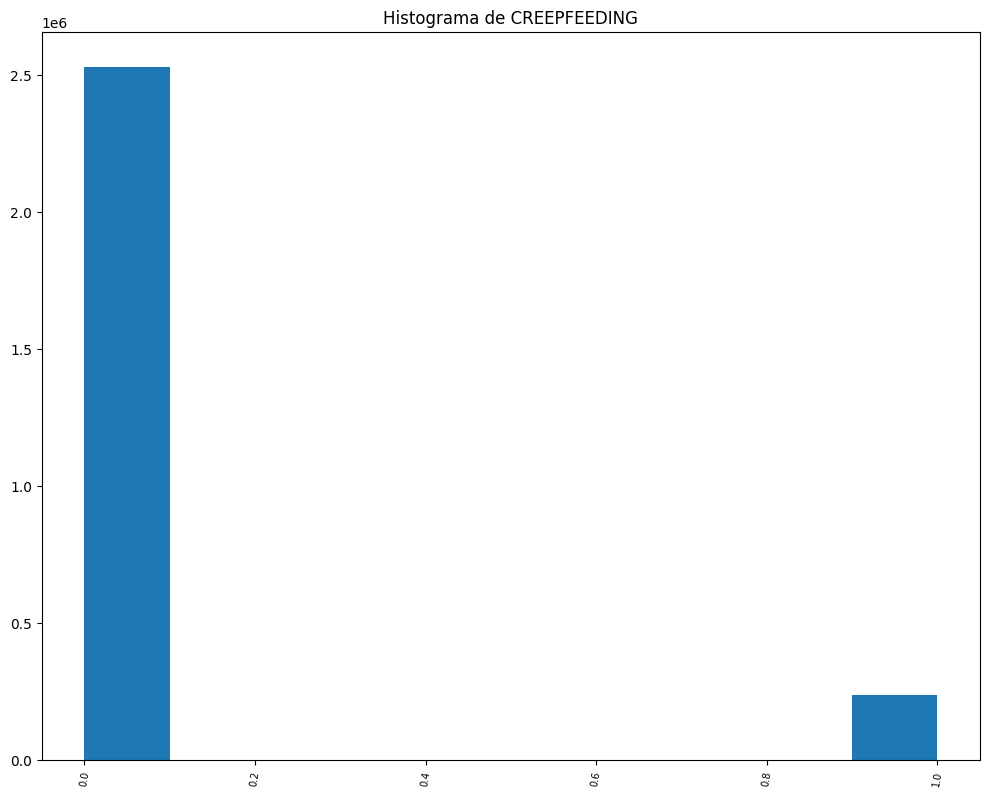

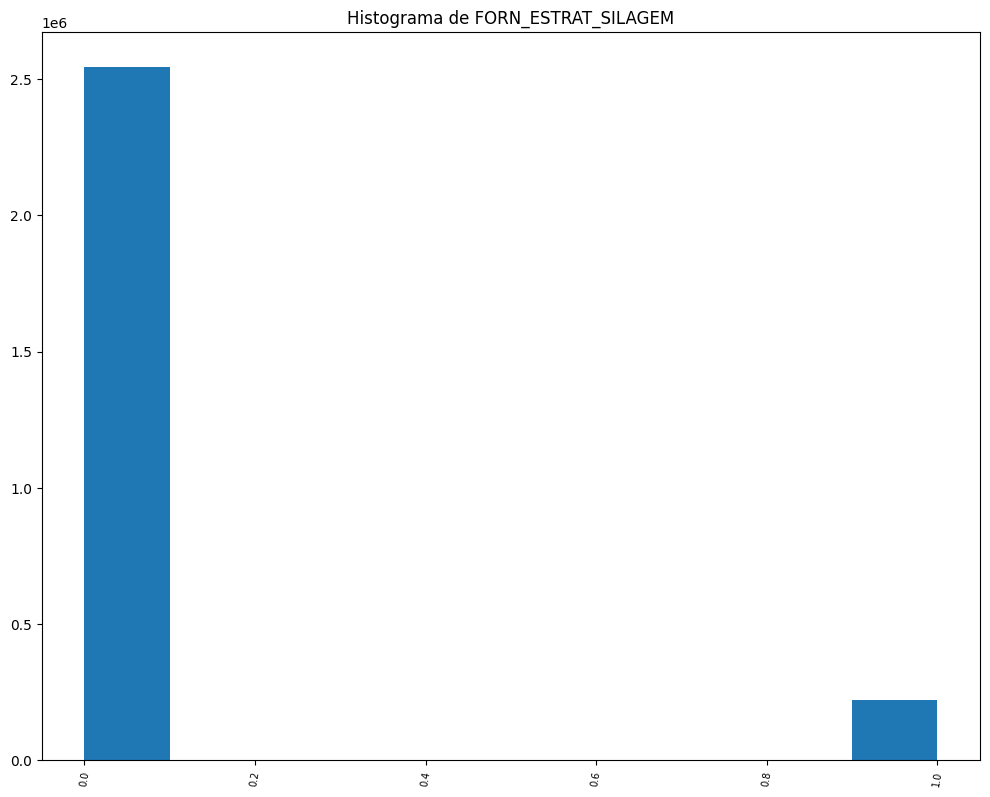

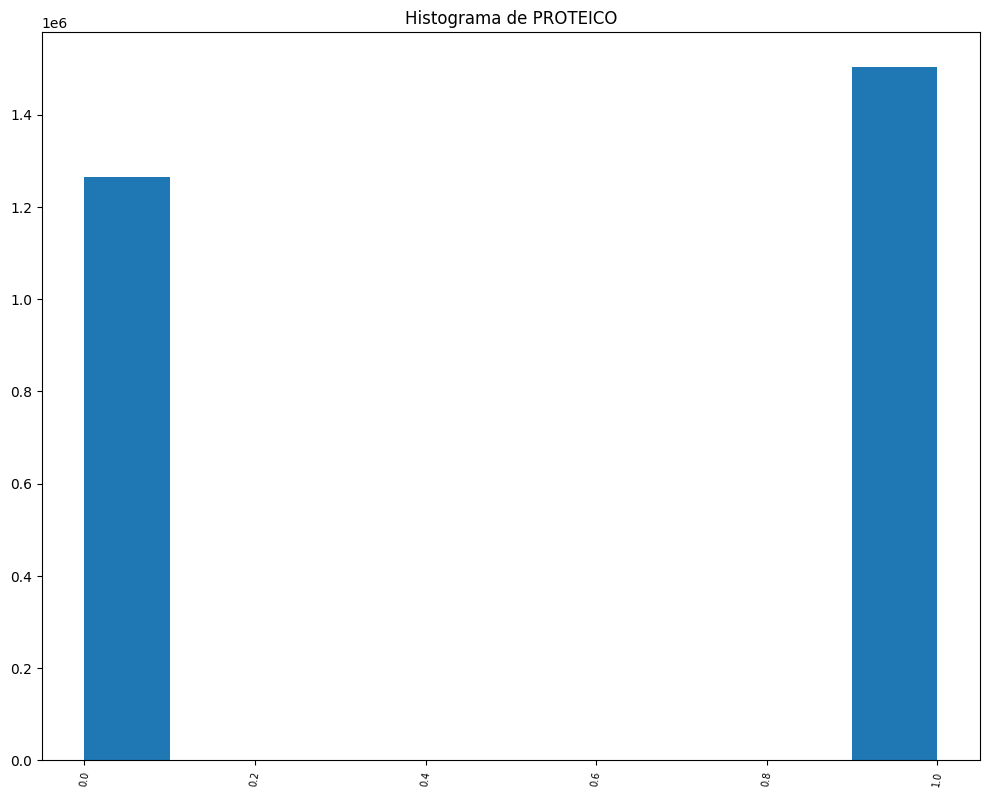

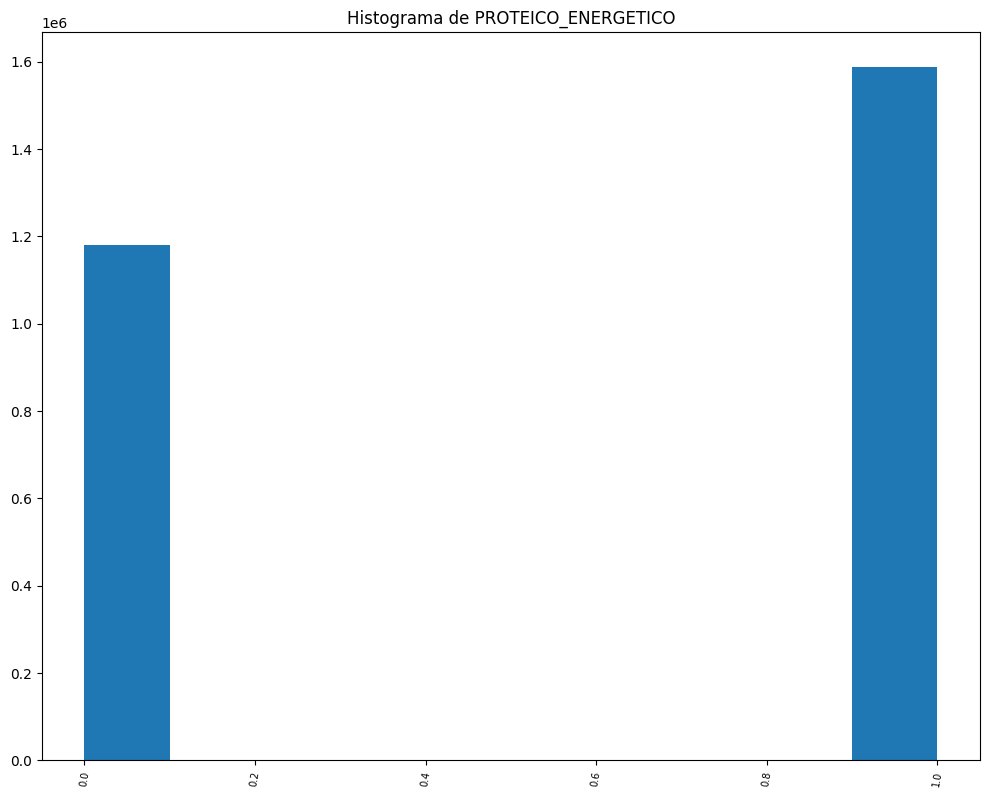

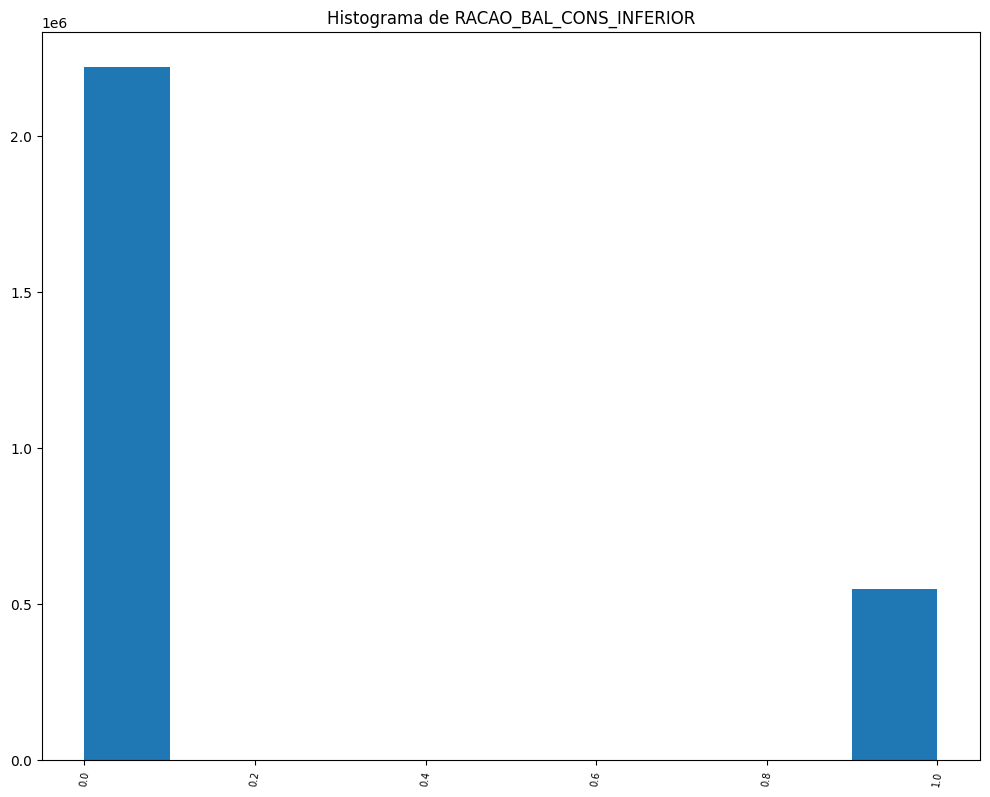

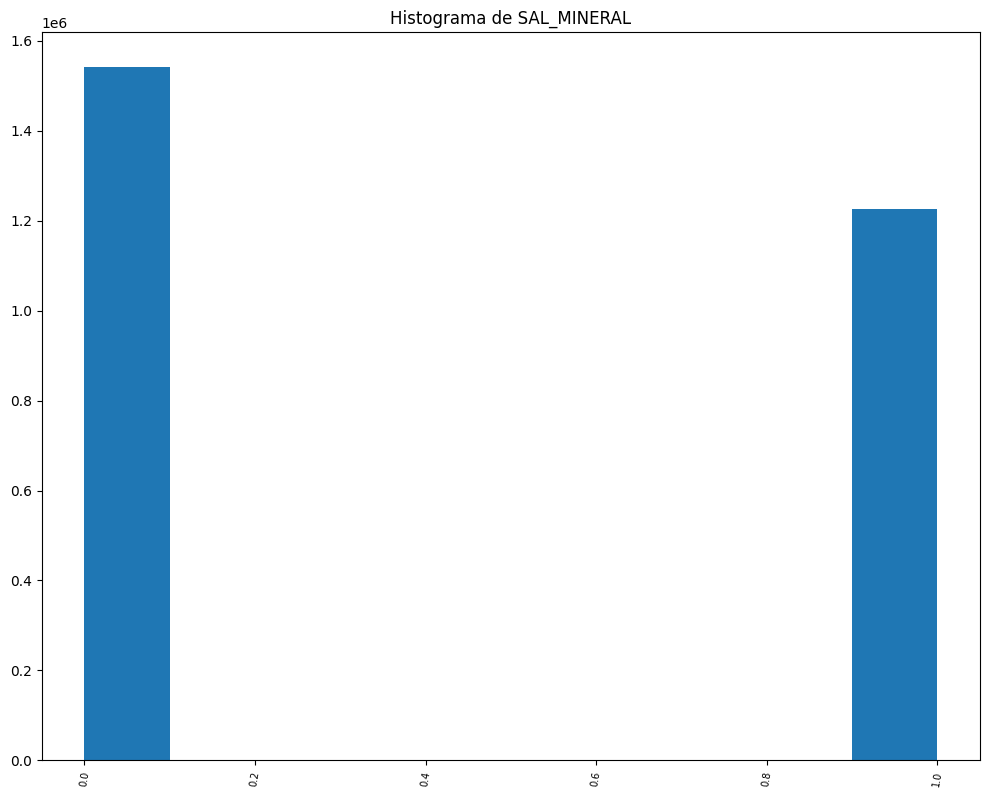

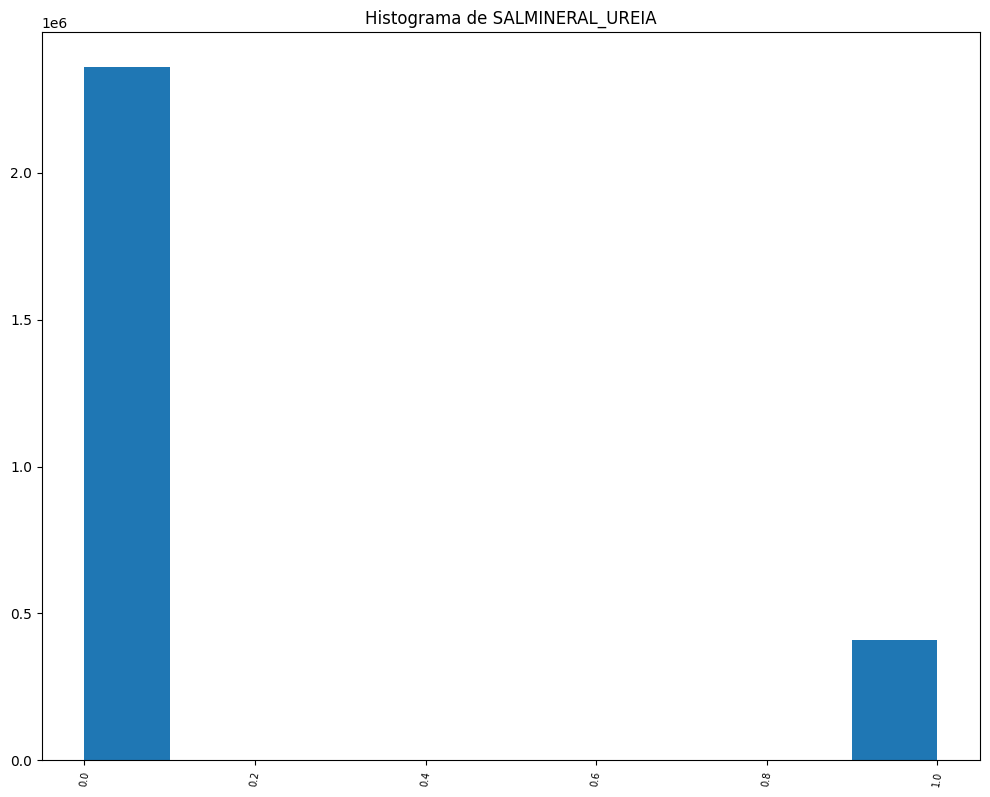

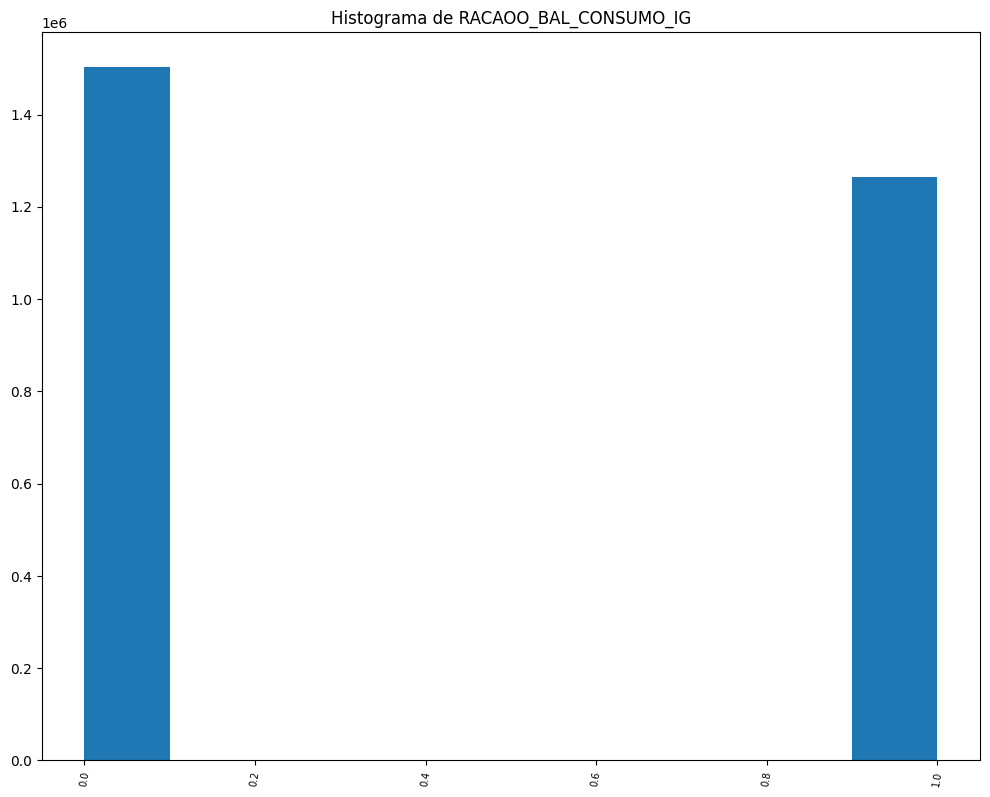

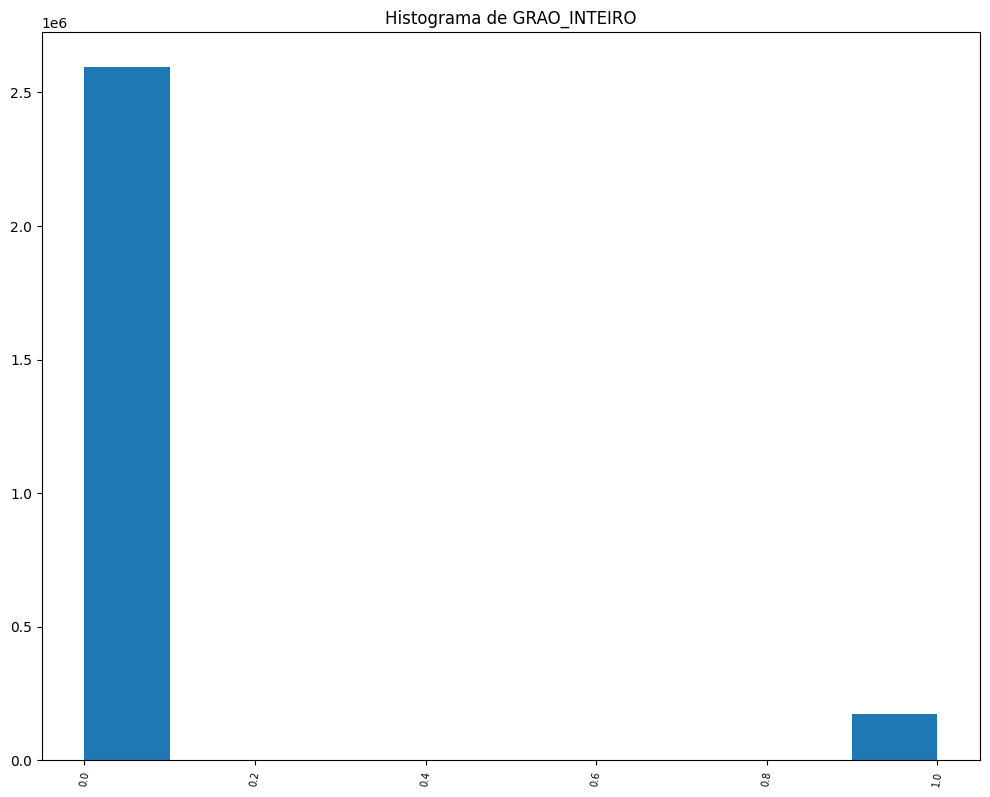

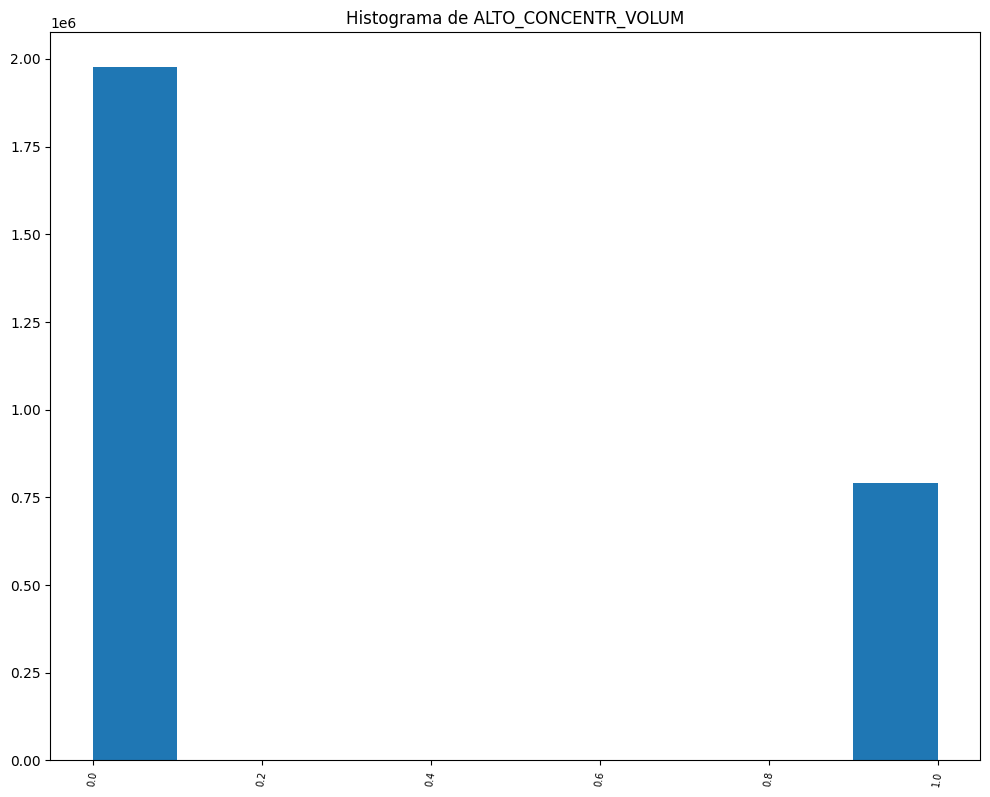

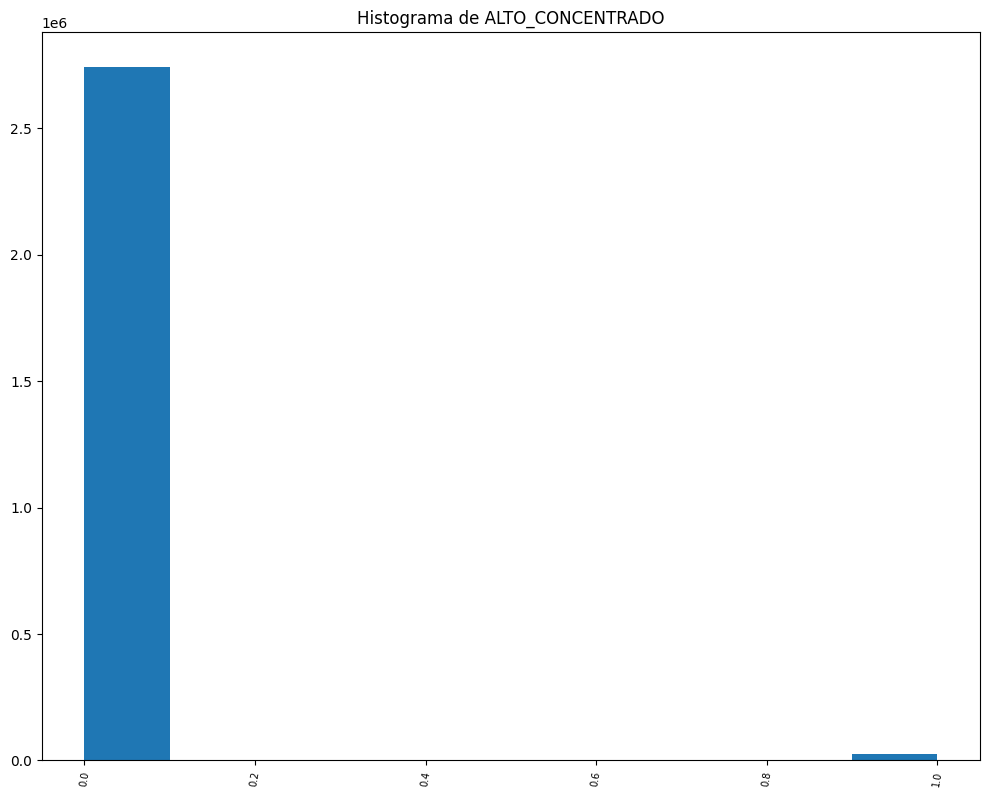

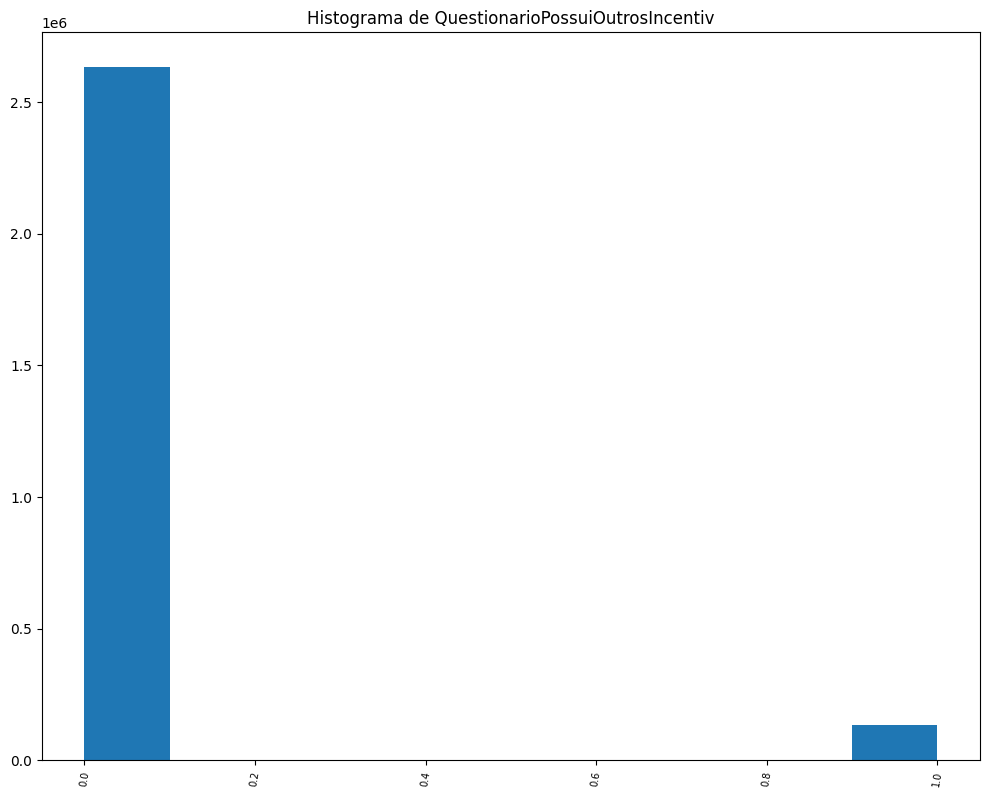

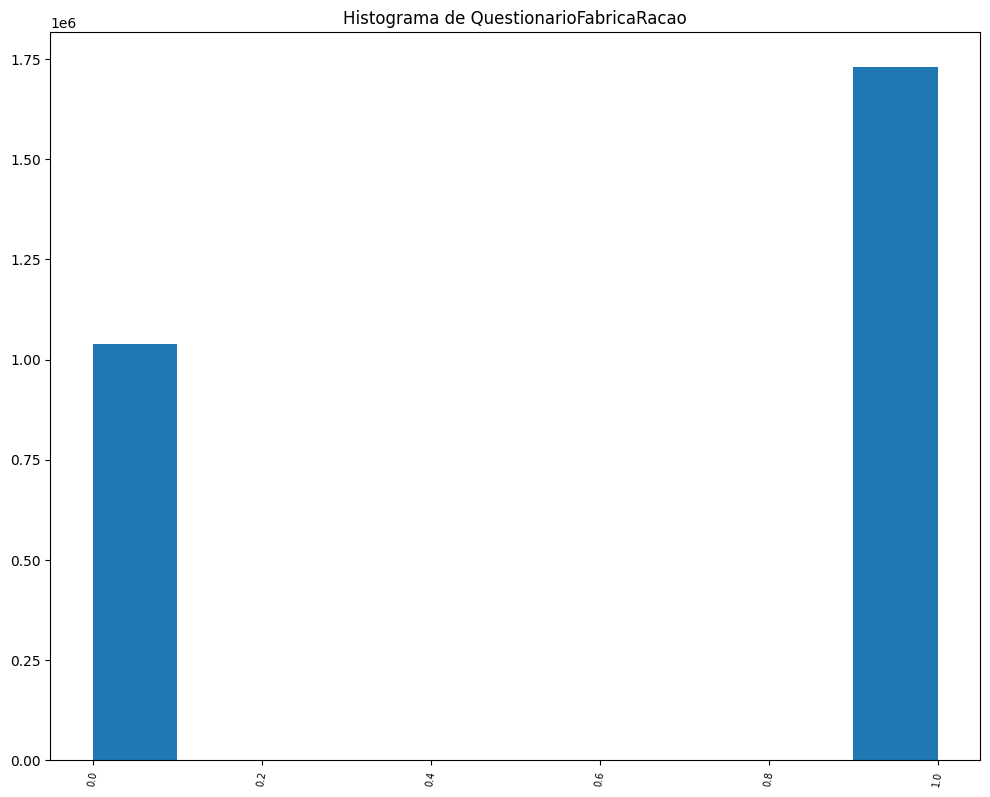

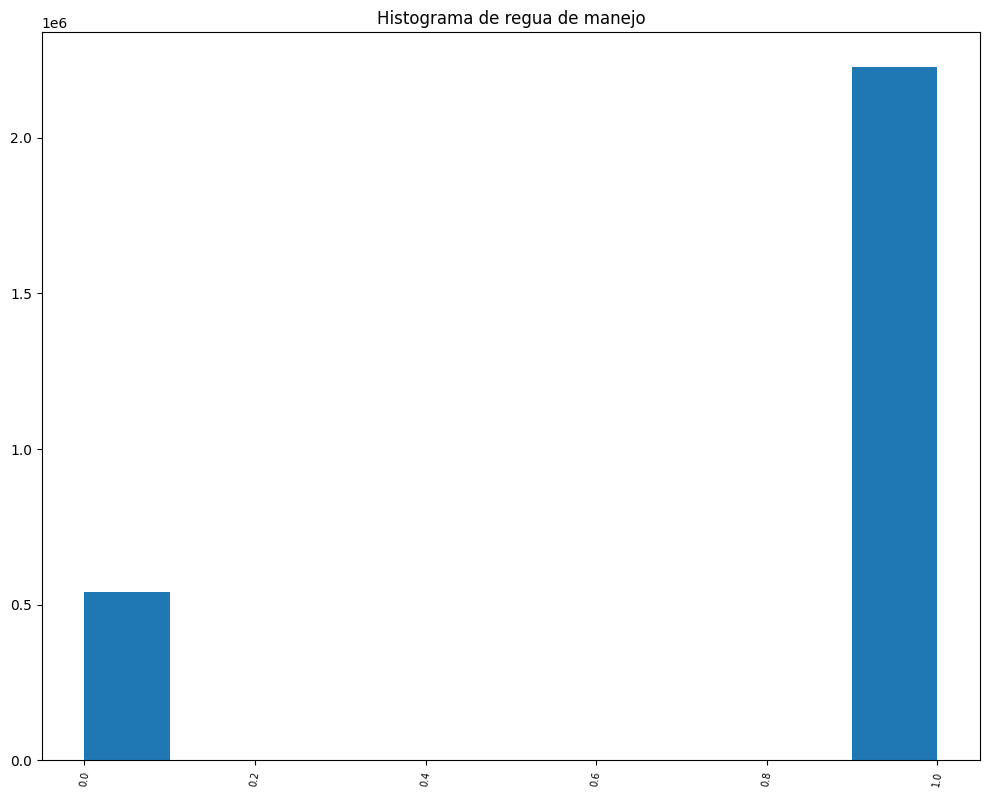

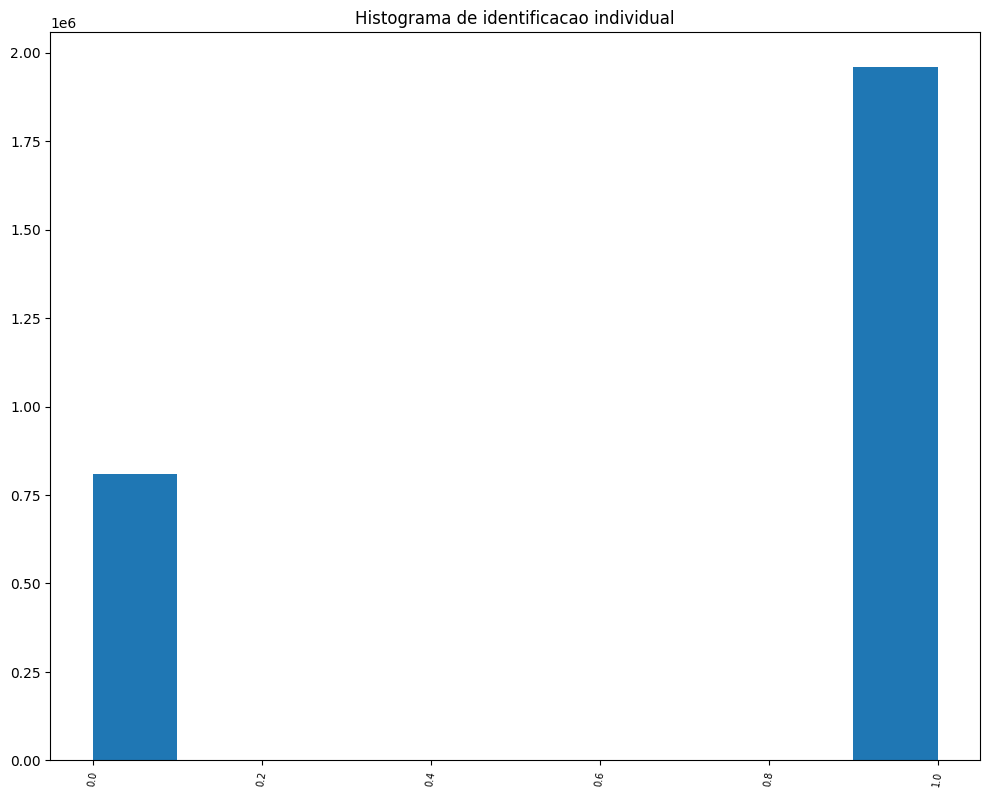

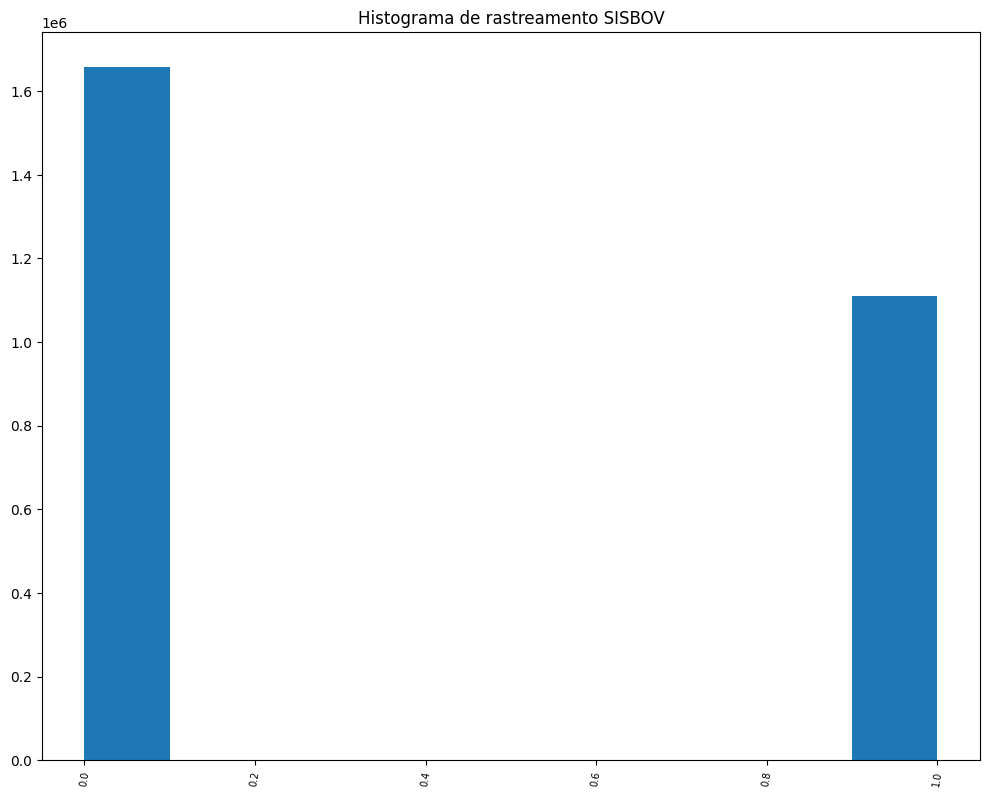

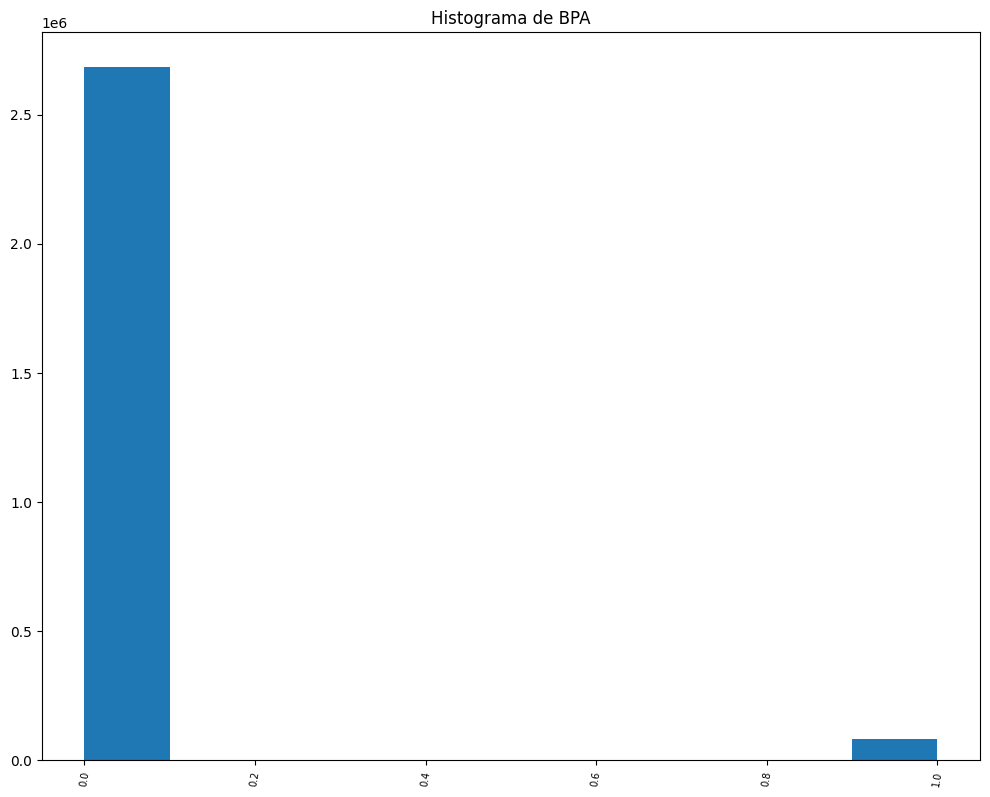

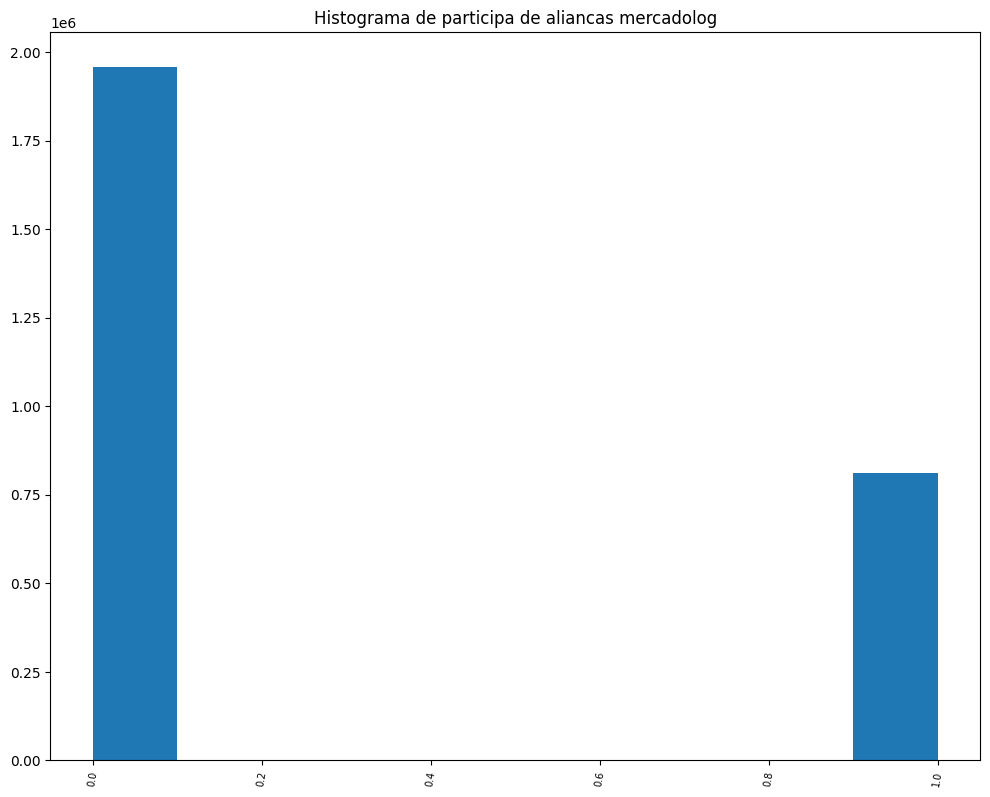

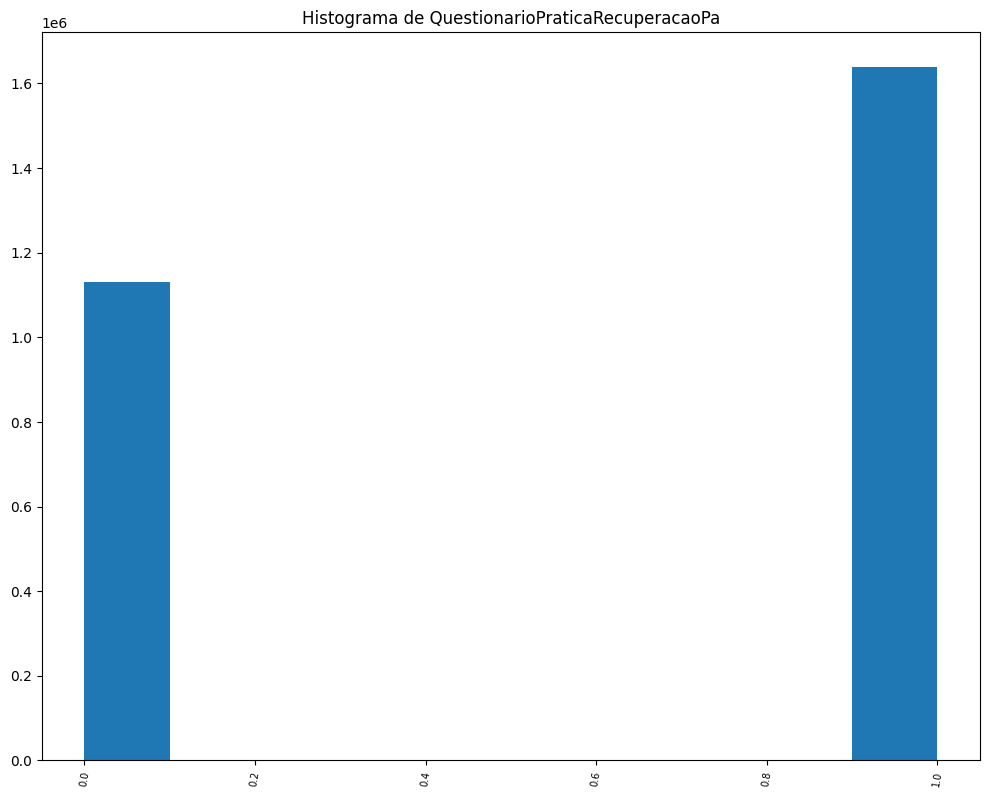

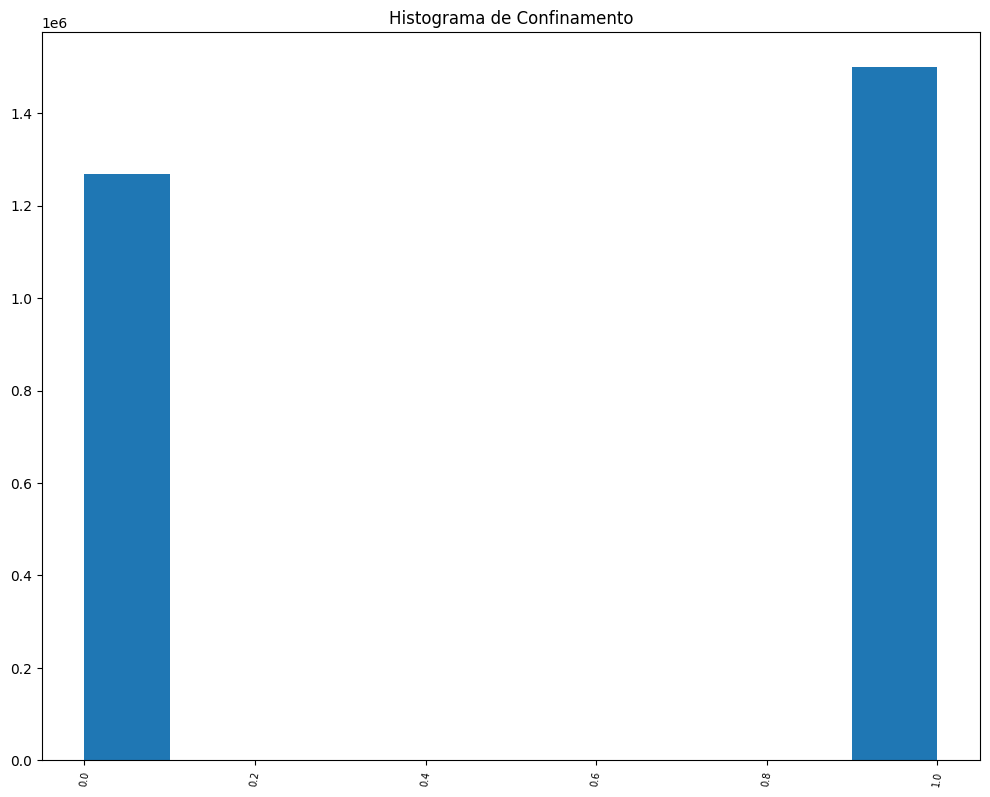

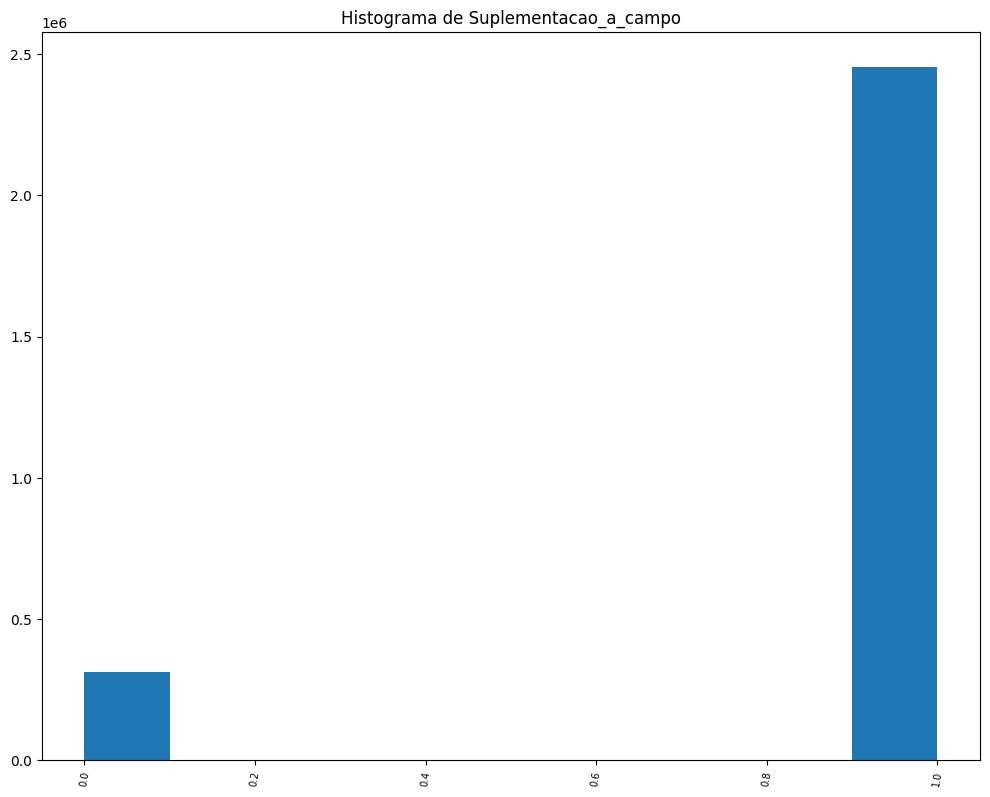

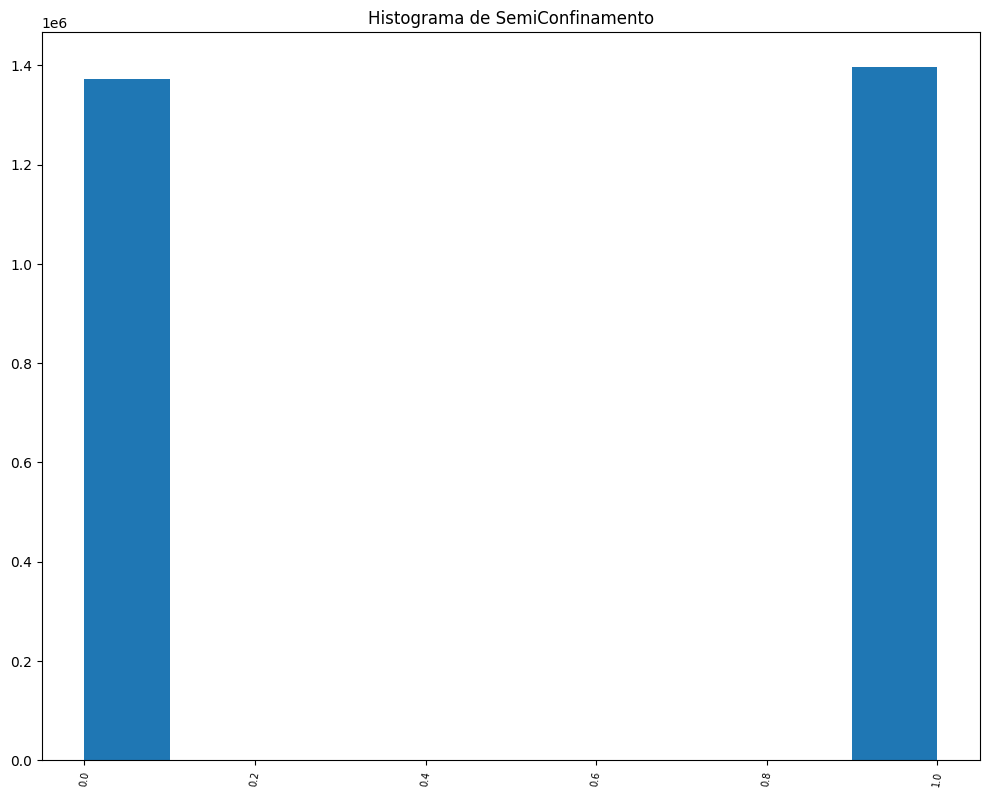

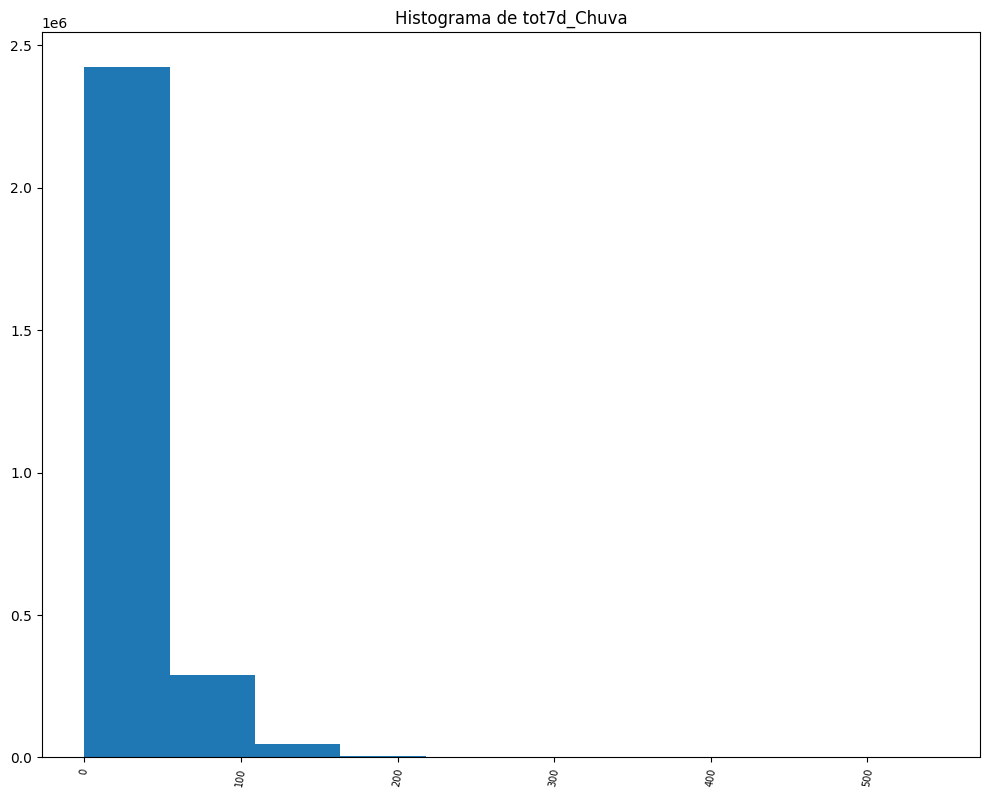

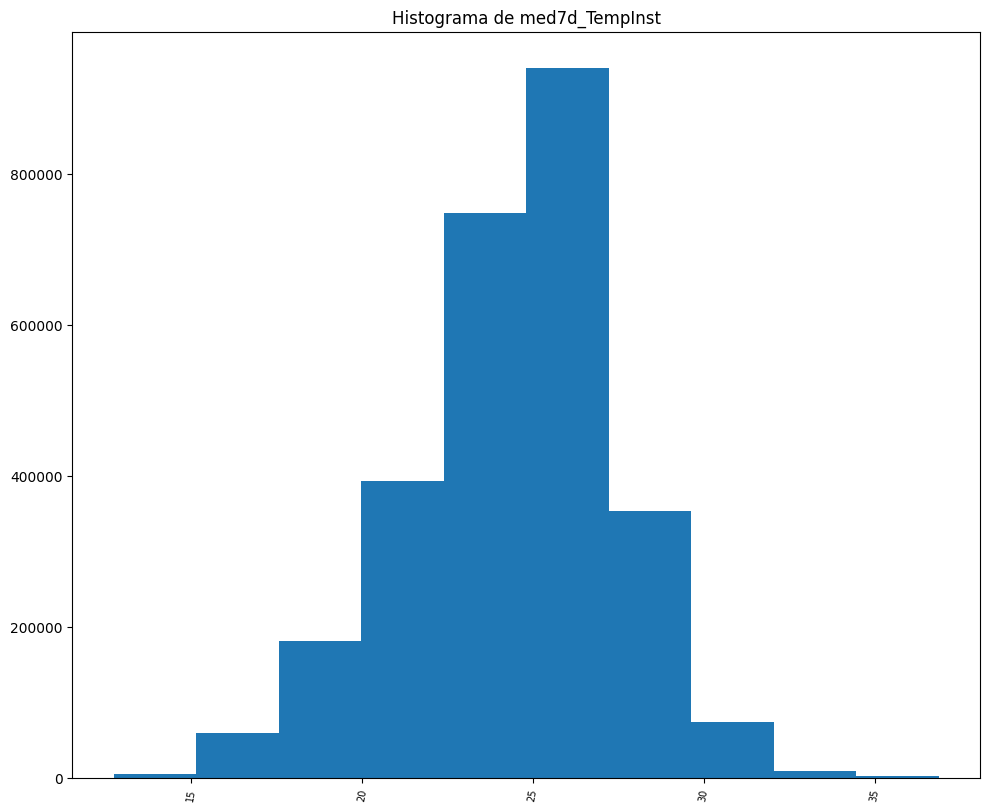

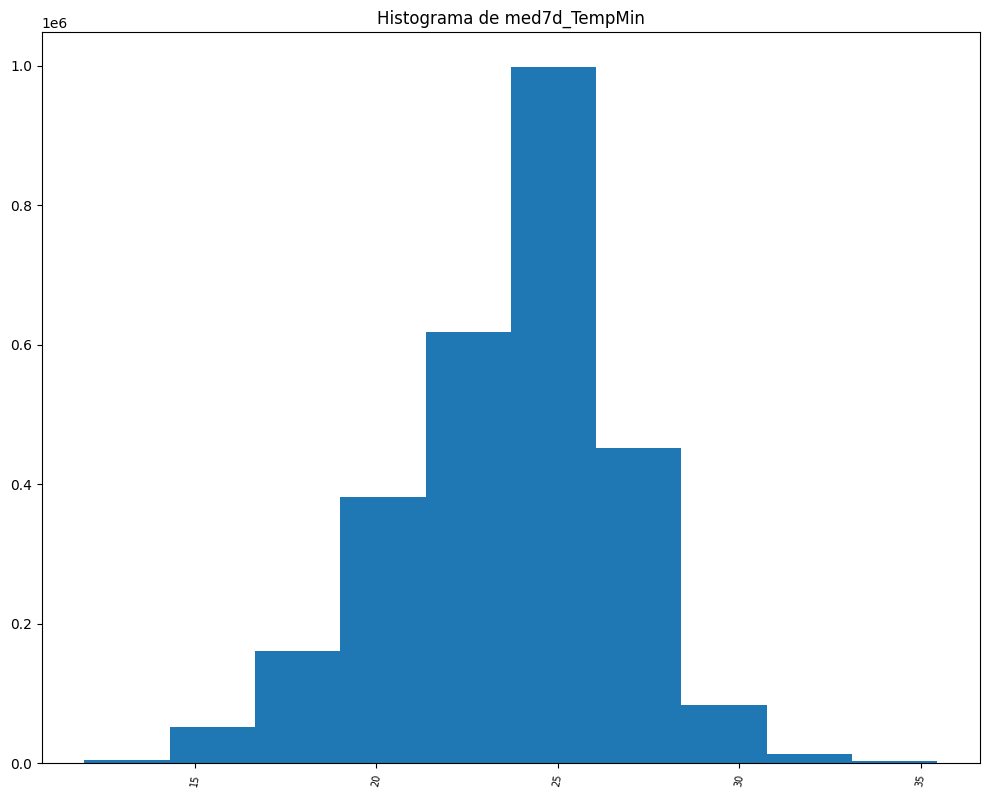

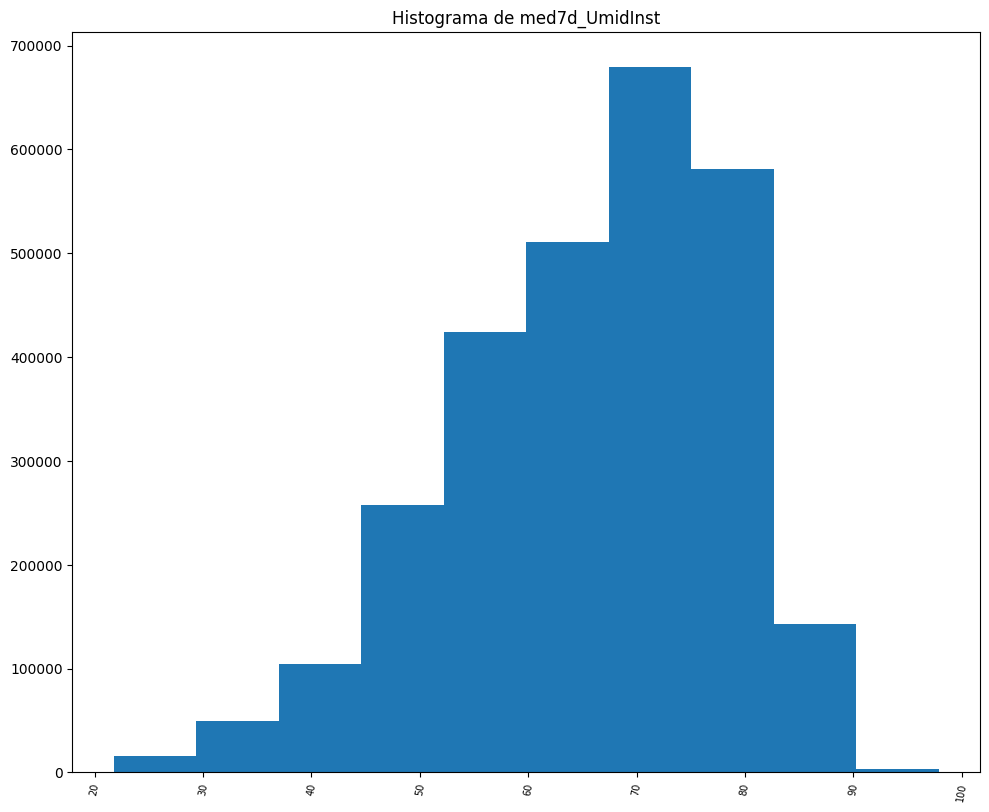

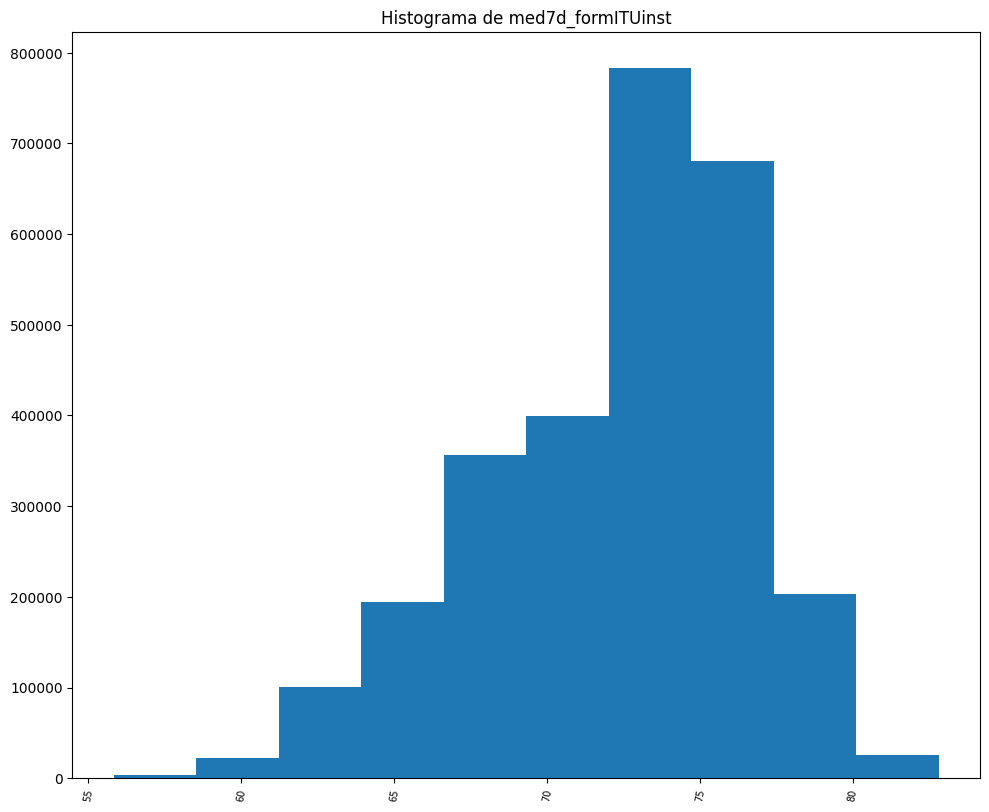

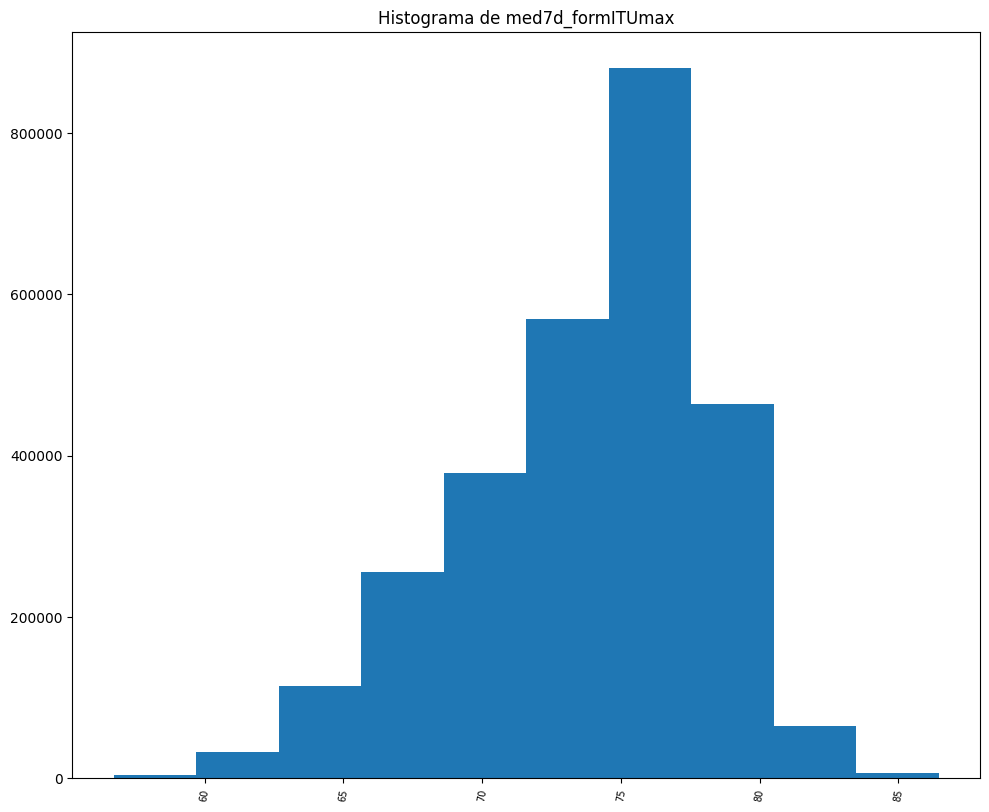

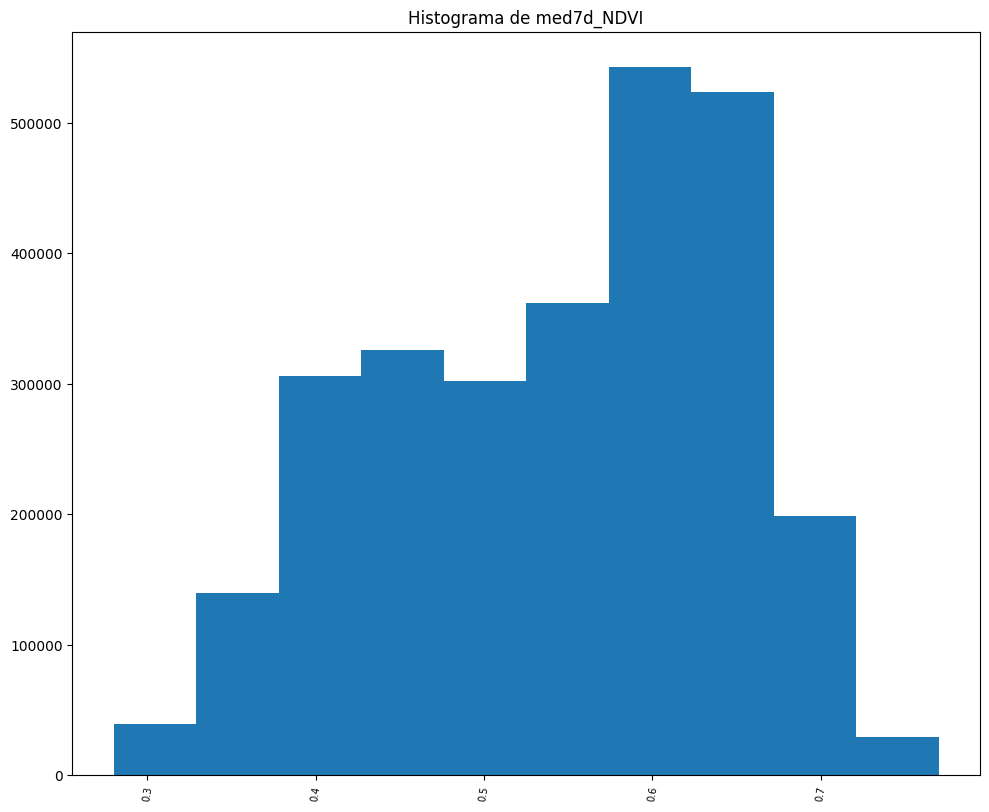

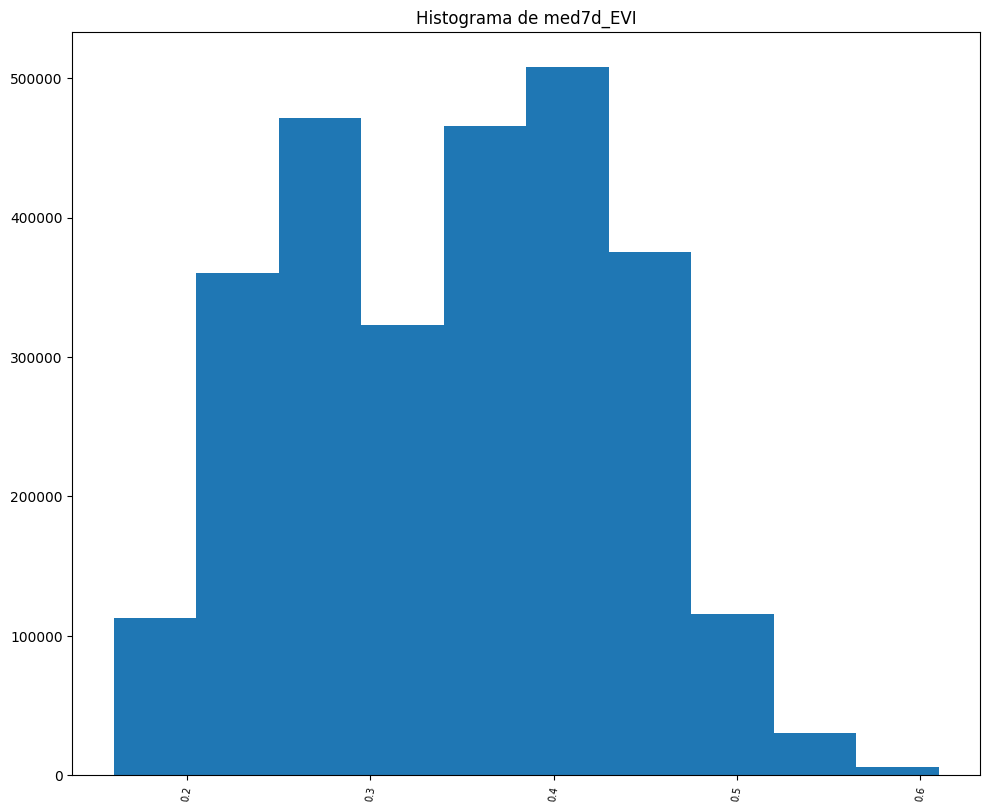

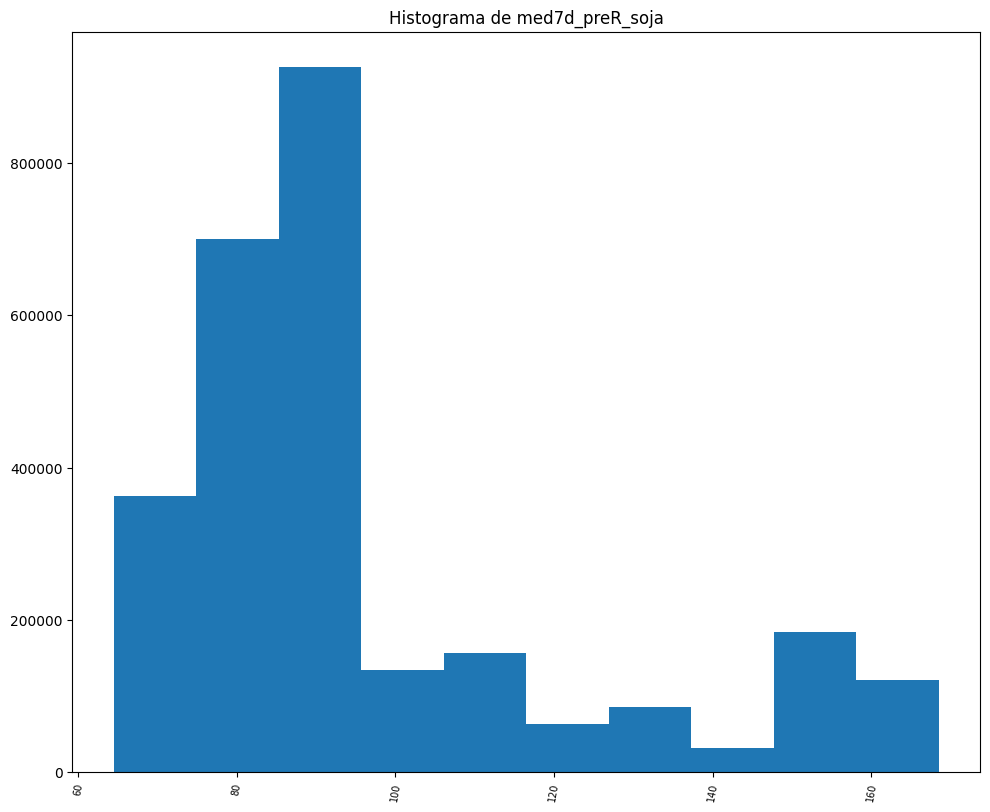

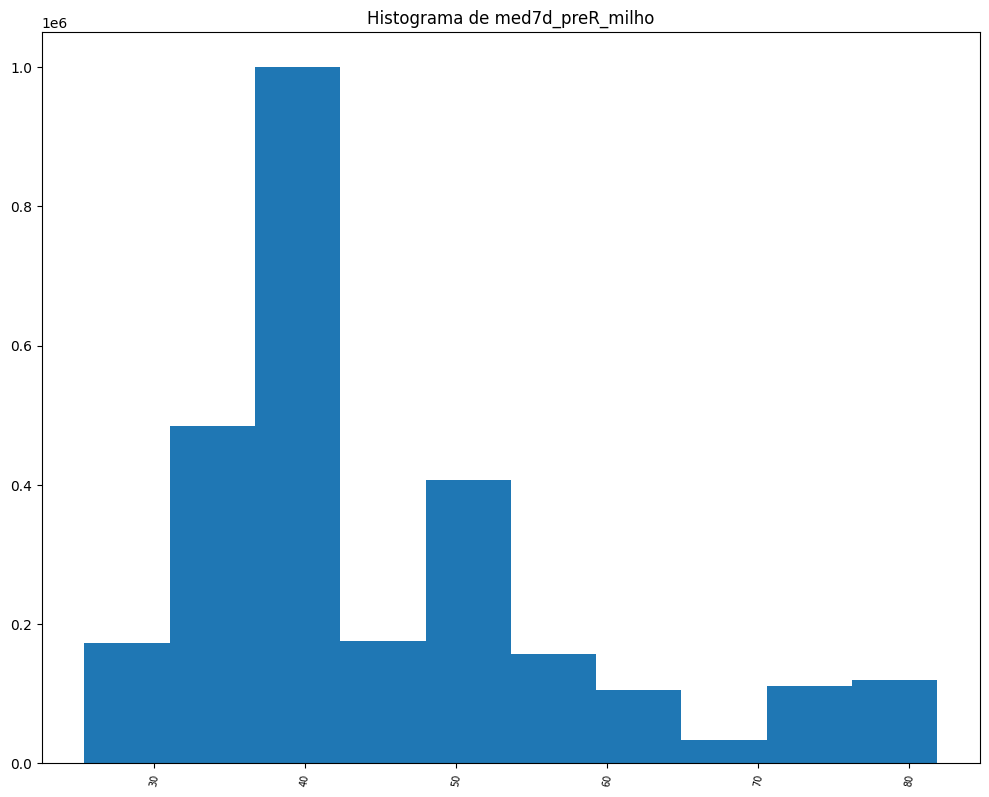

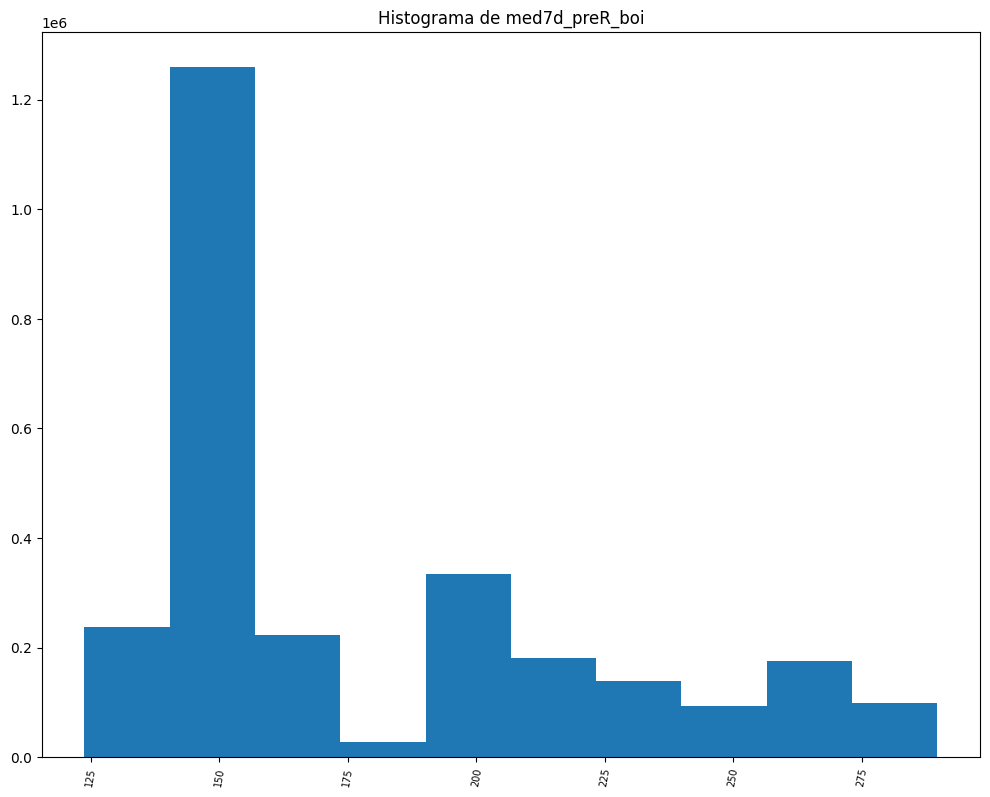

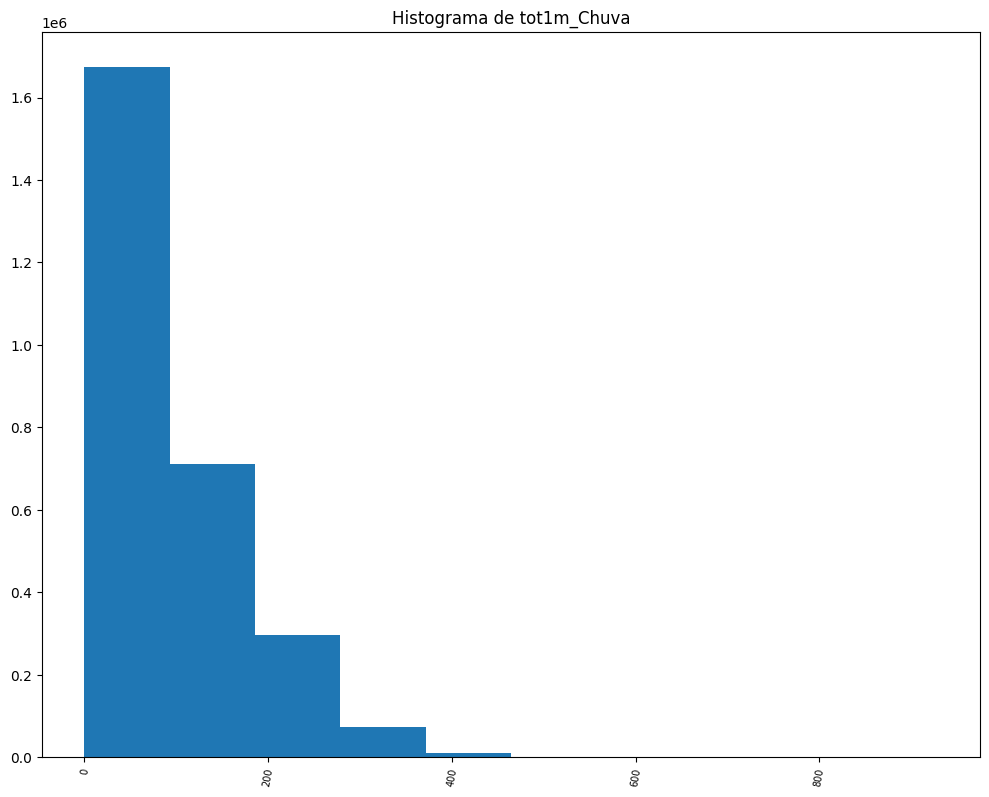

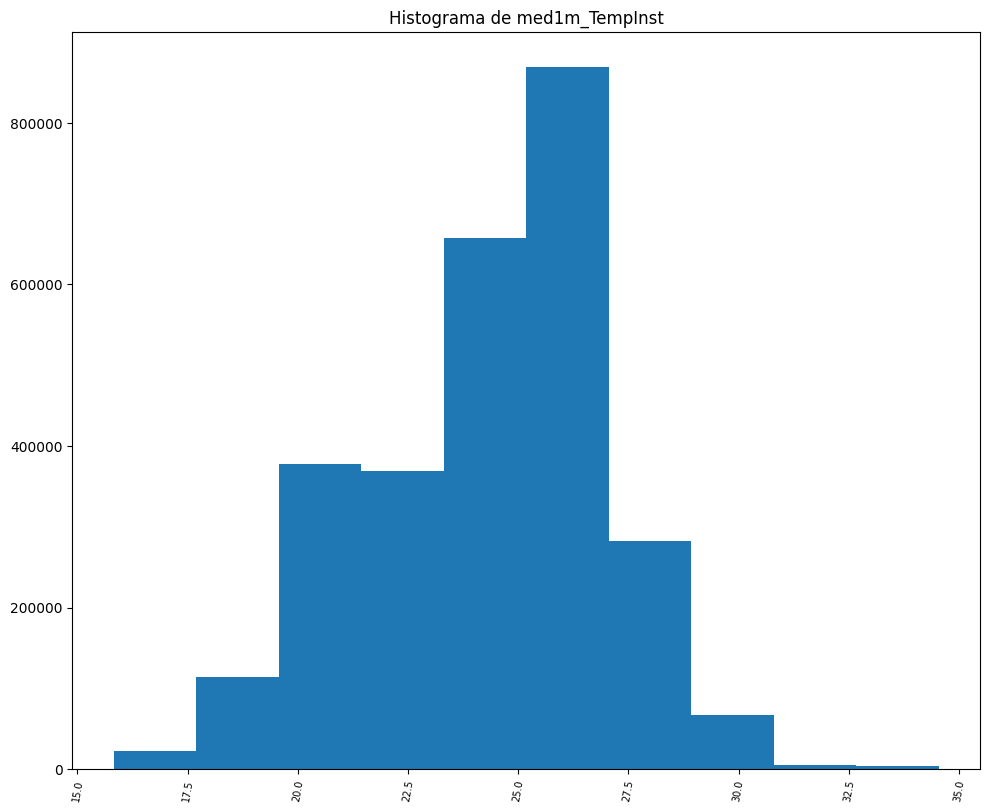

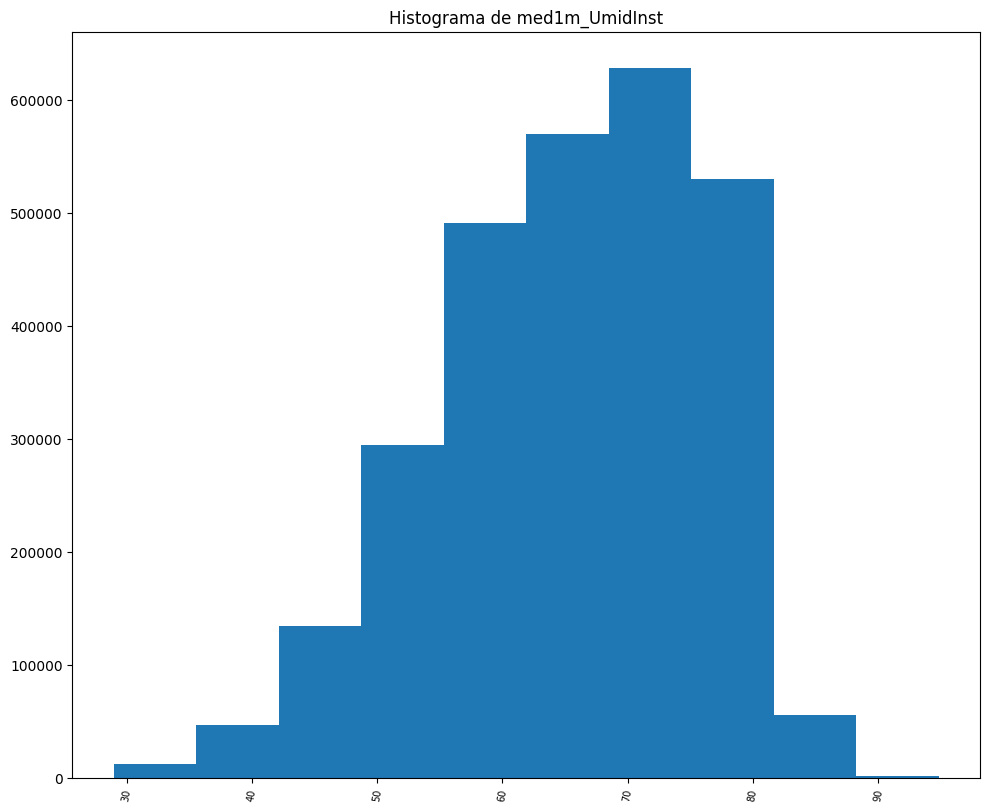

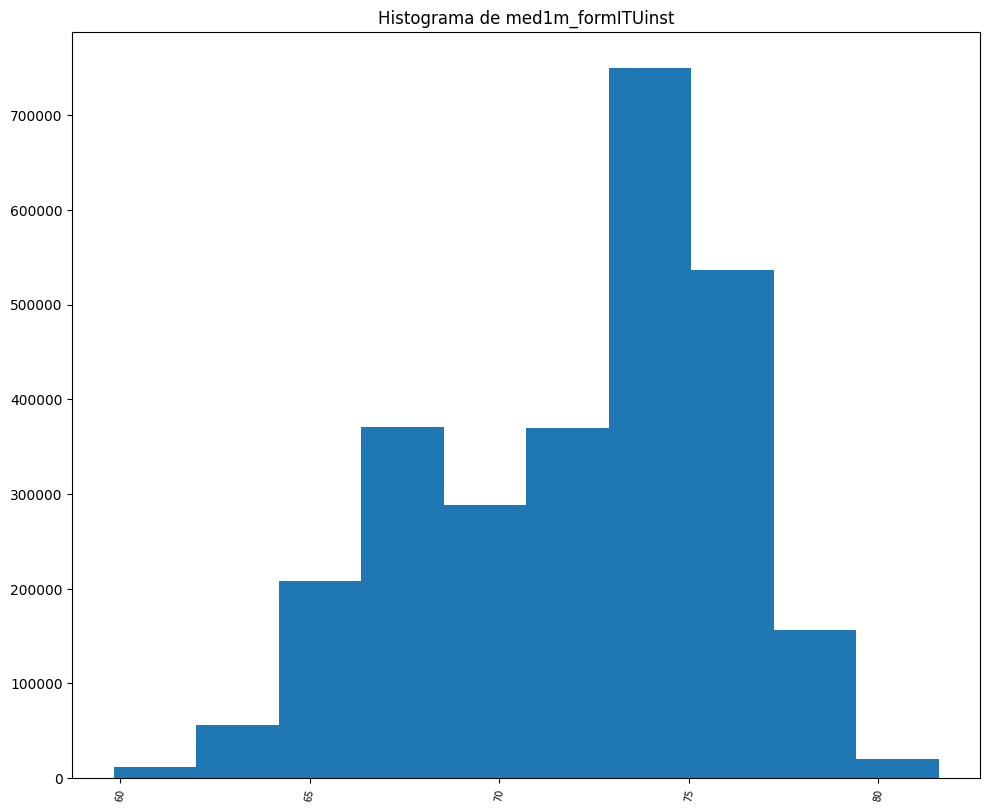

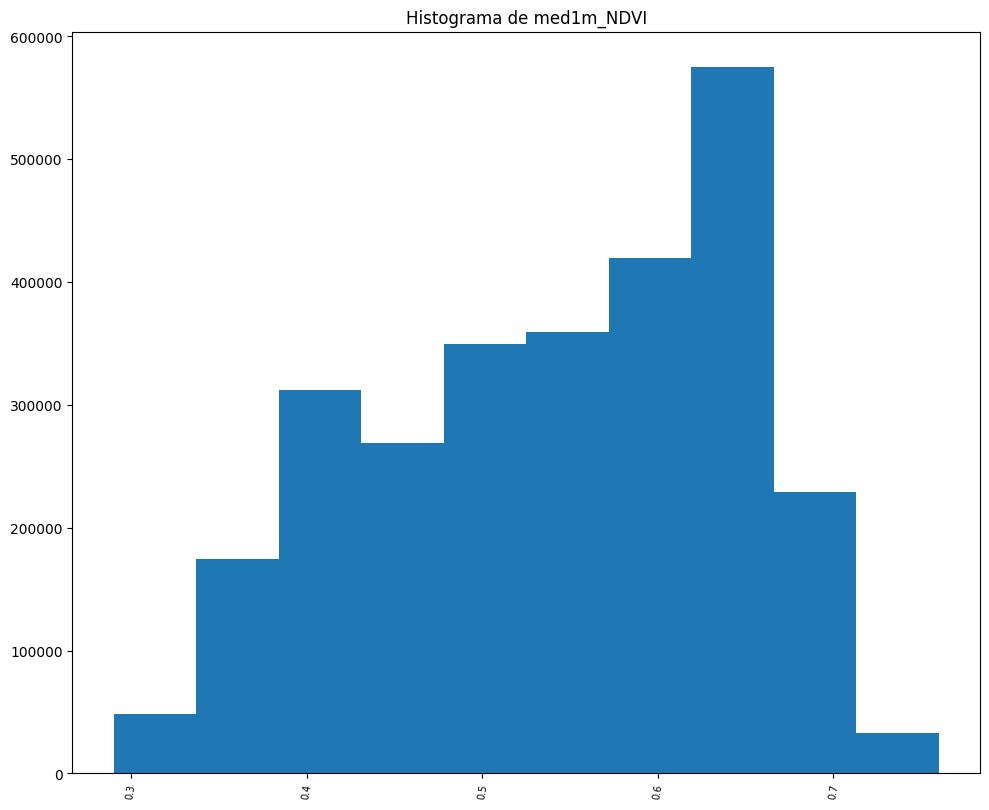

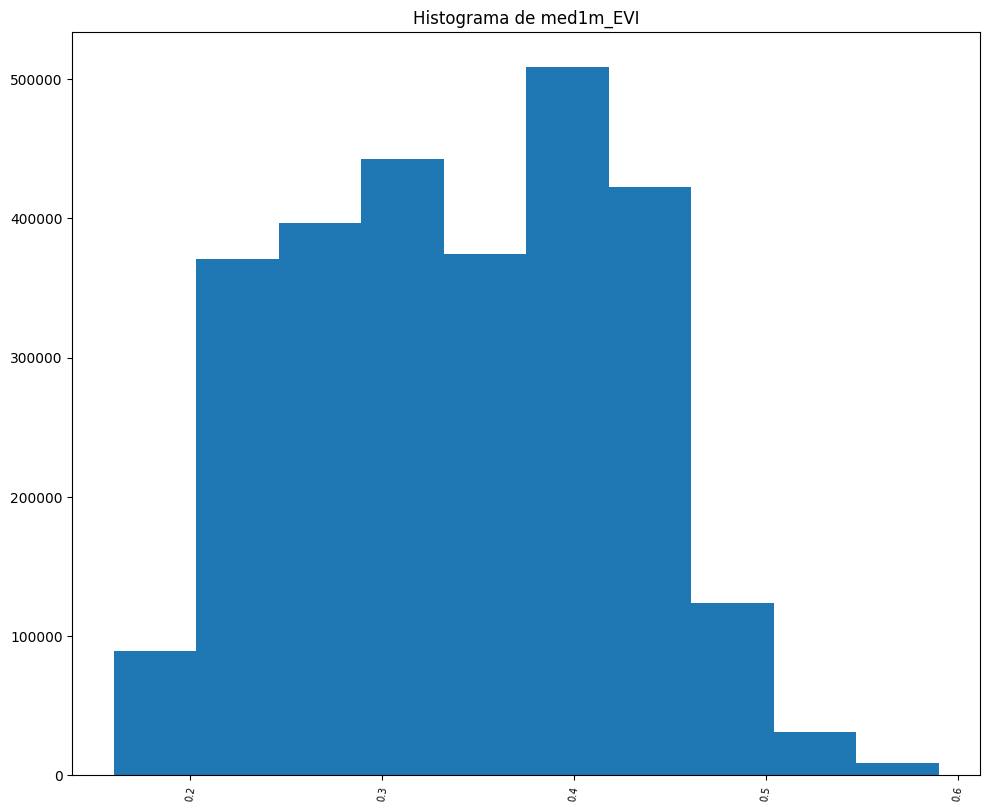

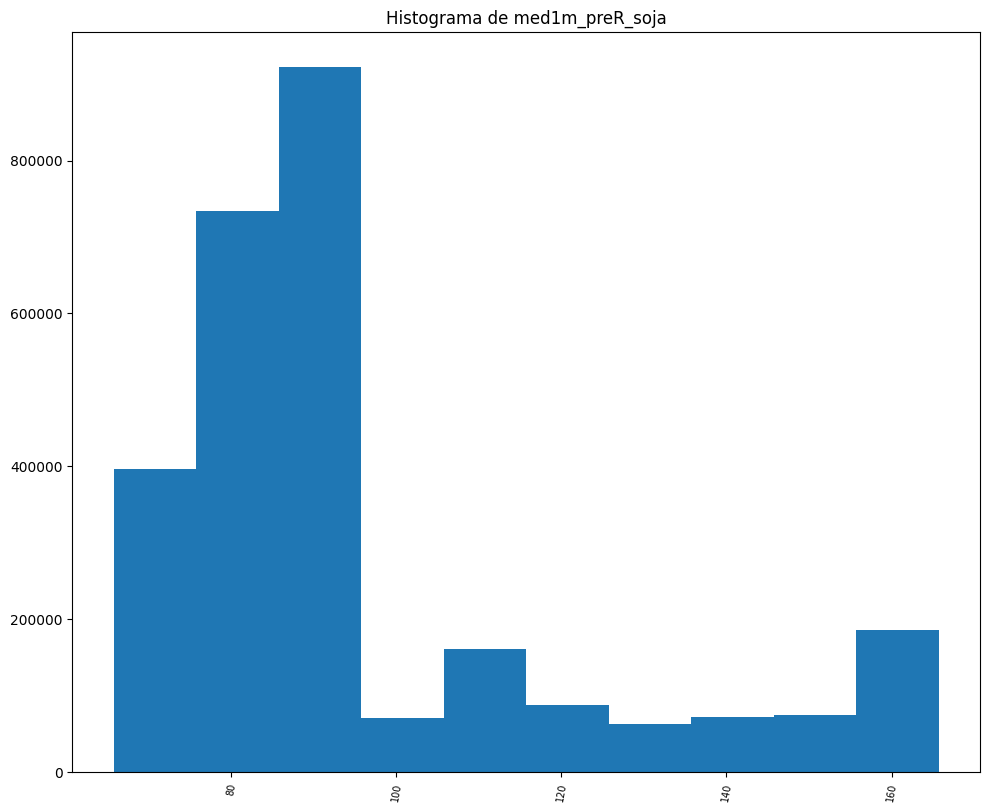

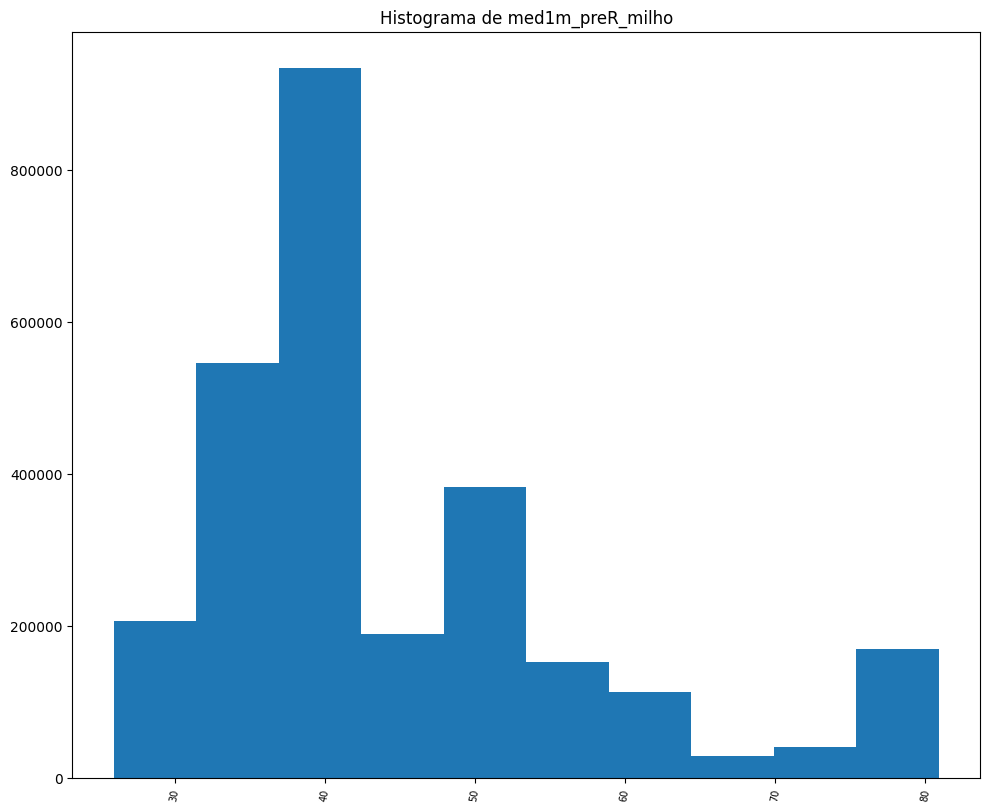

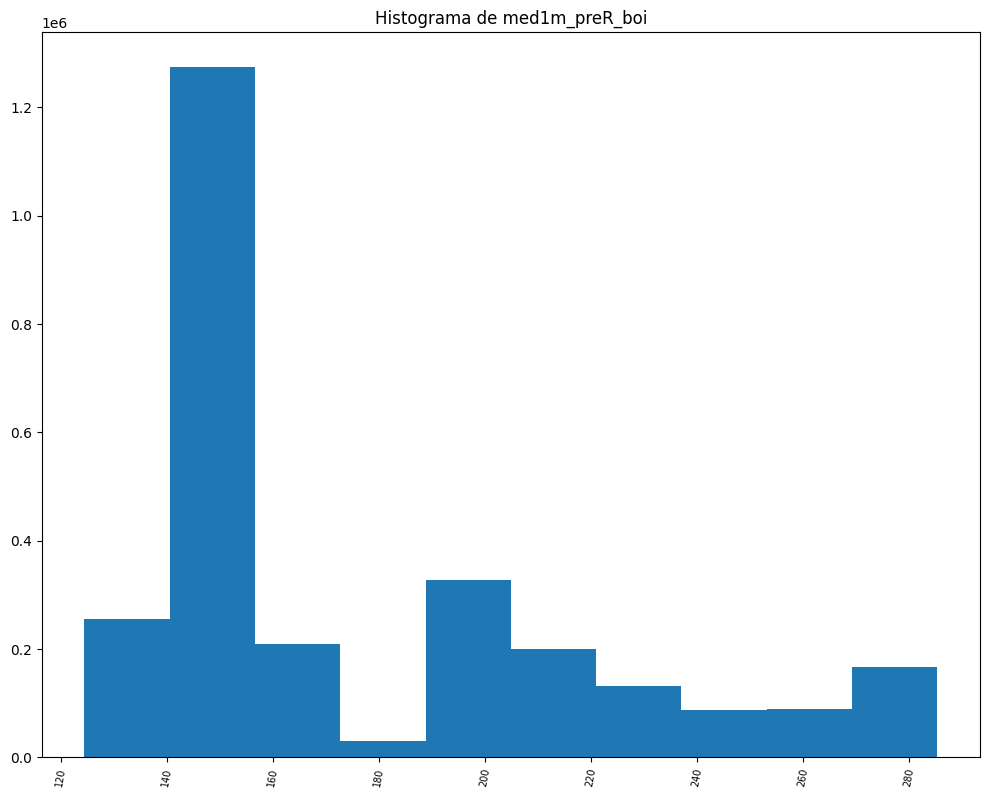

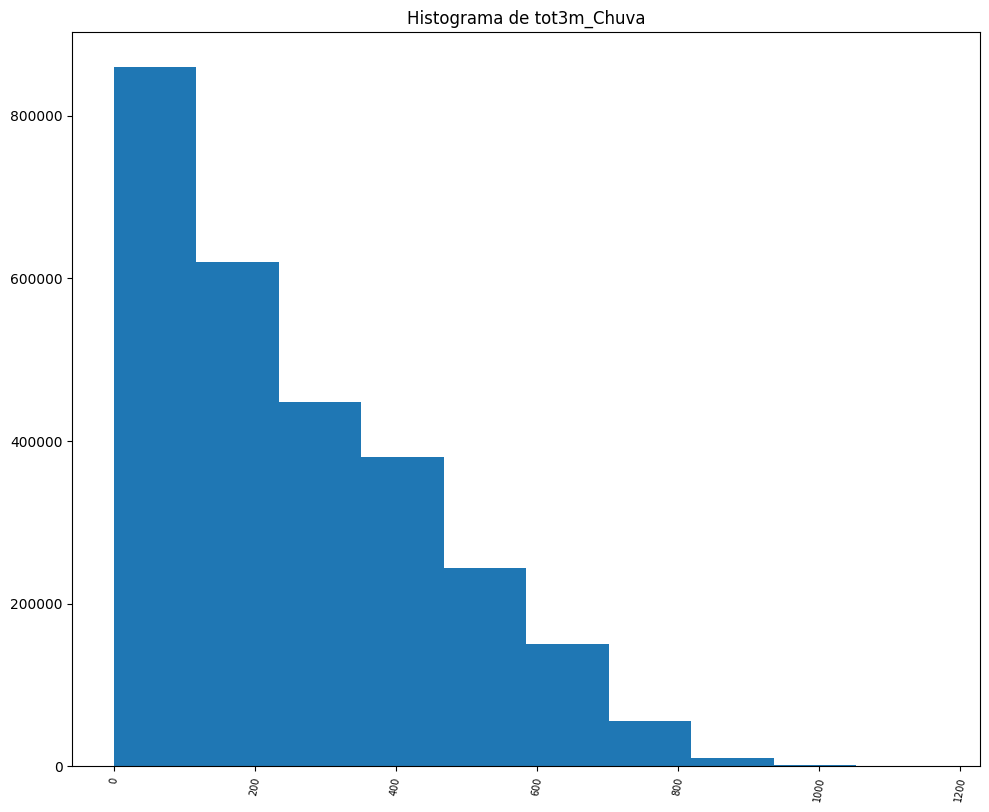

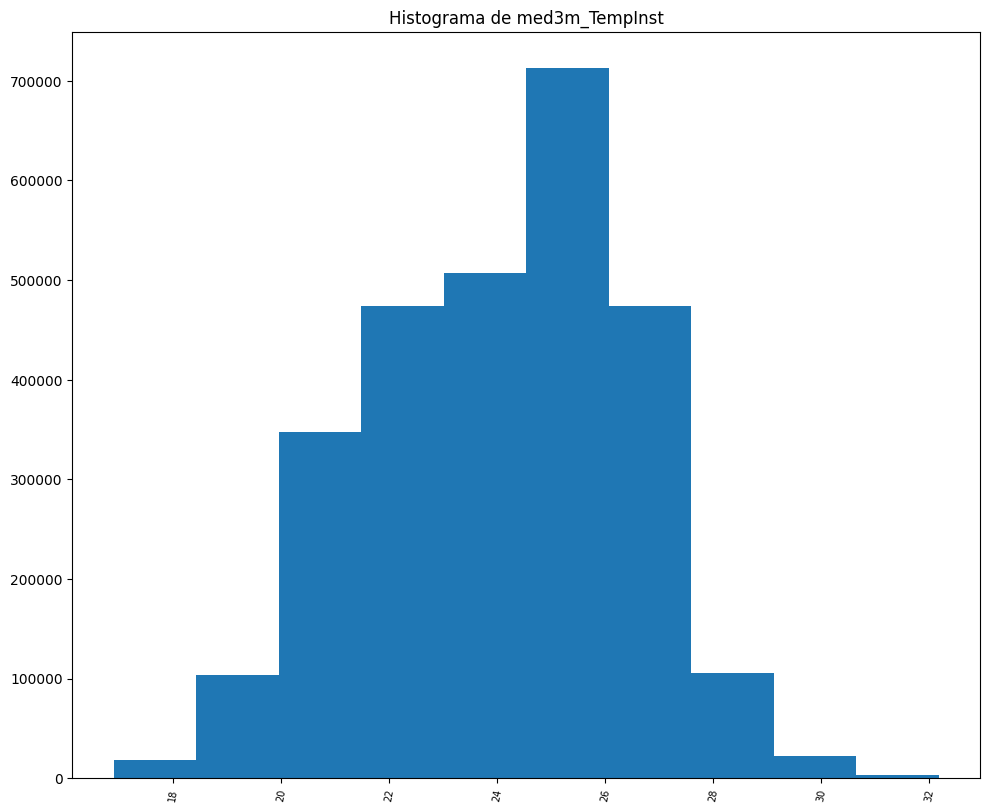

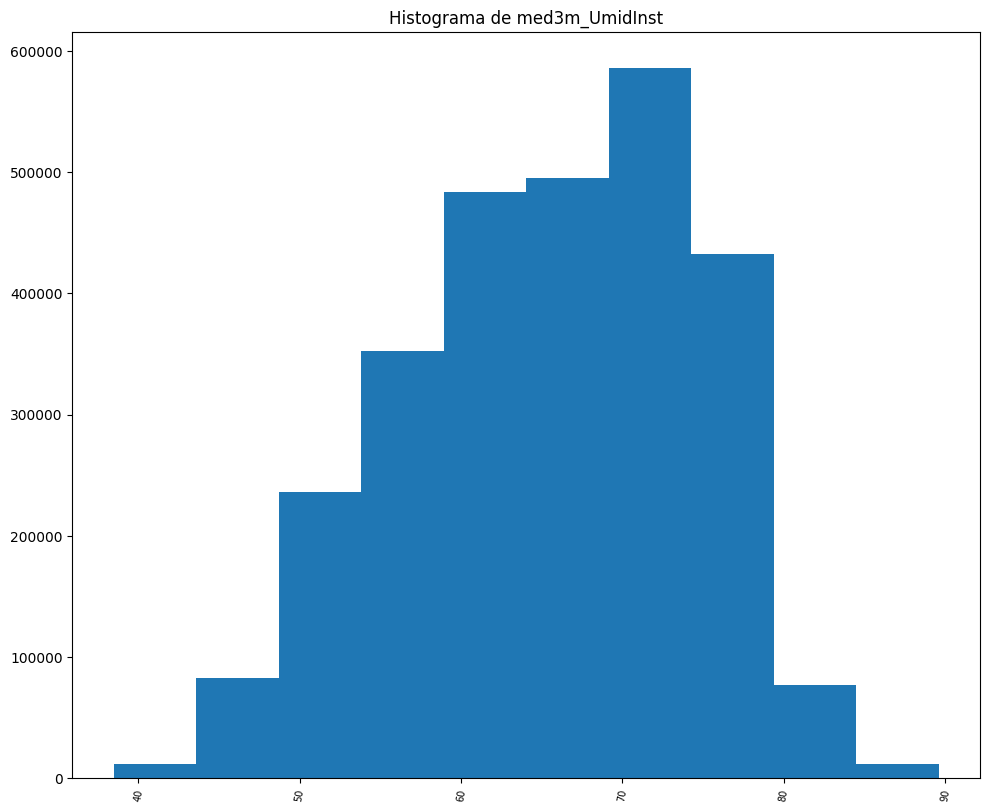

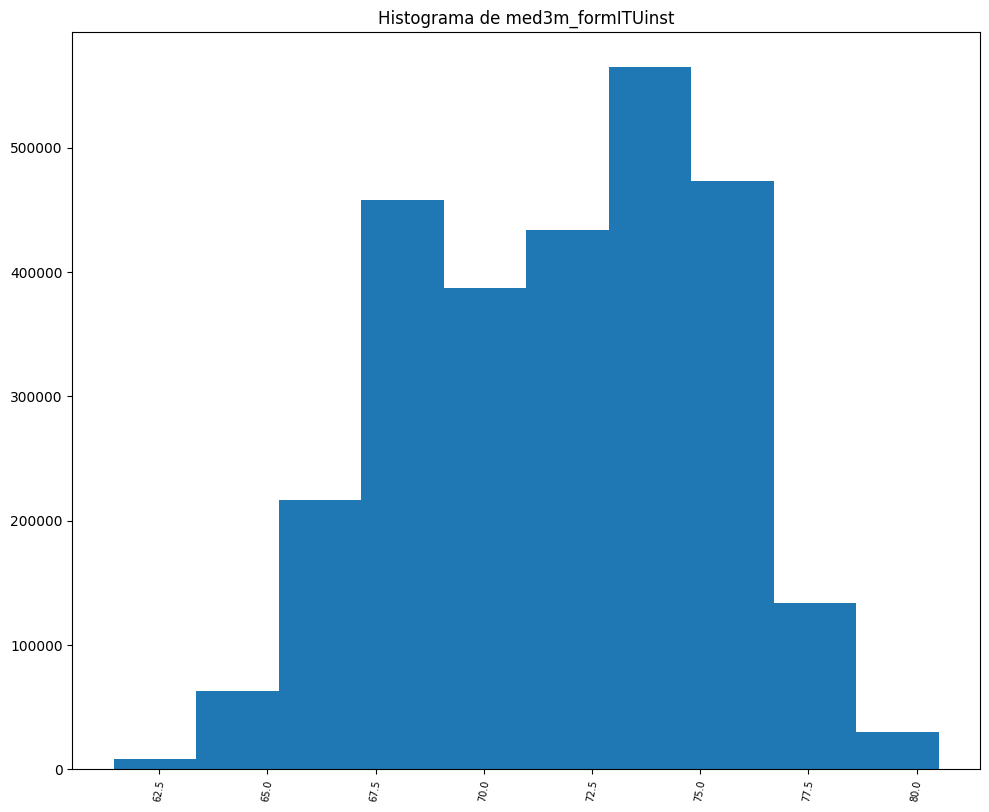

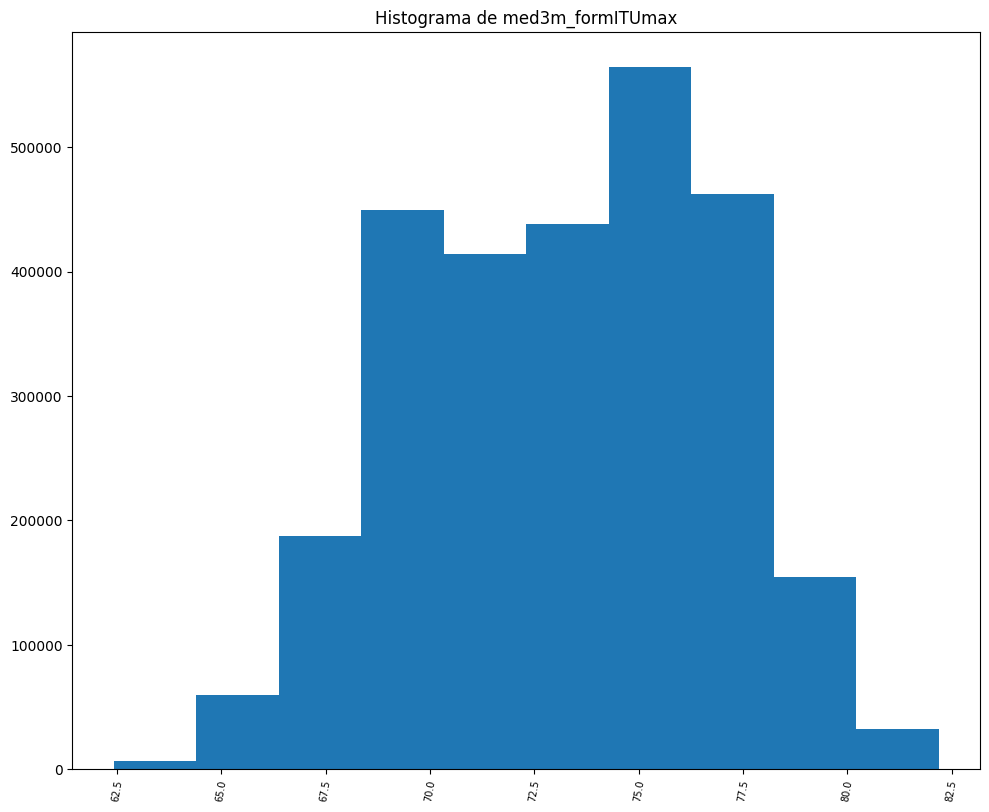

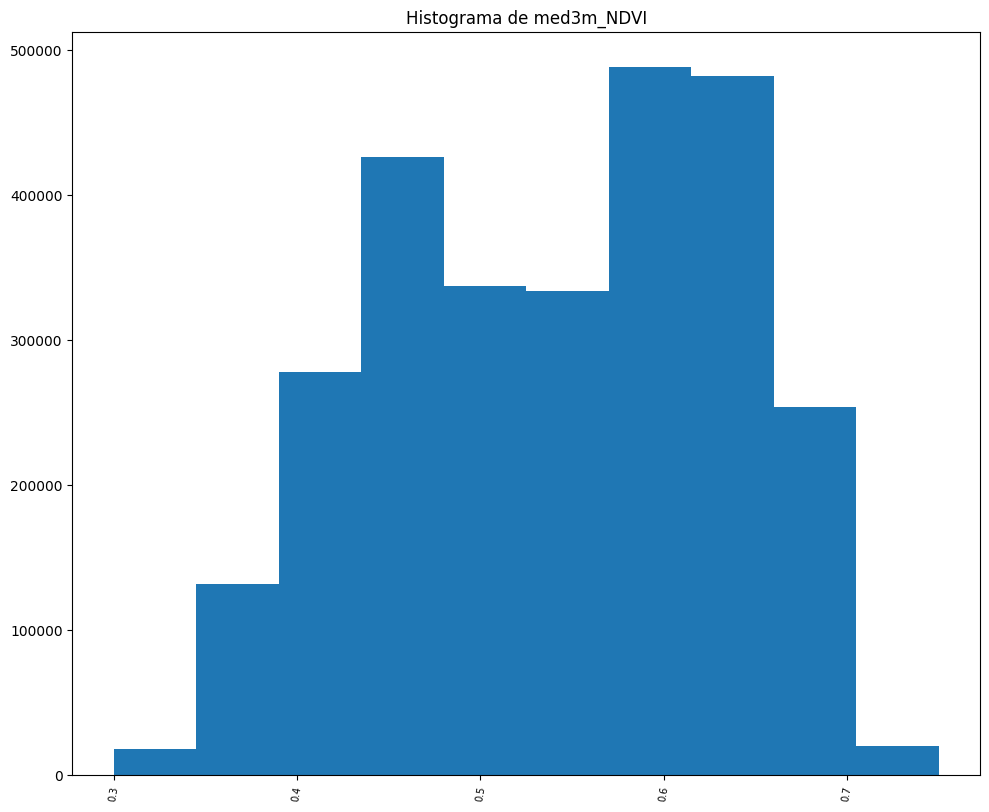

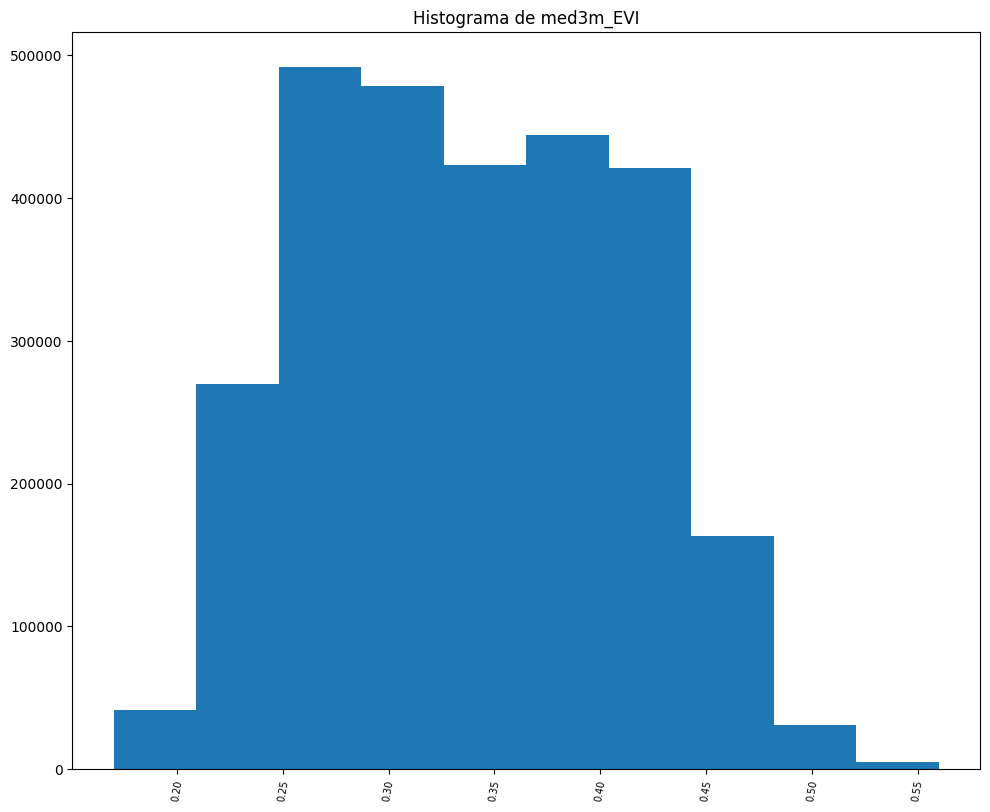

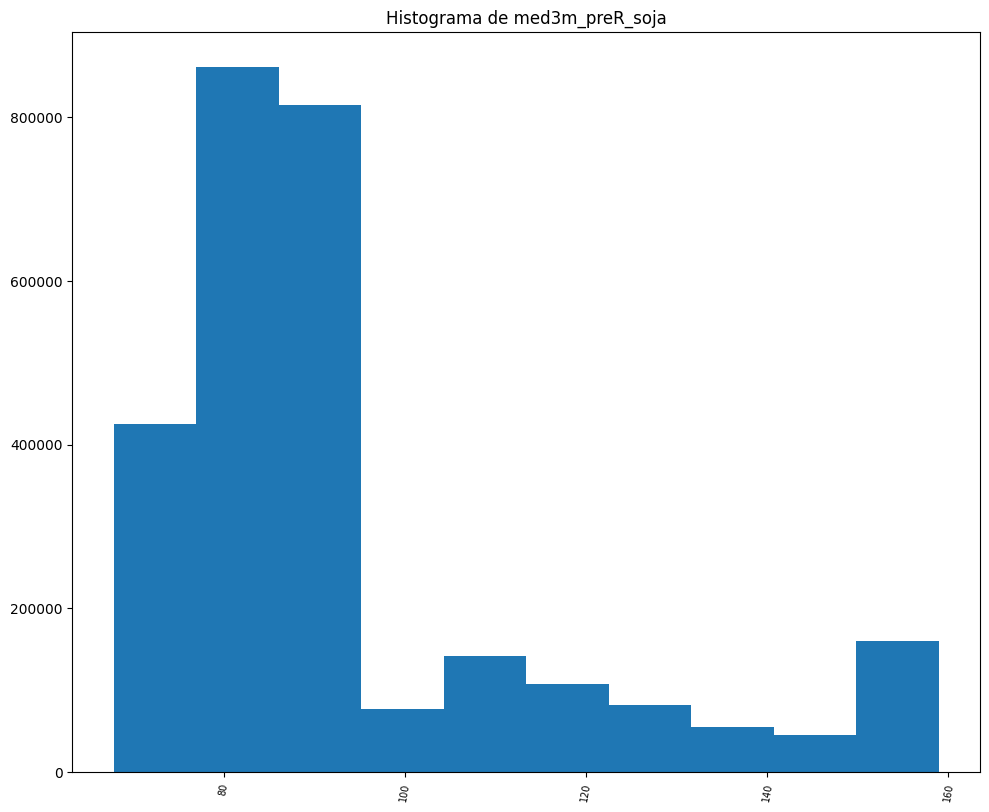

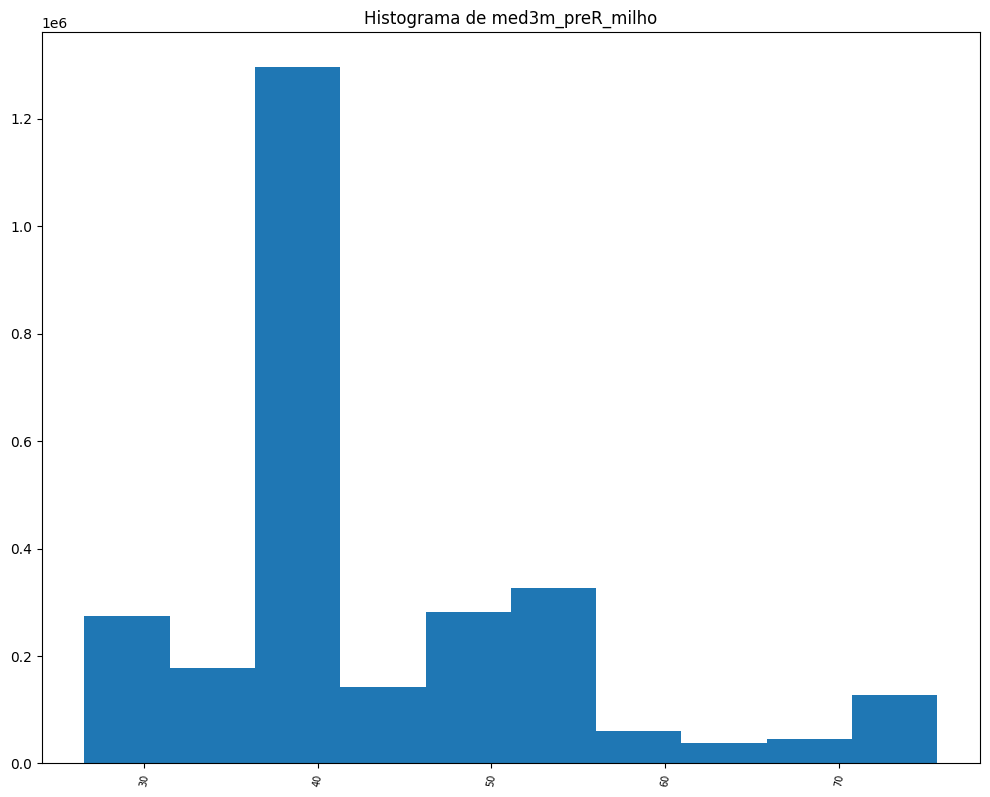

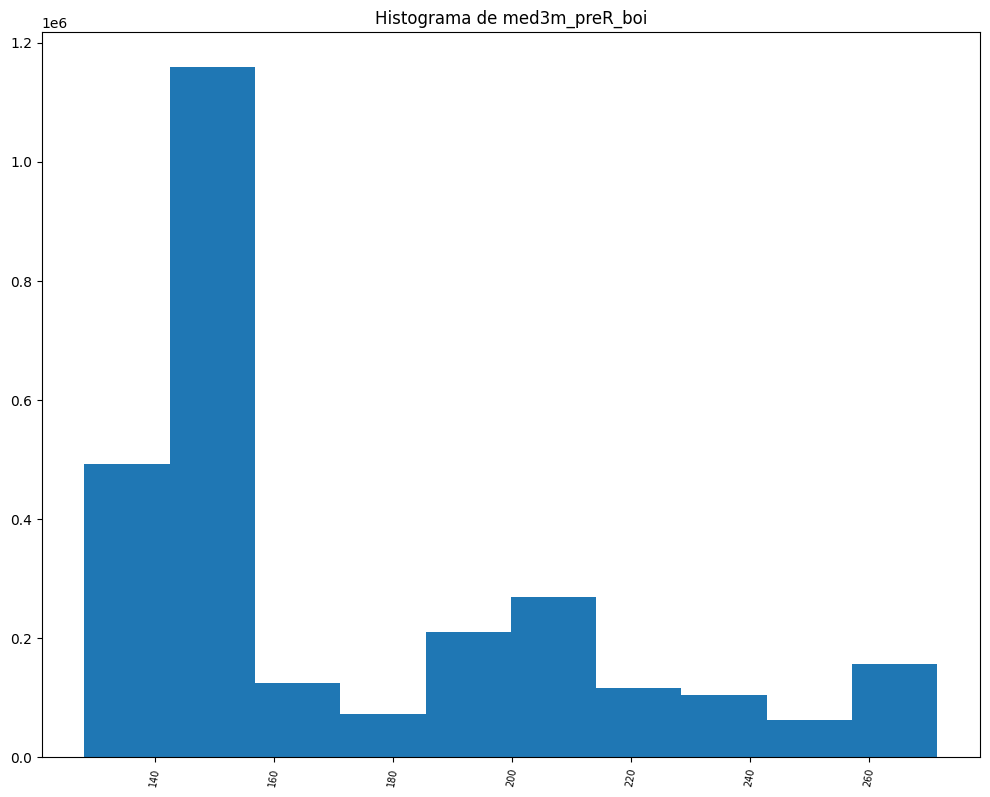

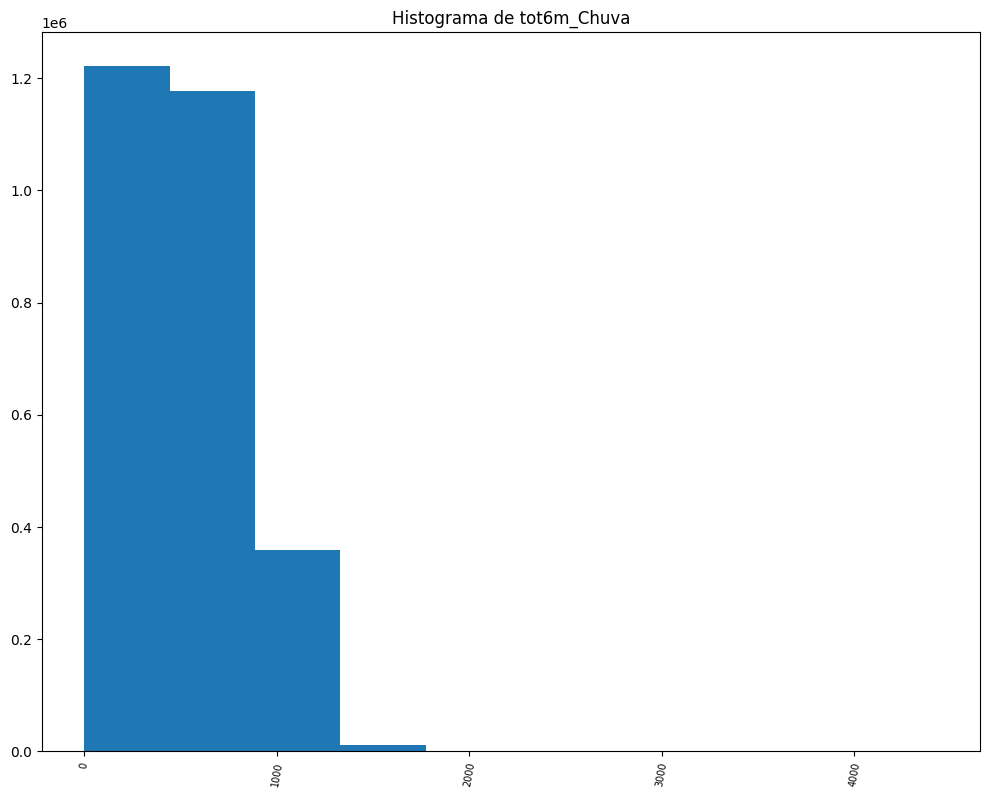

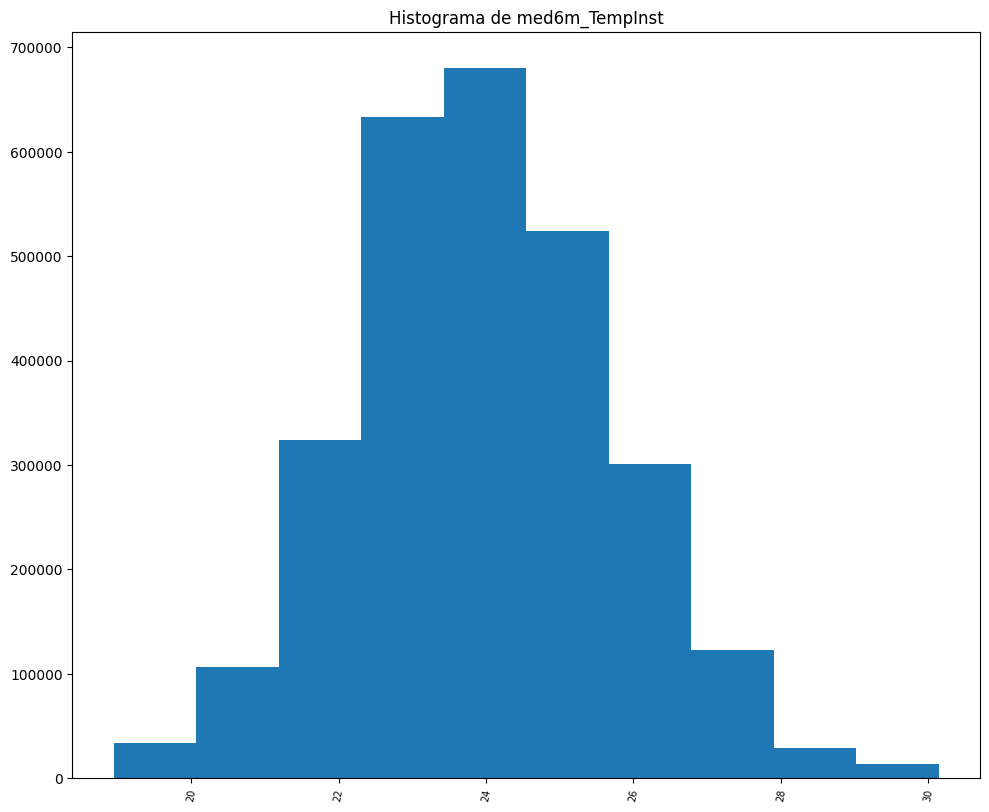

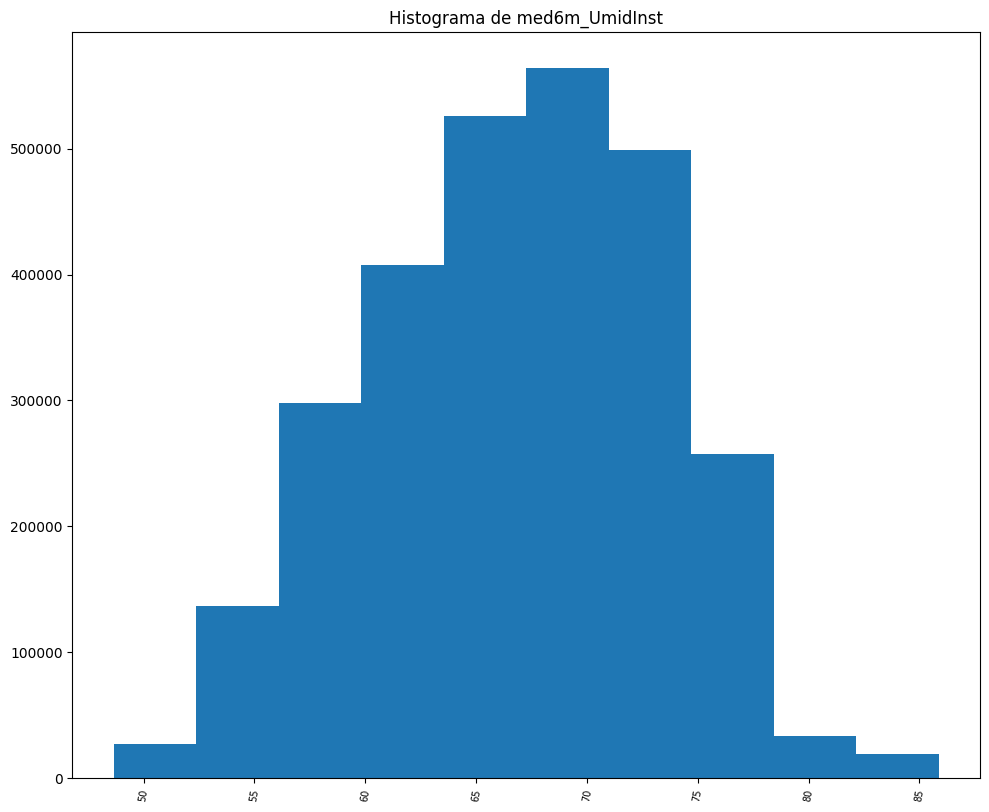

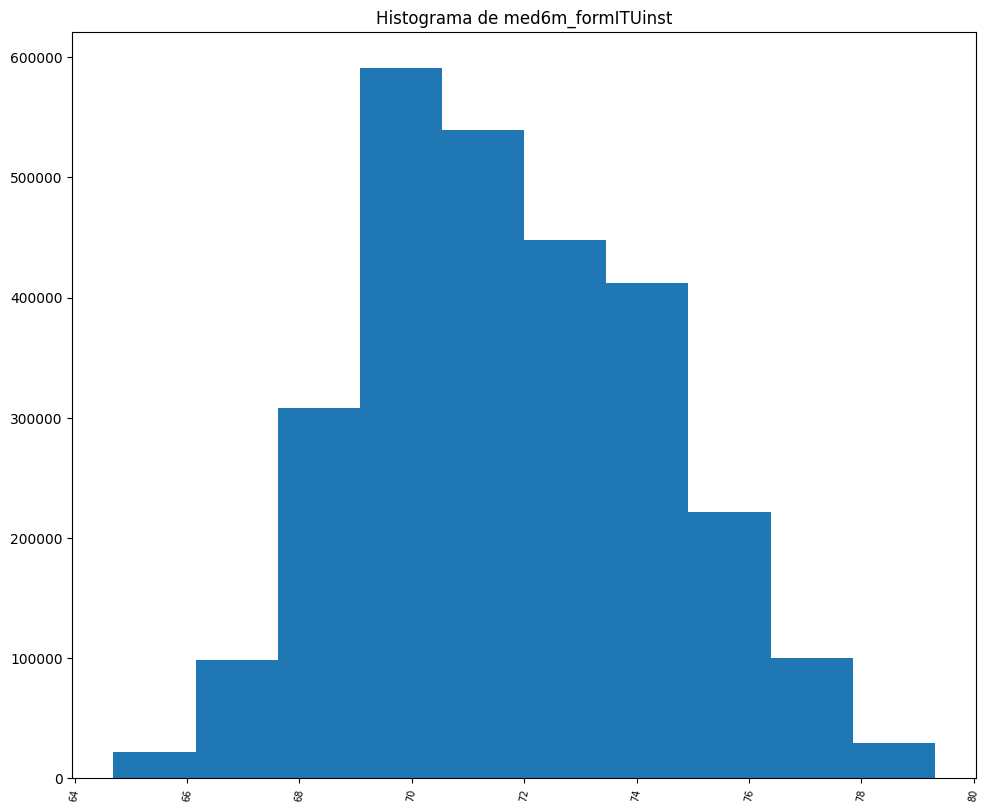

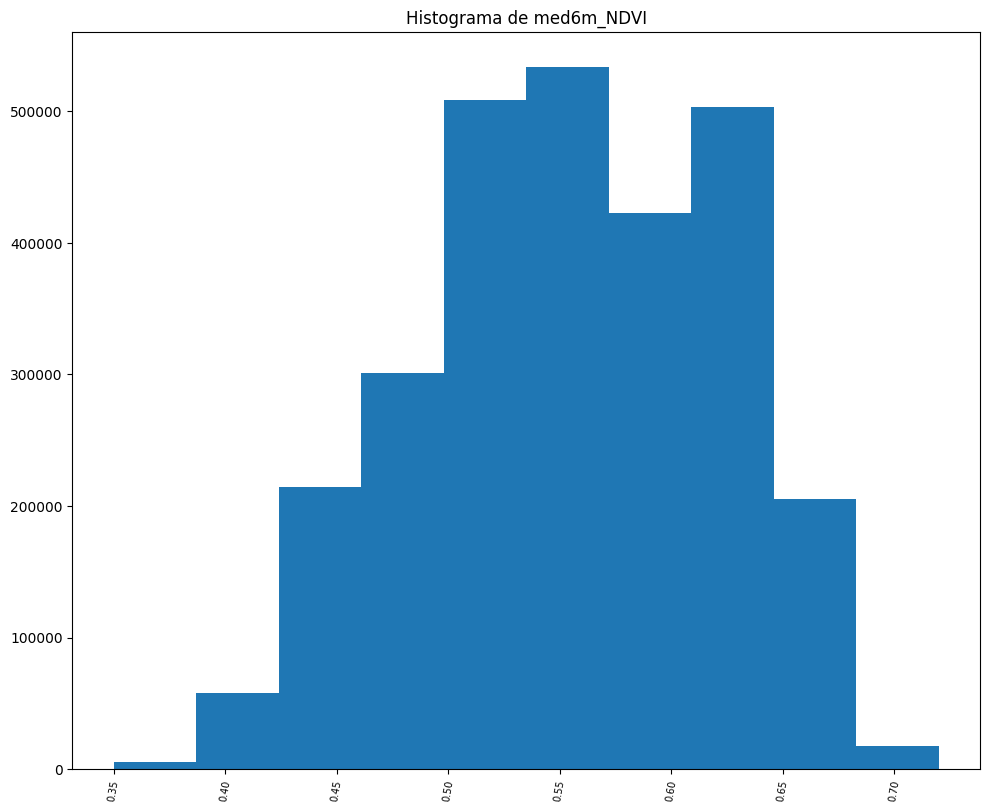

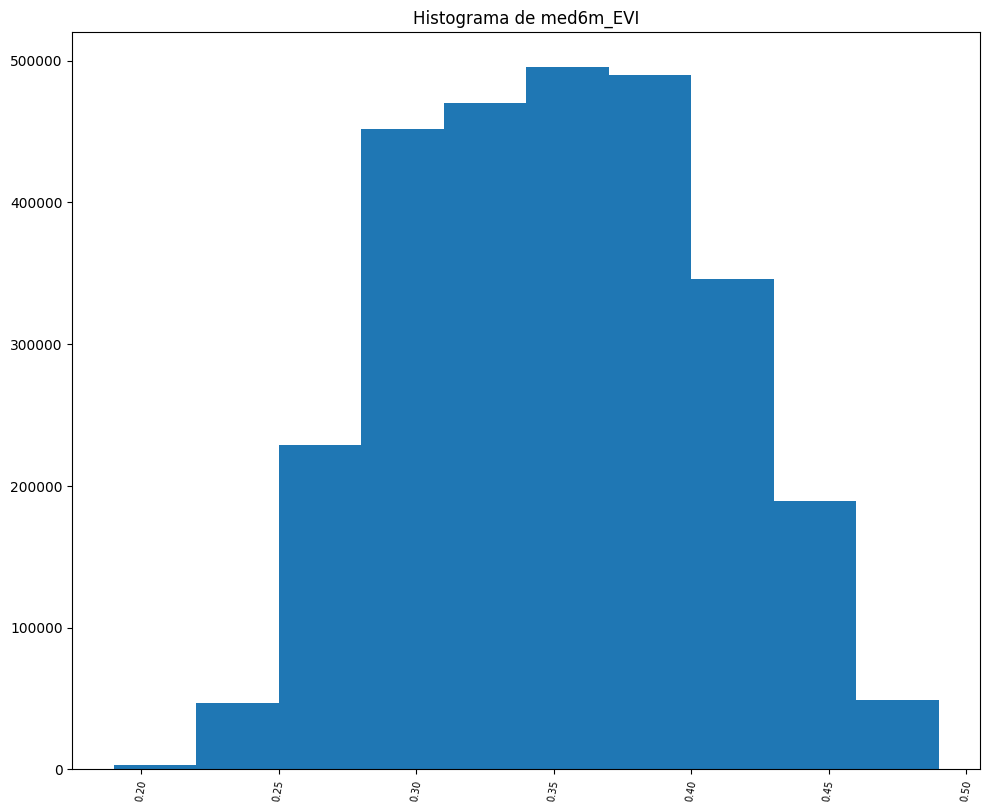

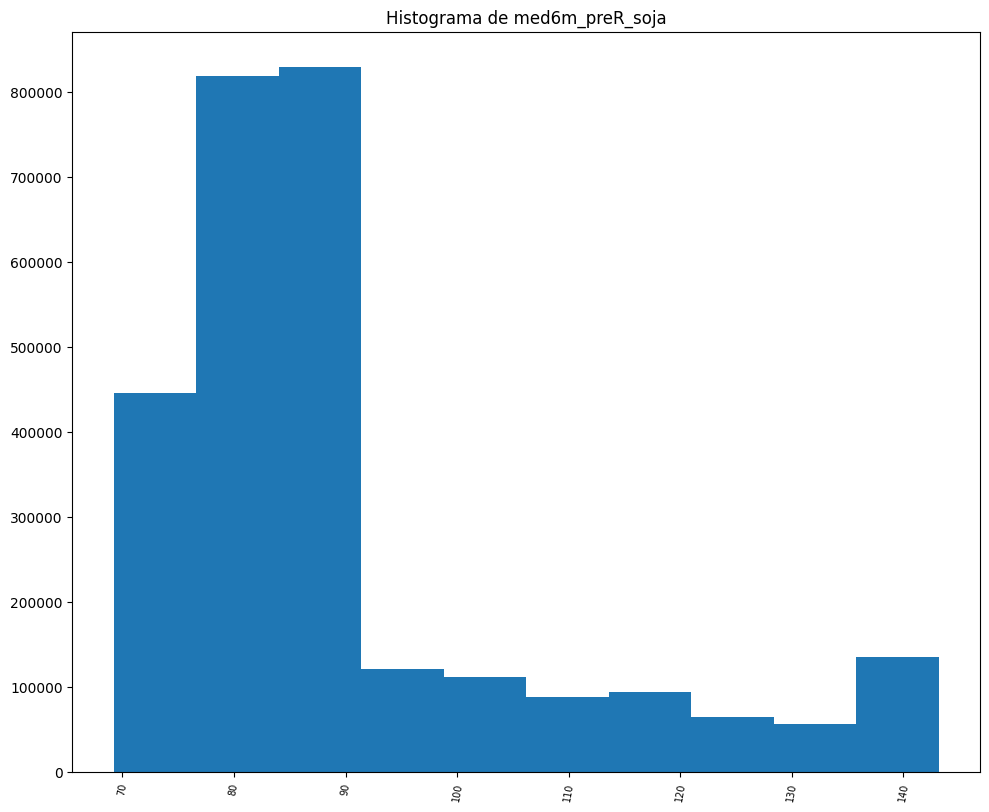

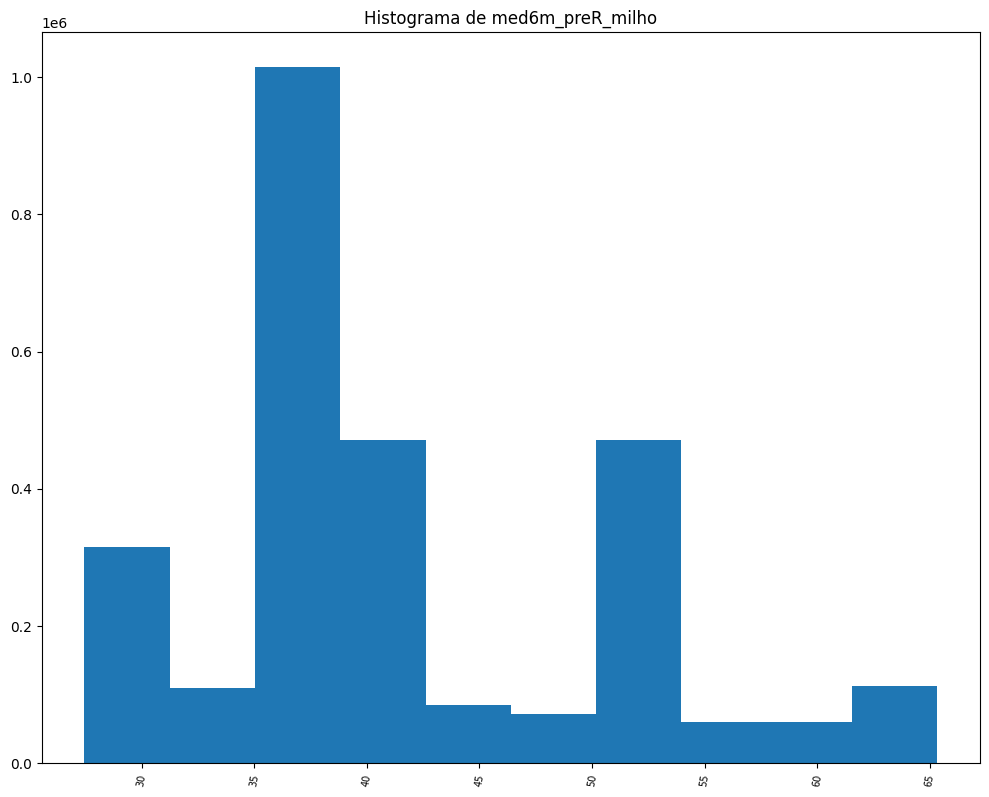

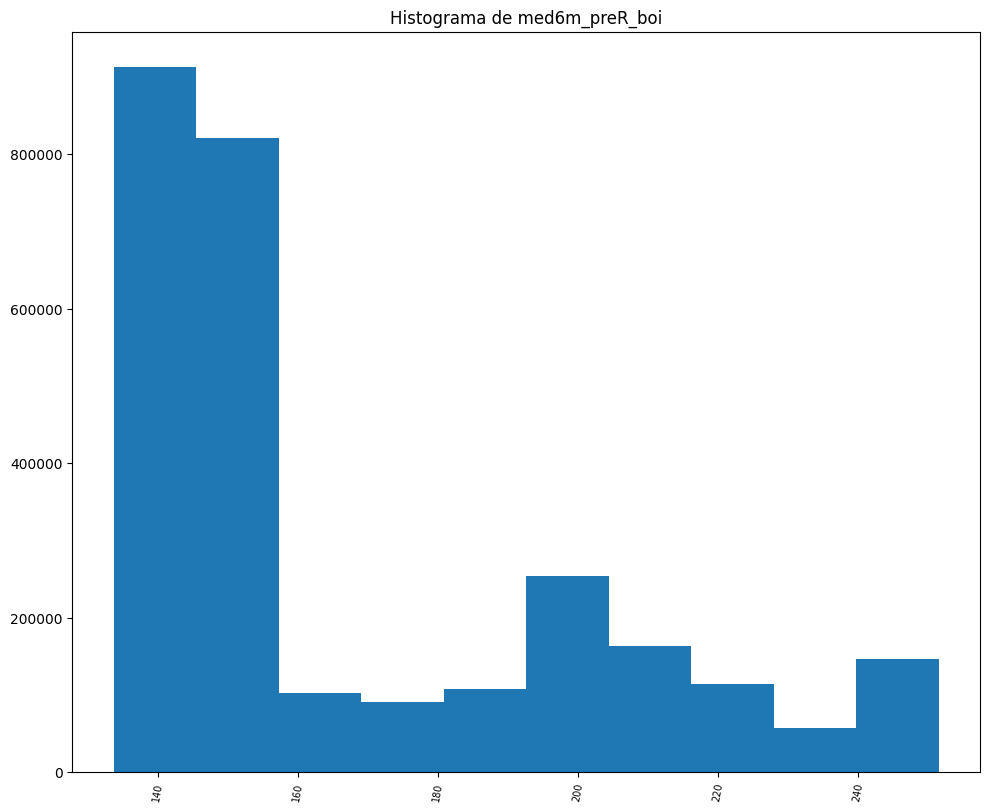

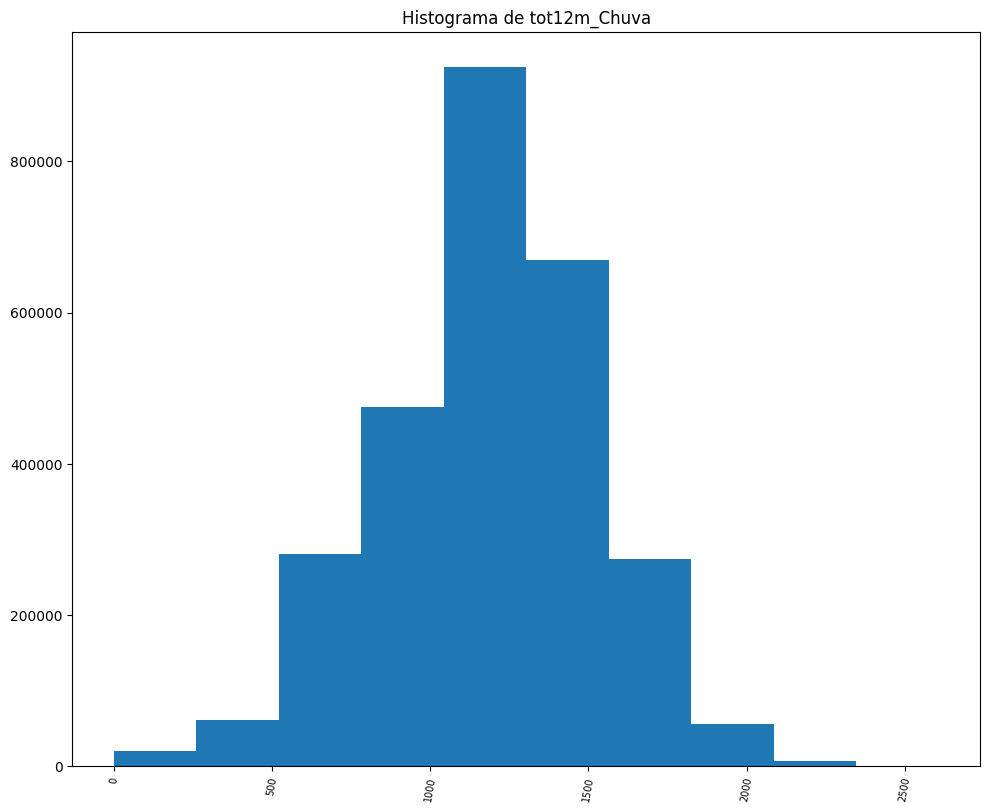

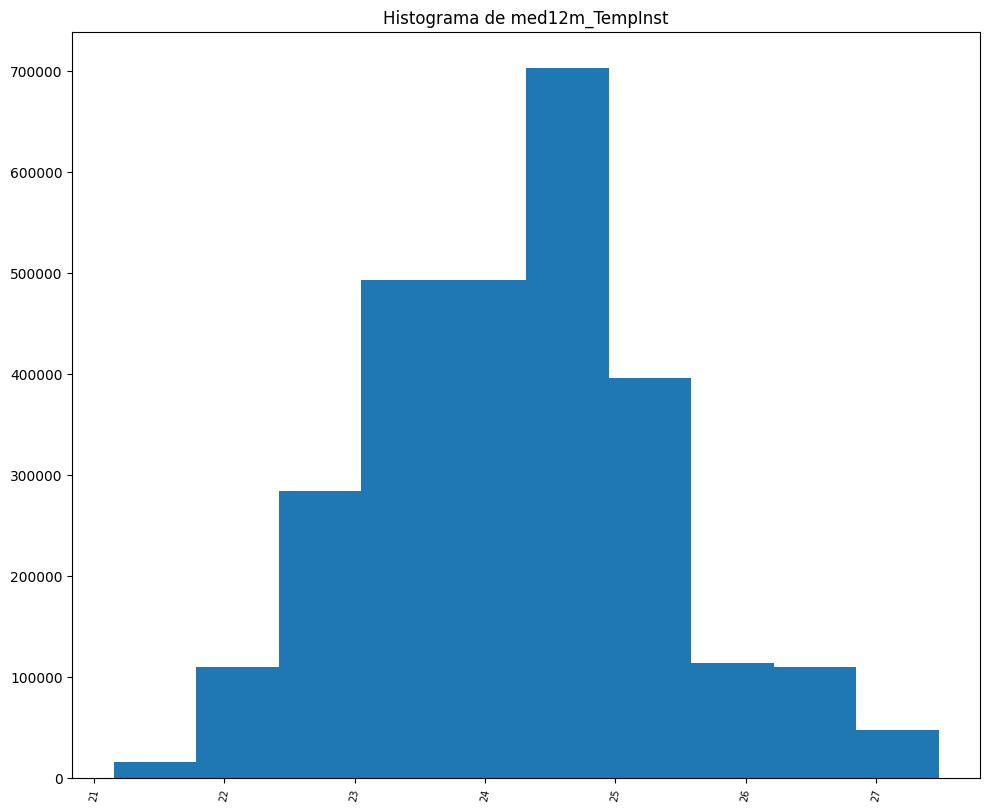

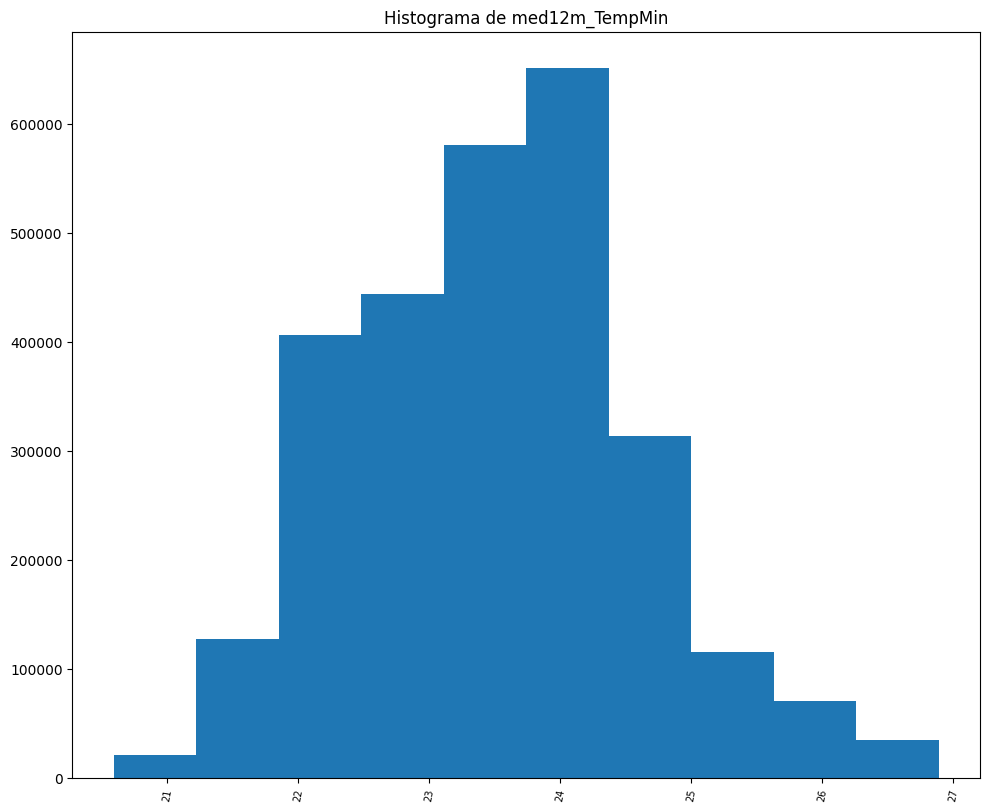

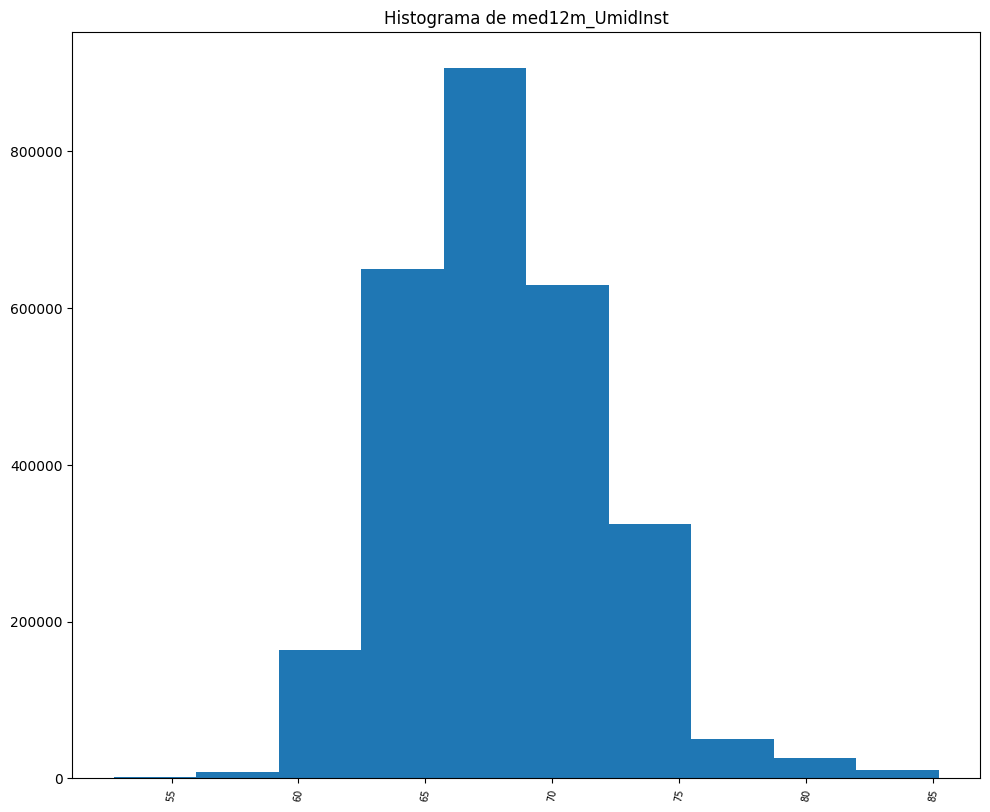

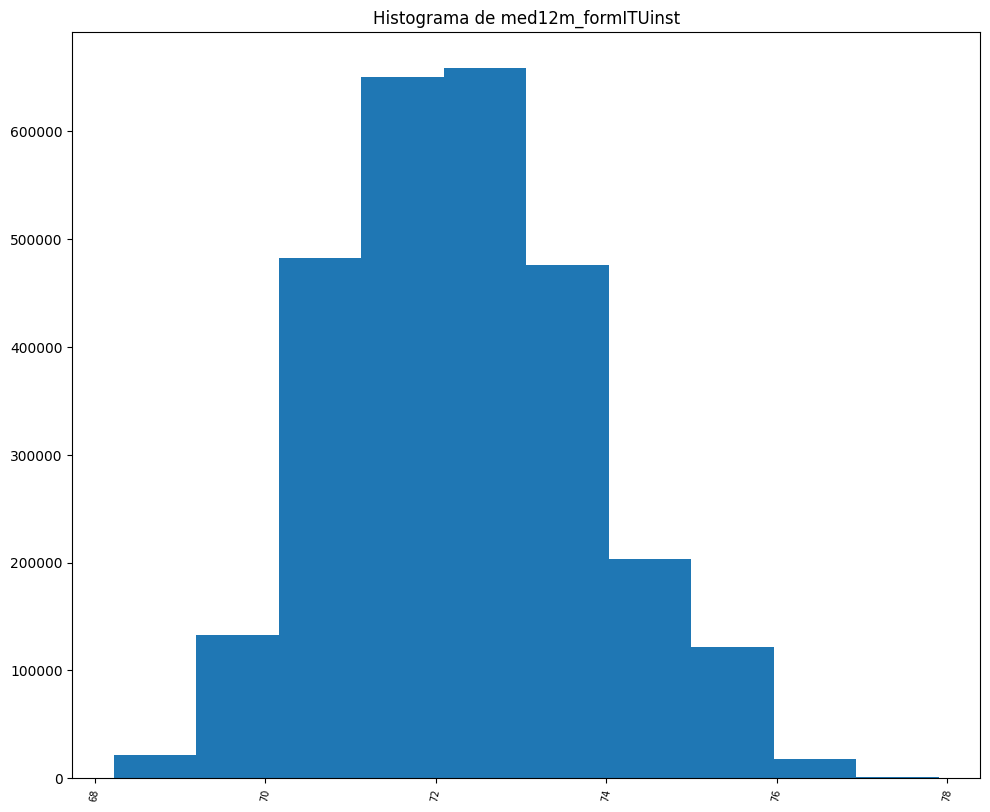

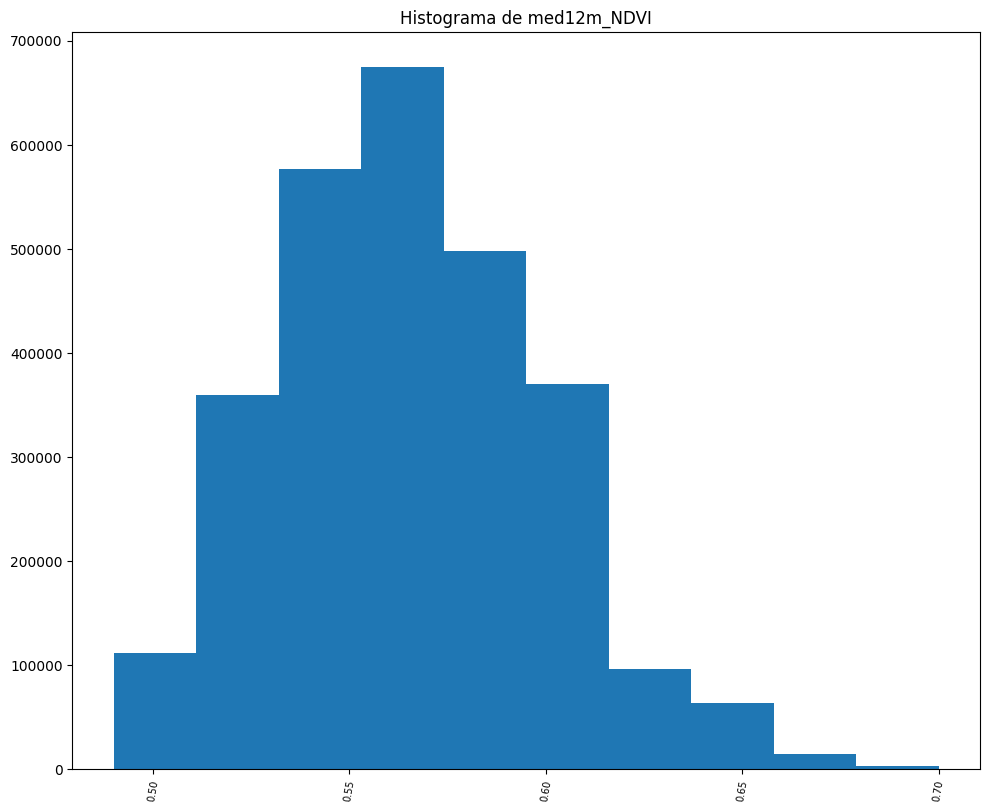

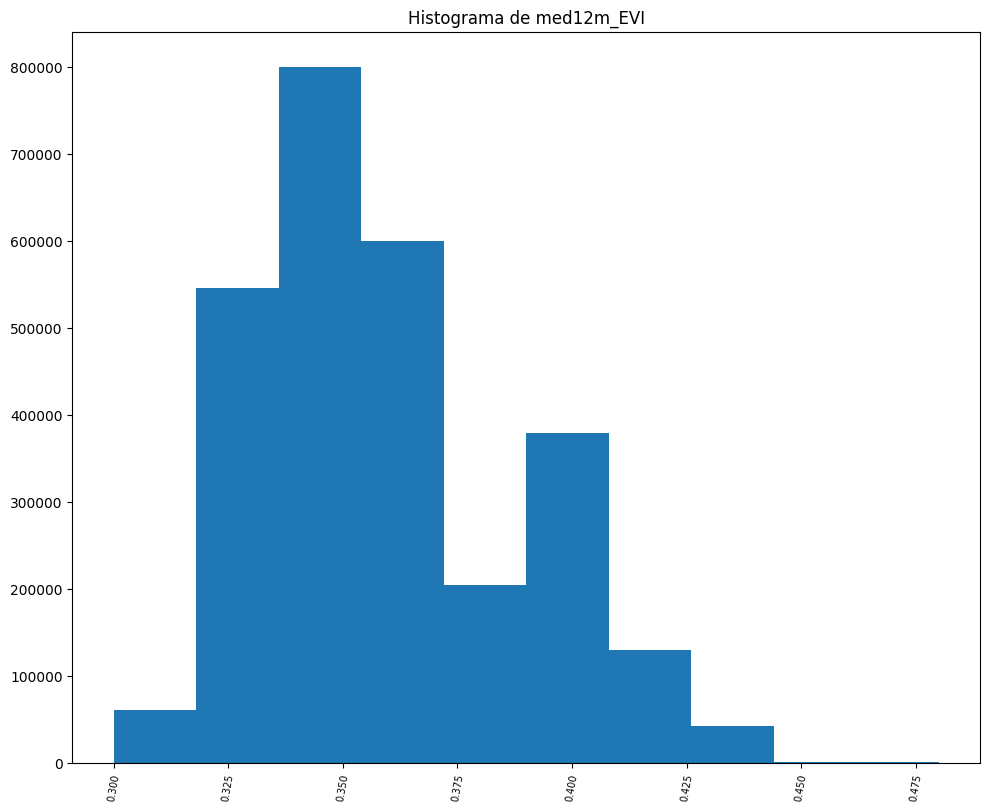

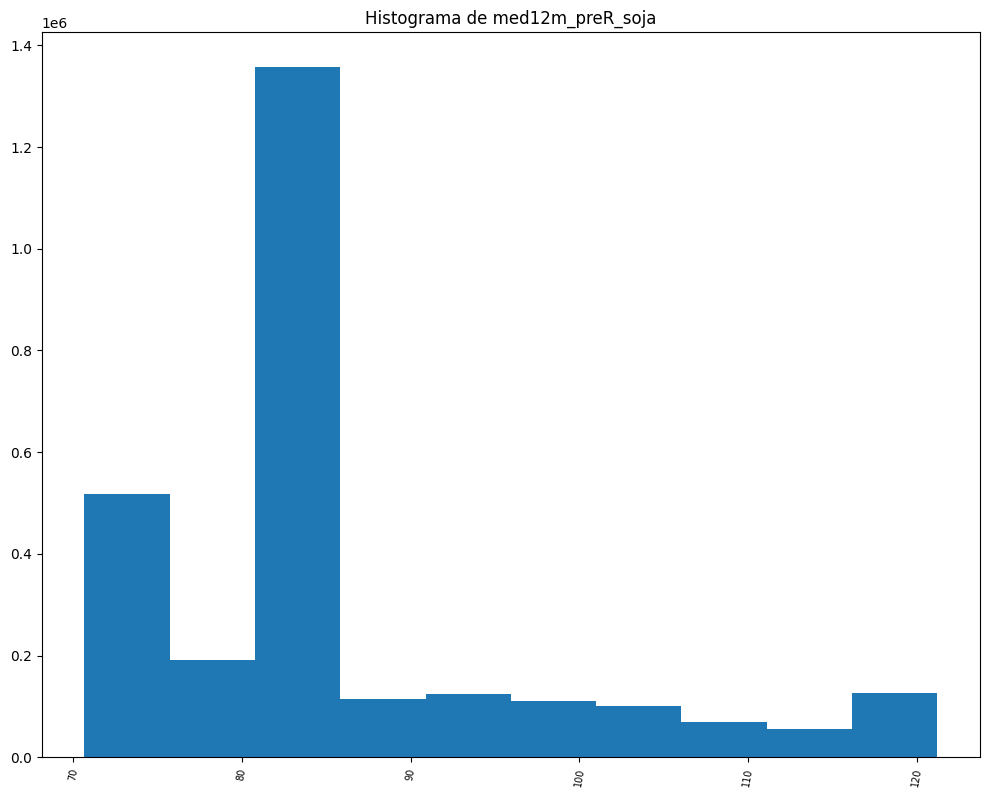

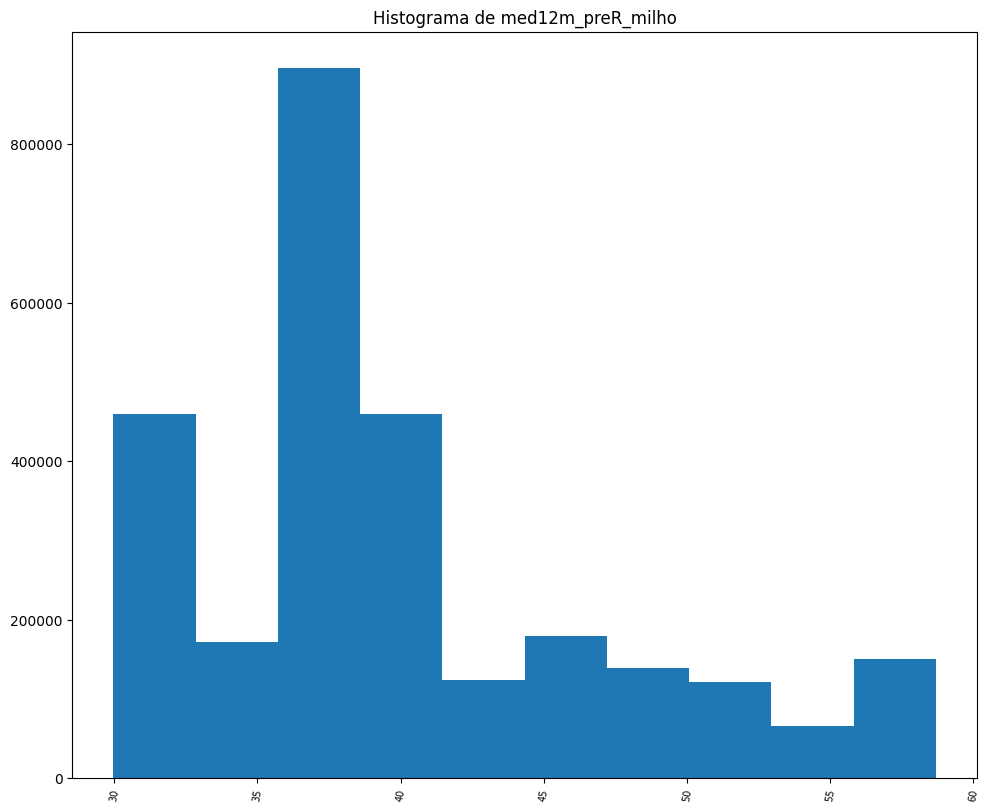

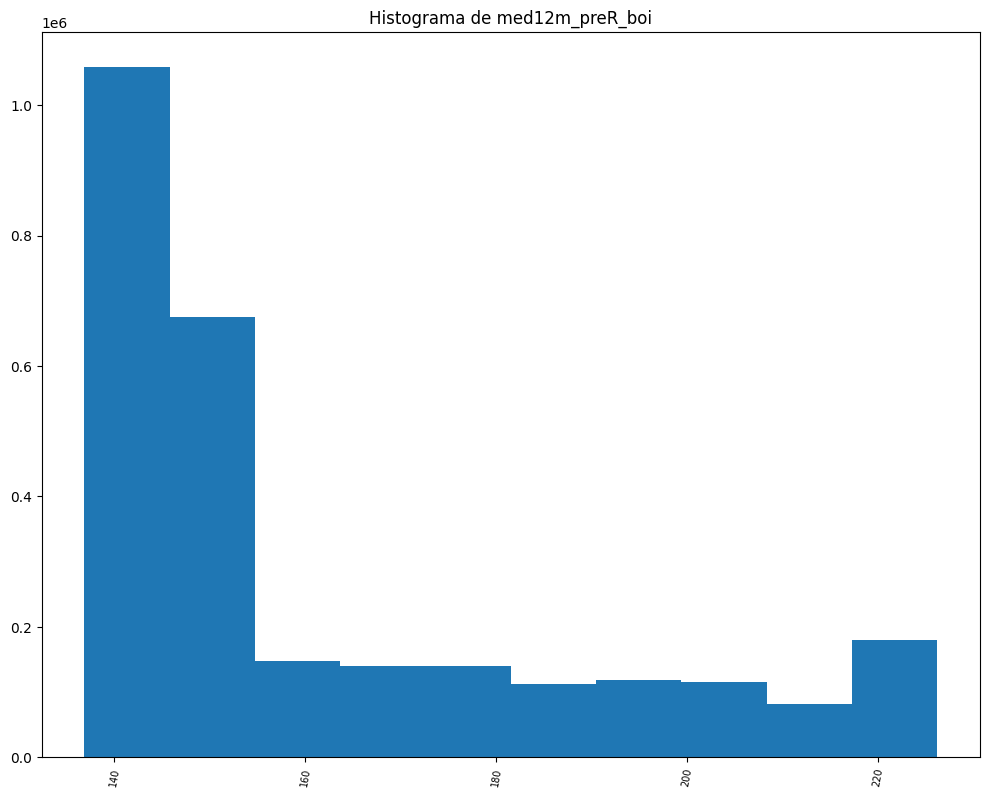

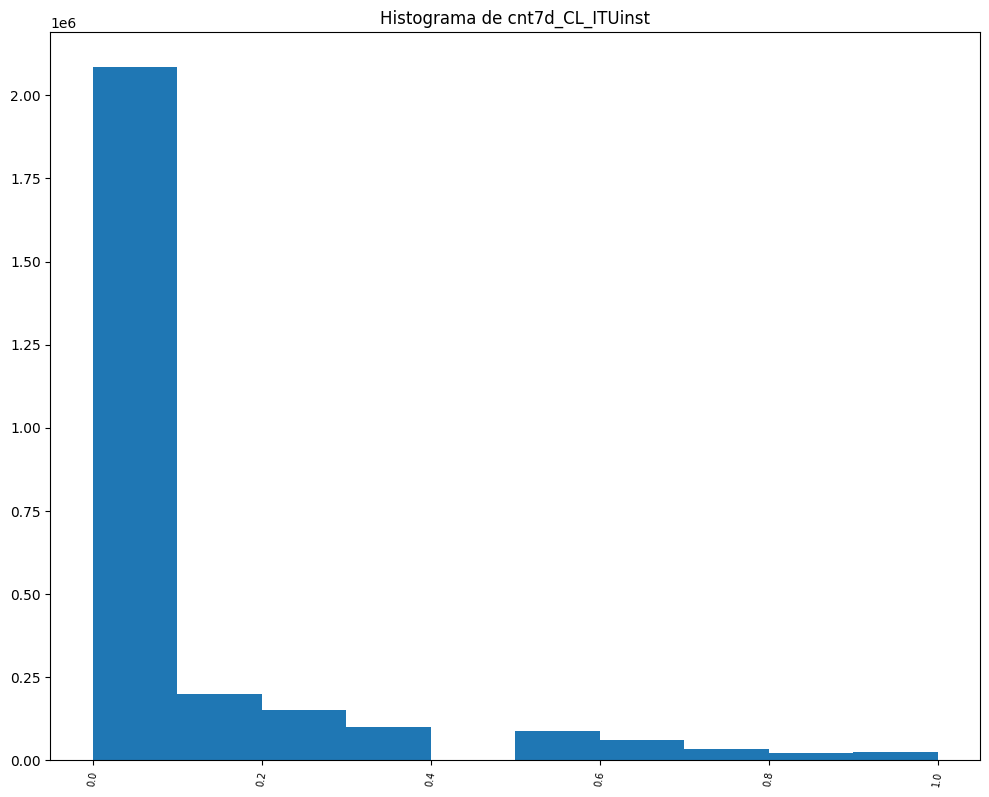

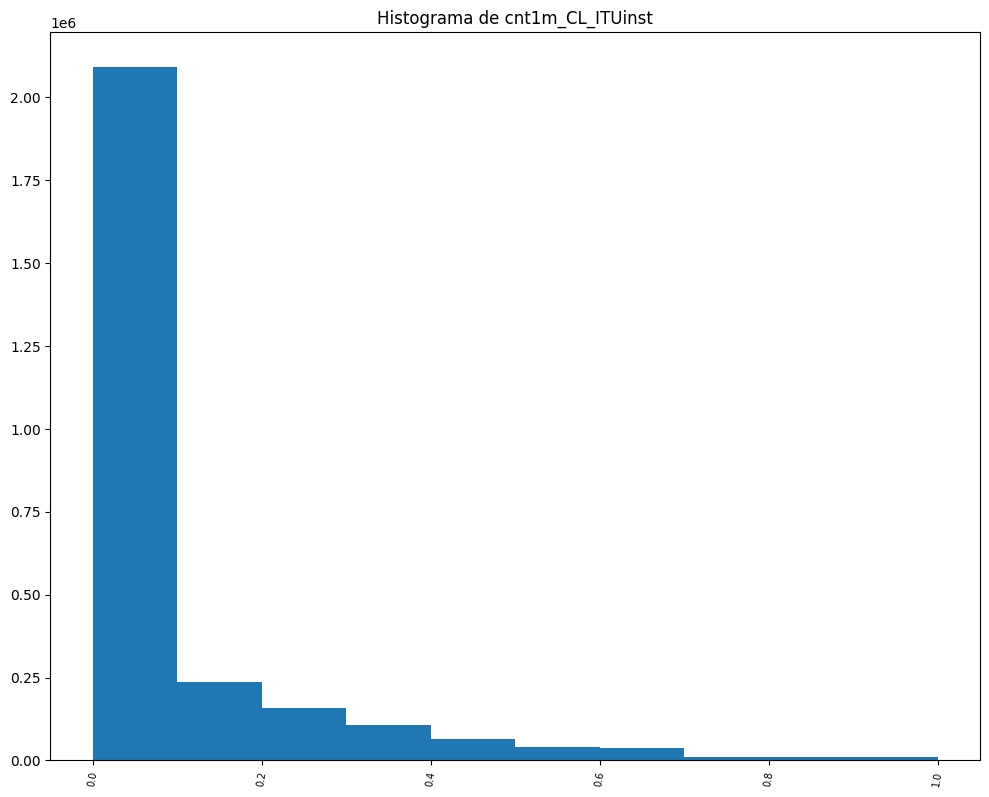

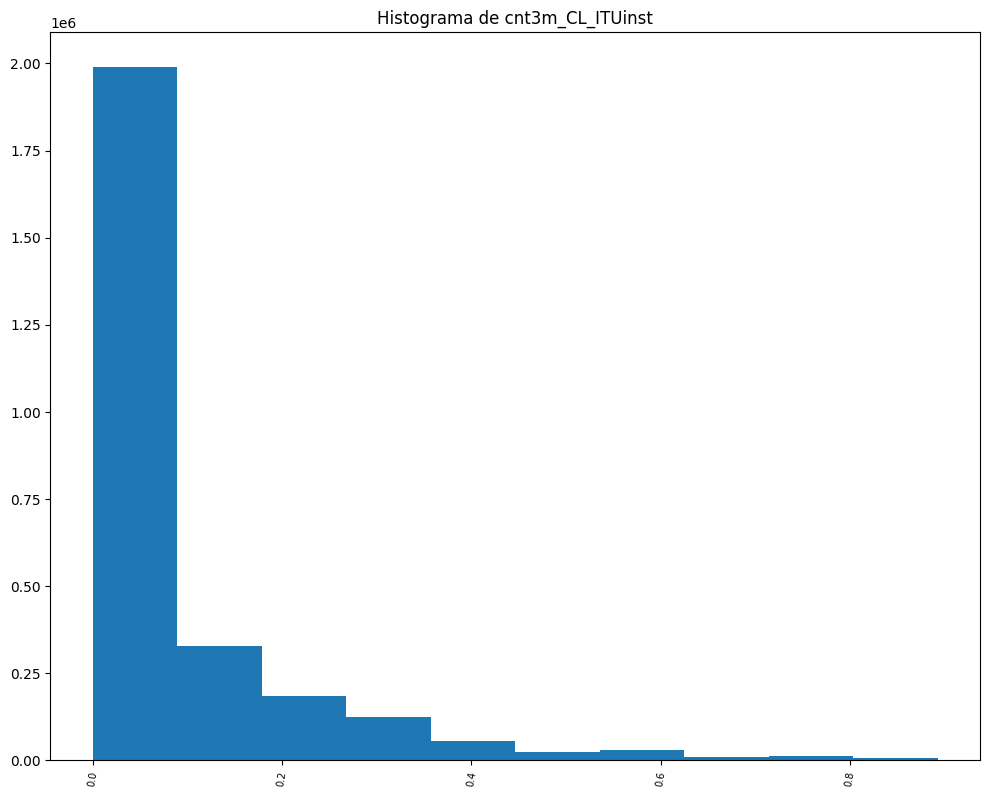

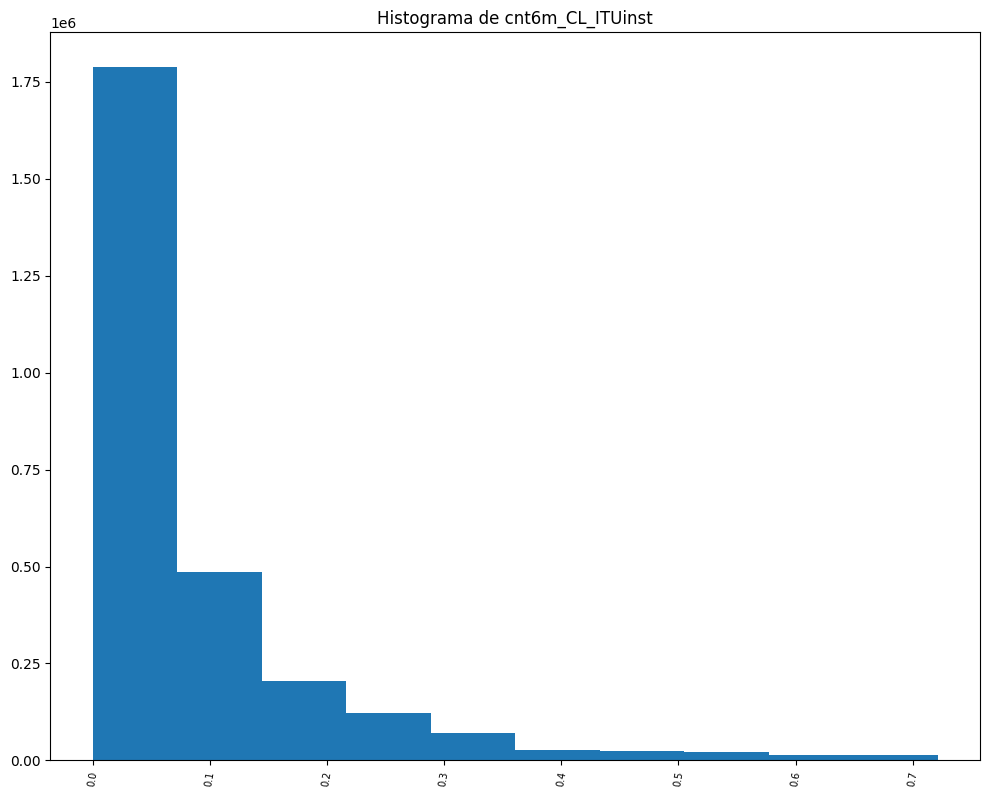

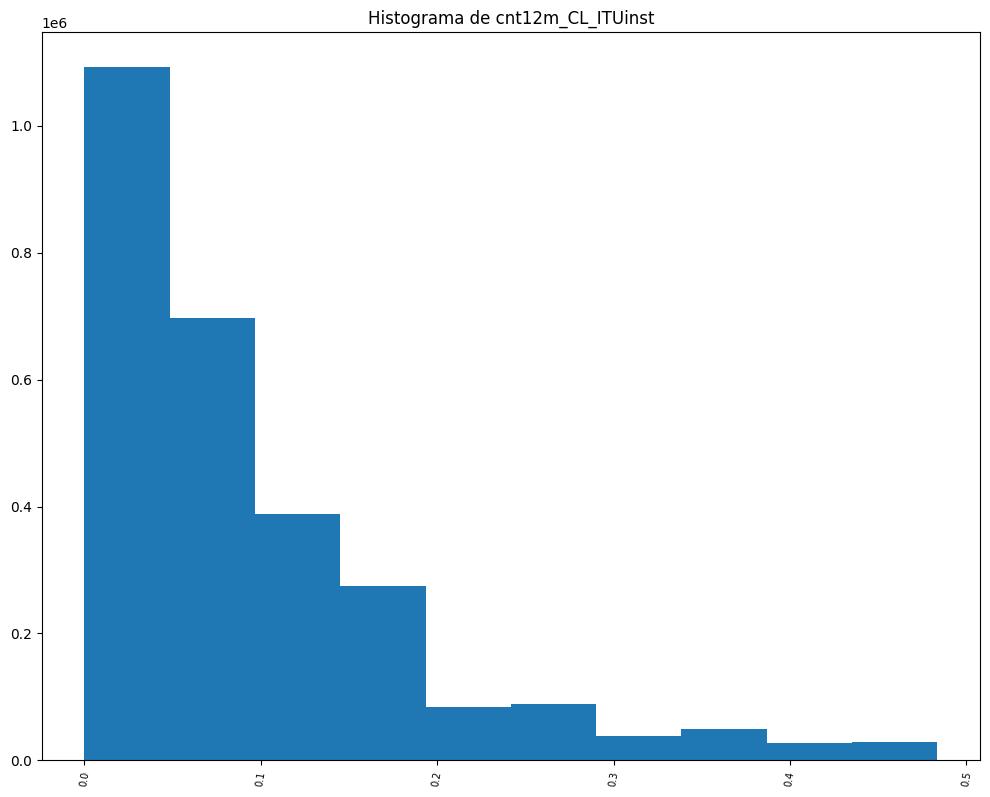

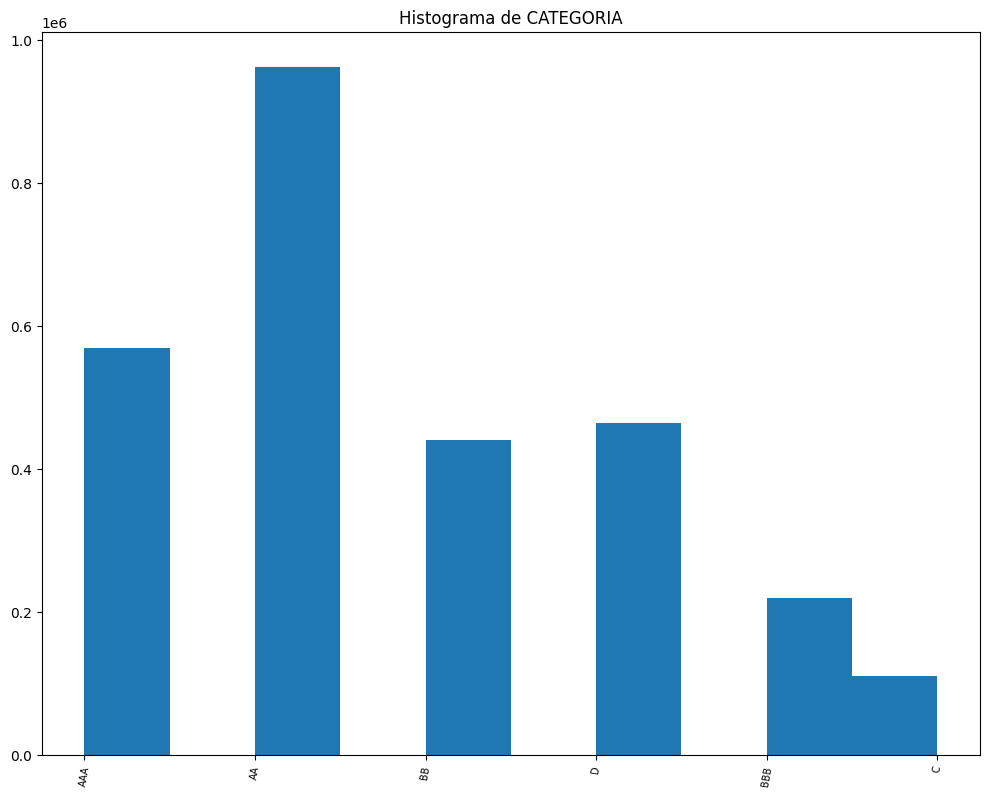

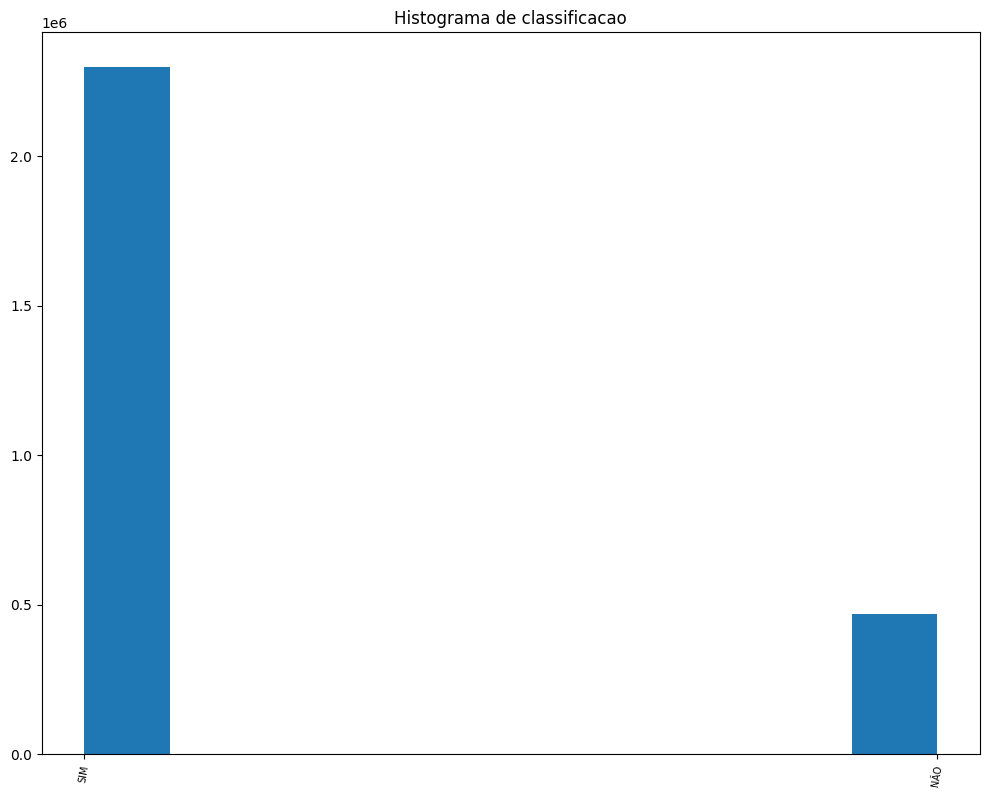



*****FIM IMPRIMIR HISTOGRAM******
Function histogram Took 0:01:01.388736



In [8]:
# Print histogram for each attribute
reports.histogram(
    data_frame=precoce_ms_data_frame
)

## Print boxplot for each attribute


*****INICIO IMPRIMIR BOXPLOT******


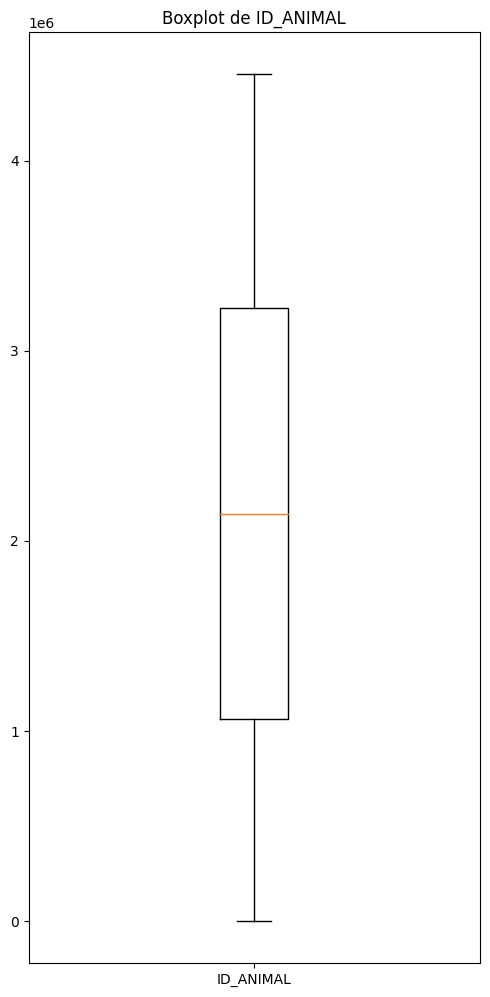

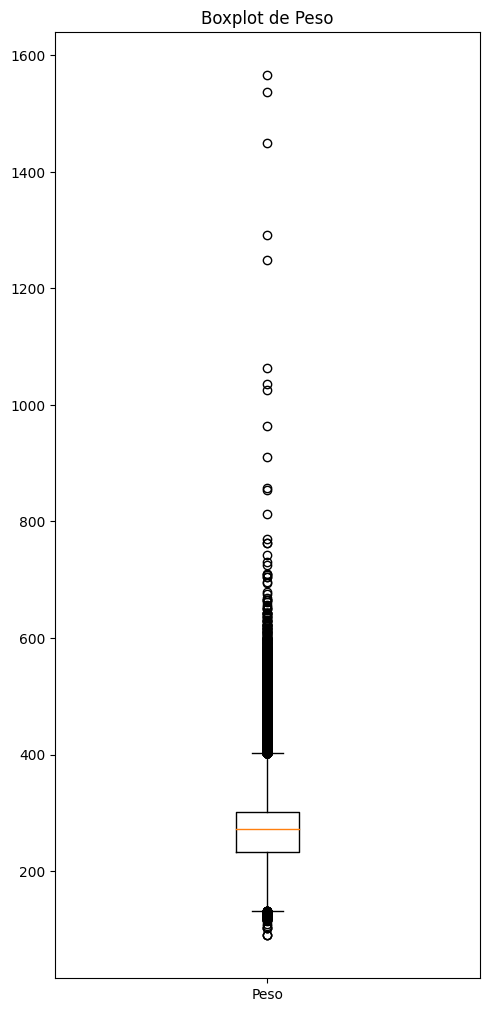

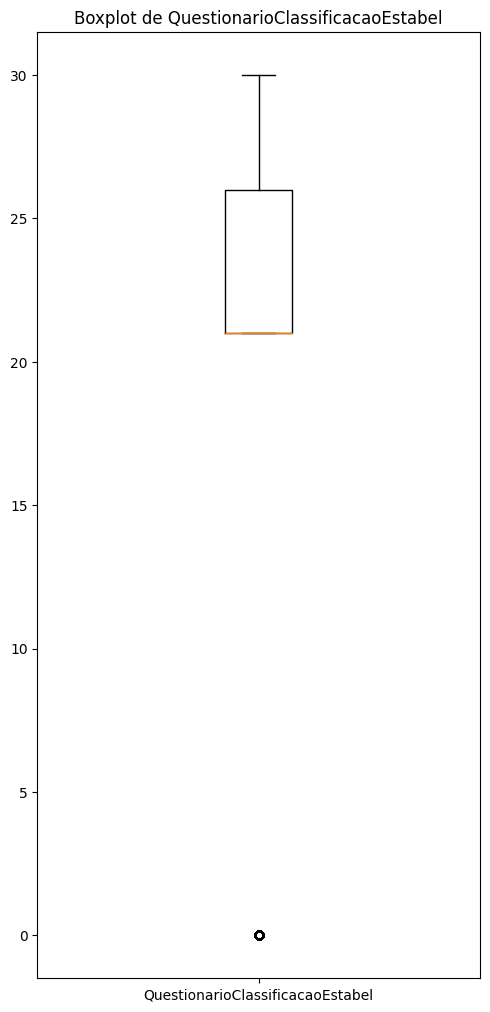

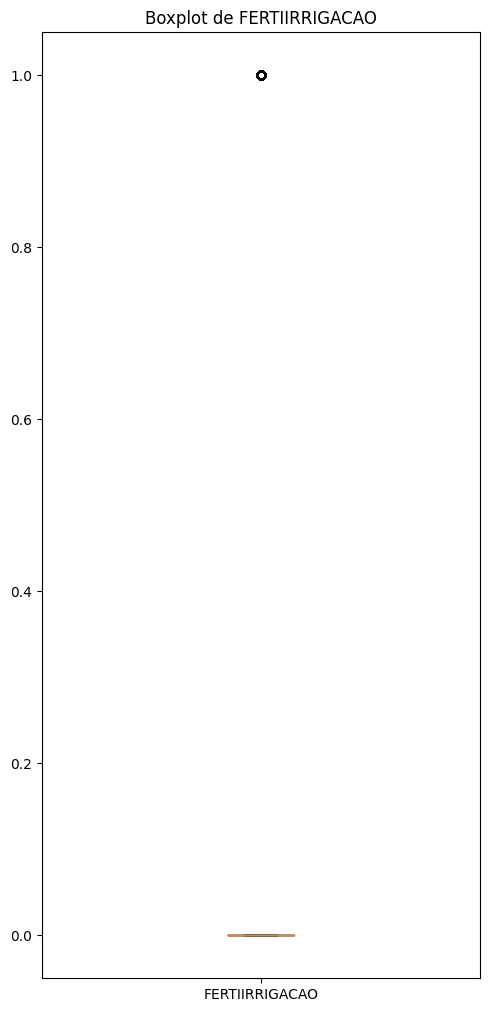

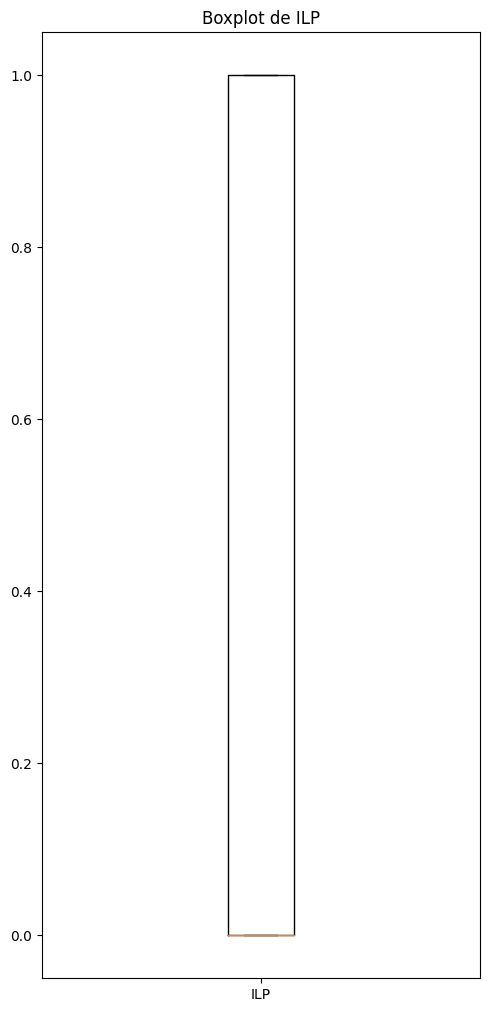

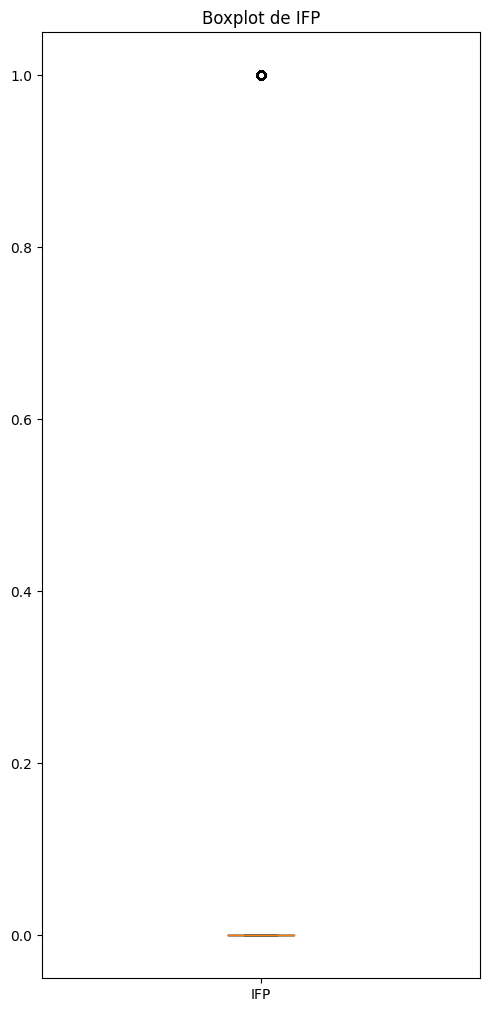

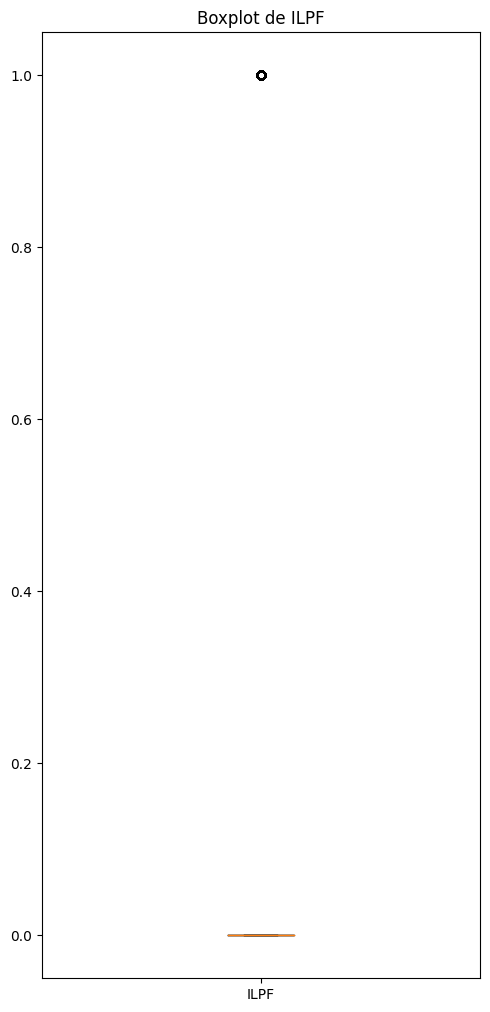

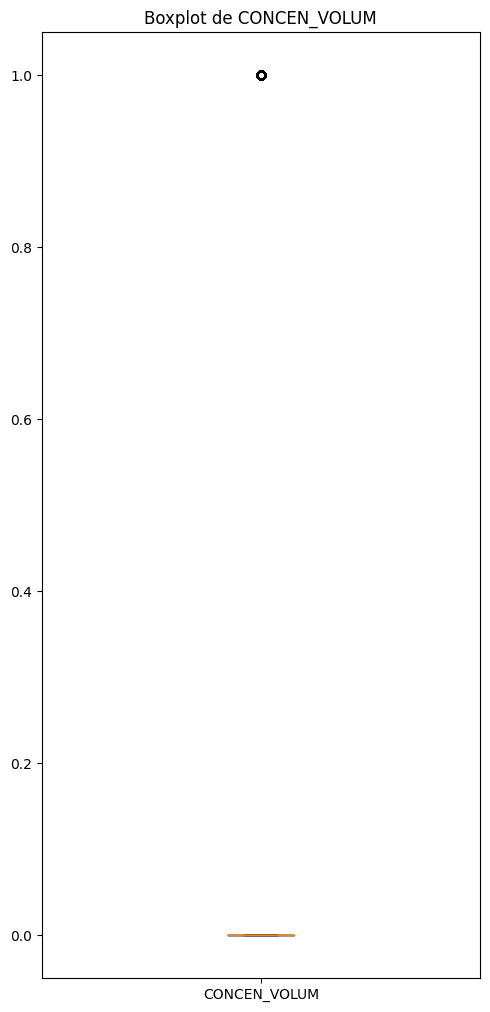

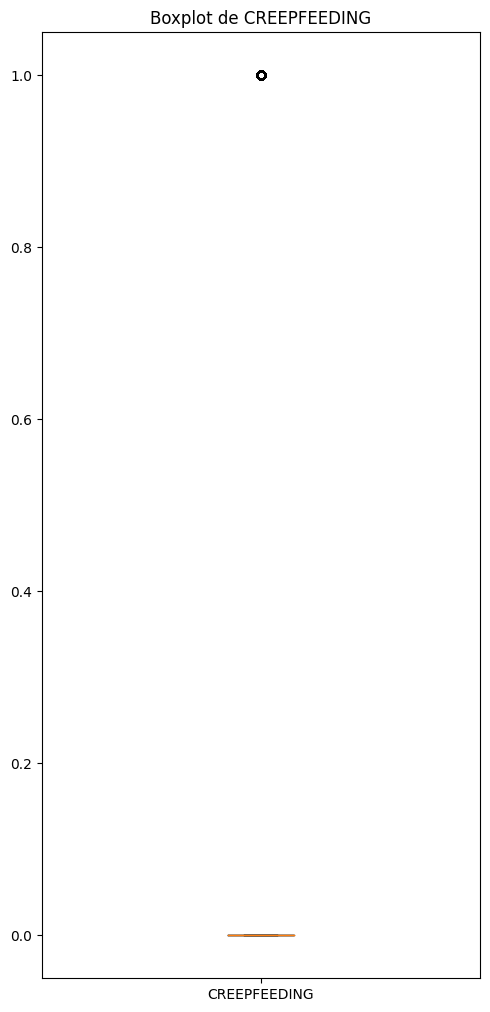

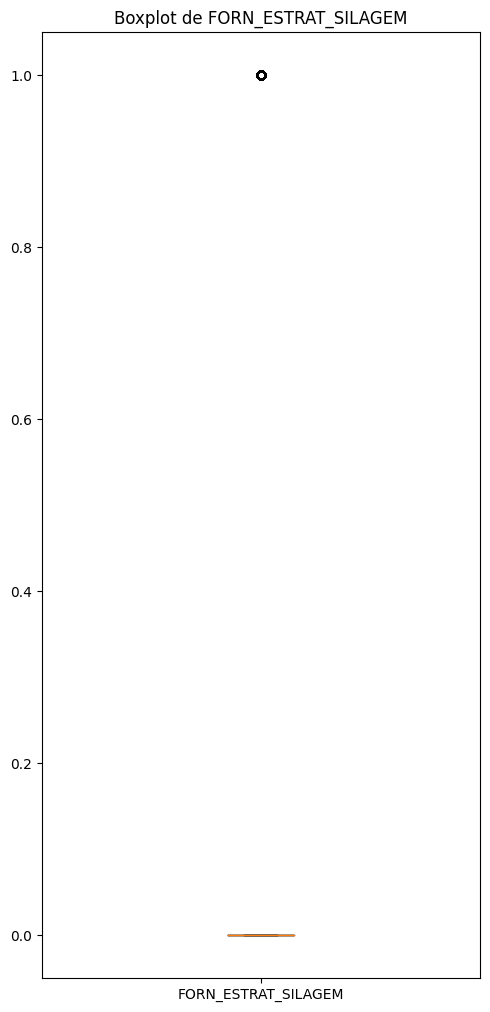

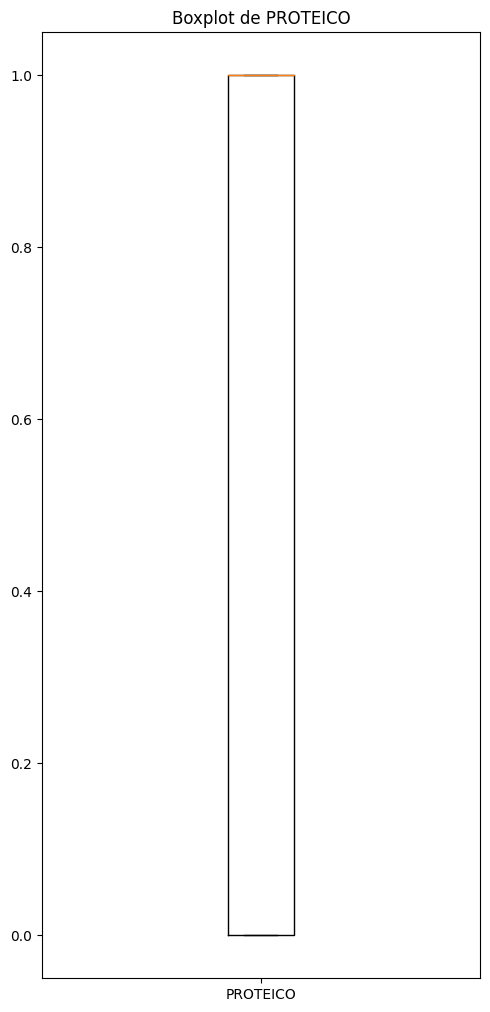

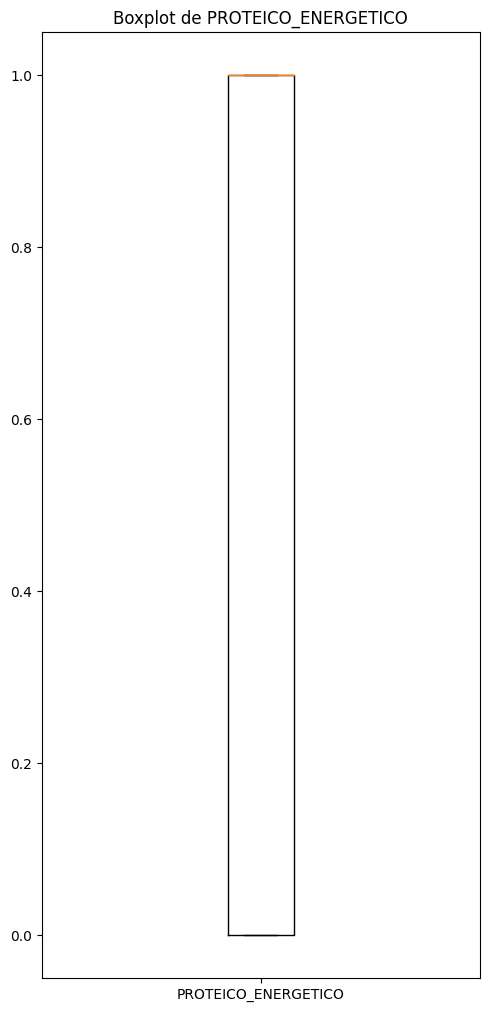

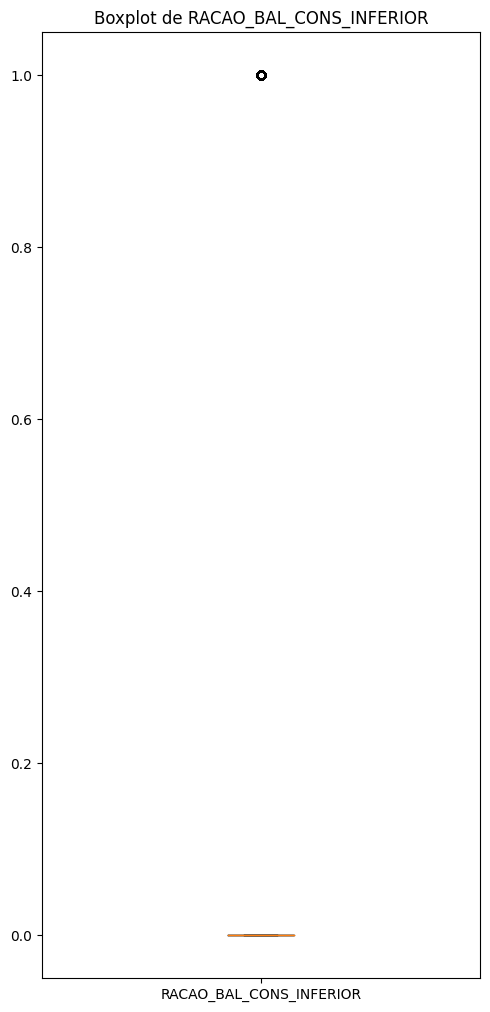

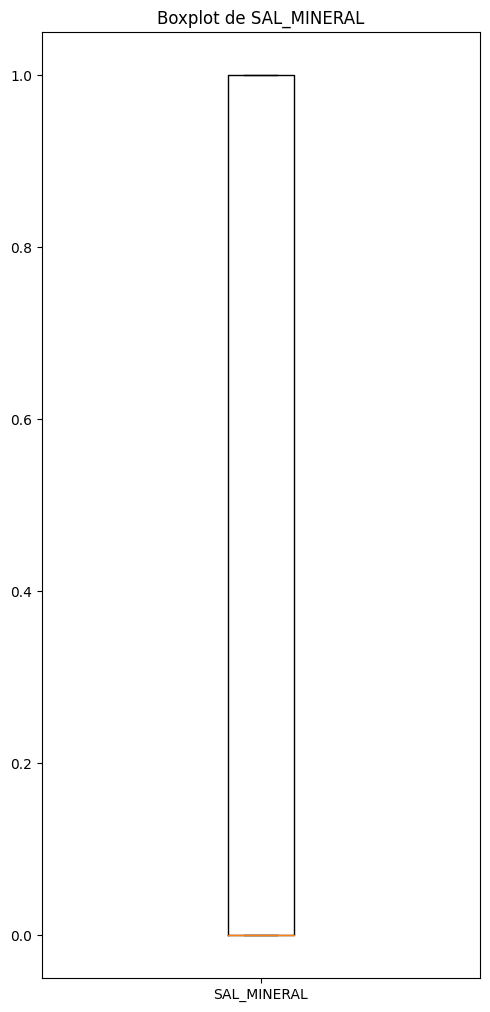

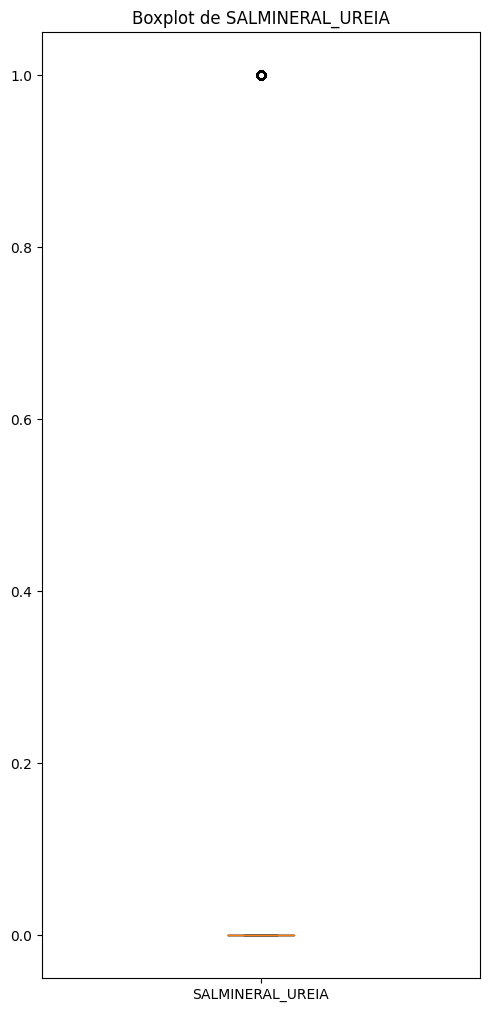

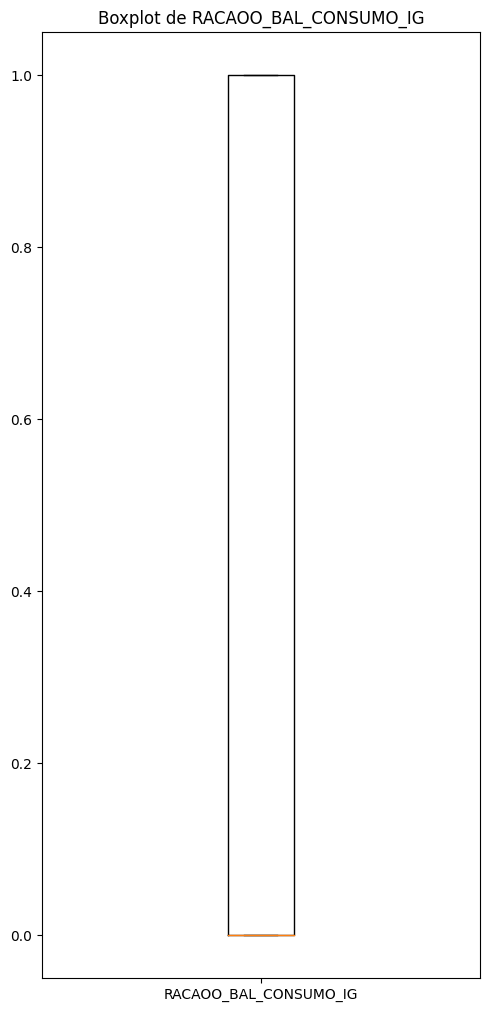

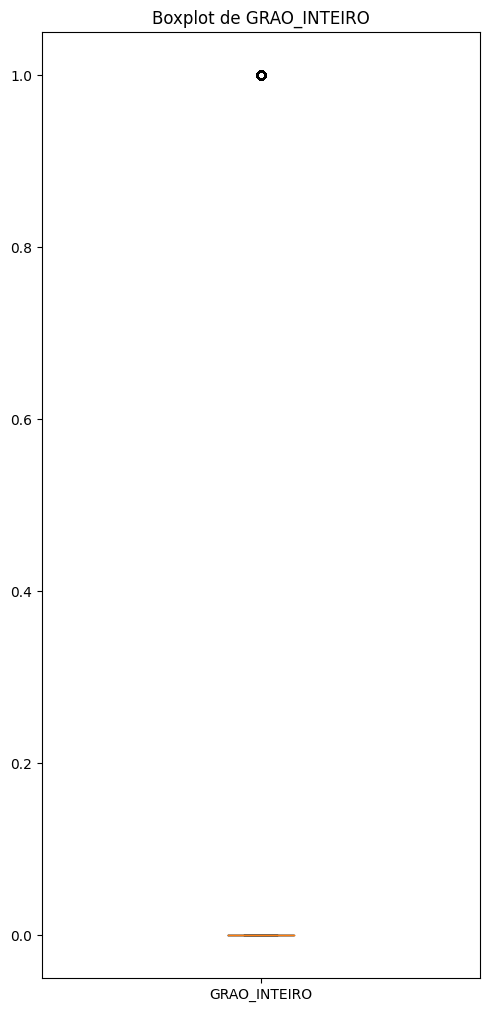

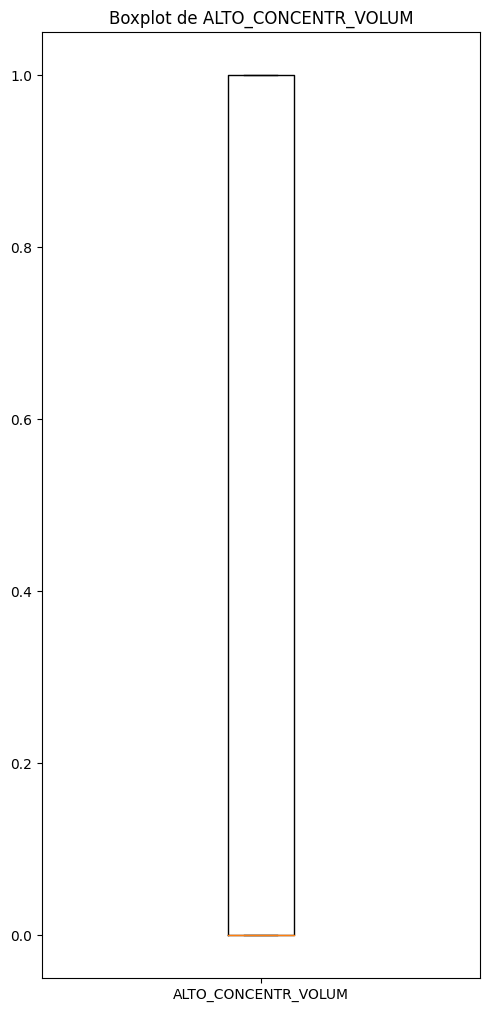

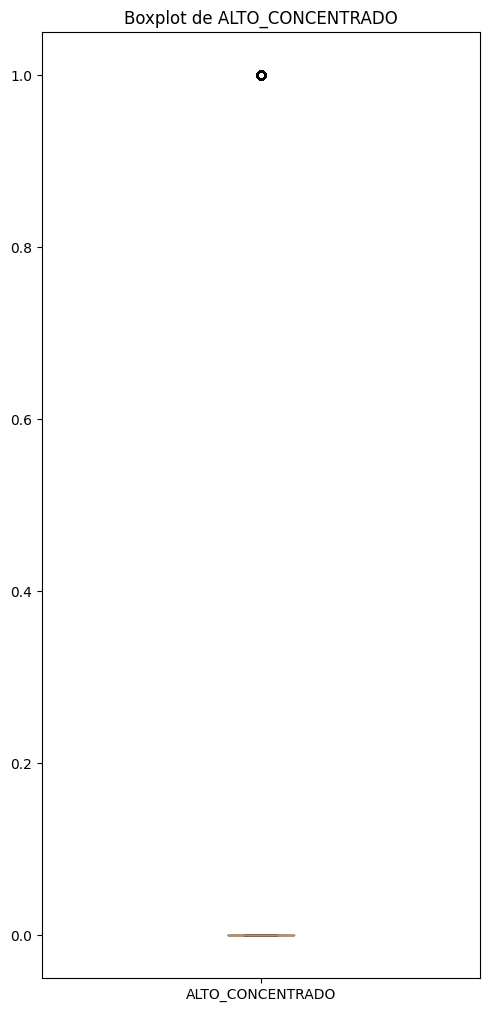

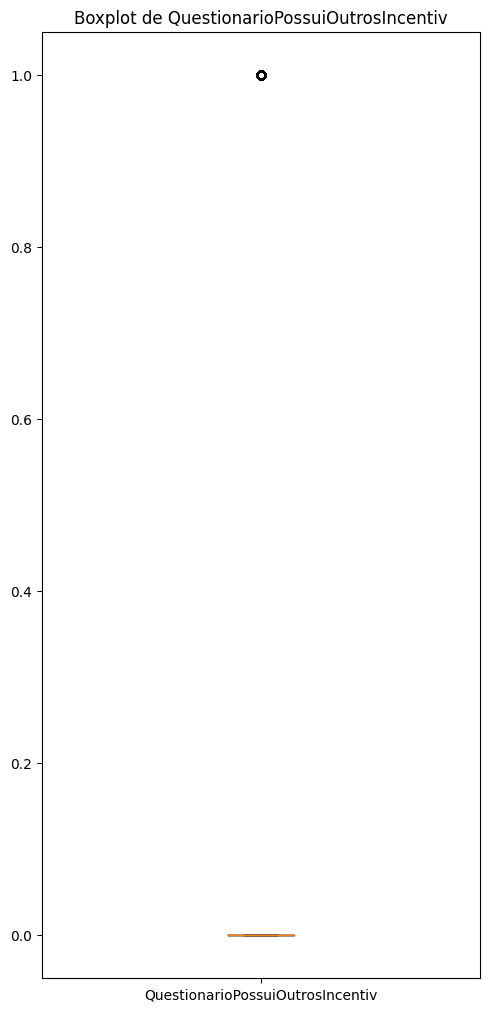

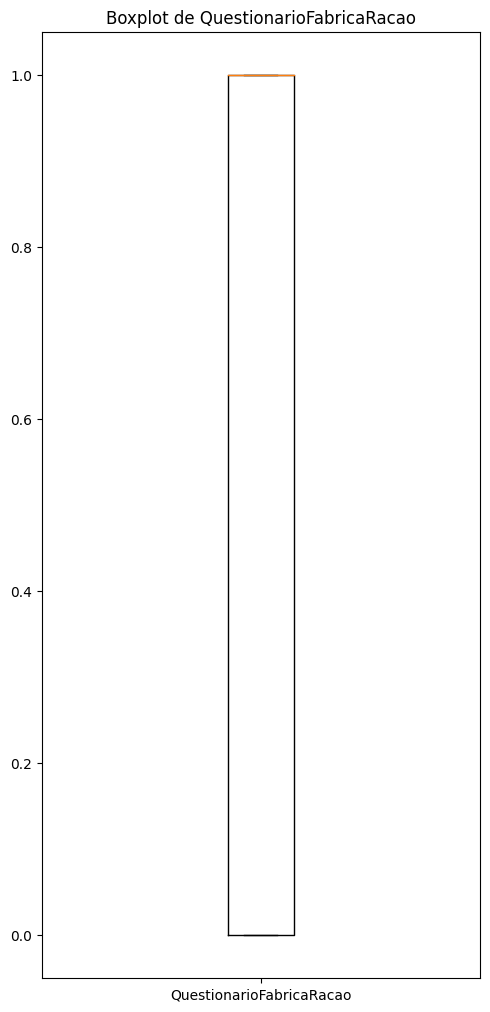

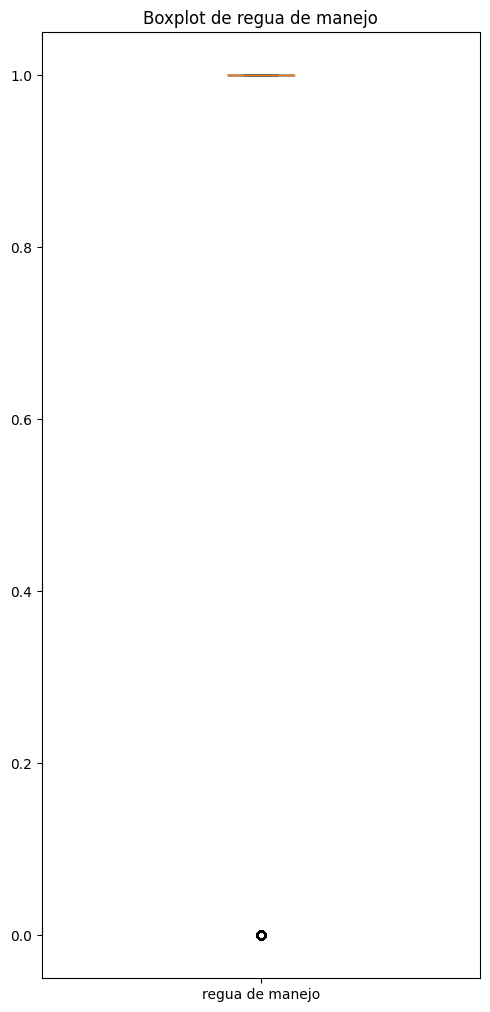

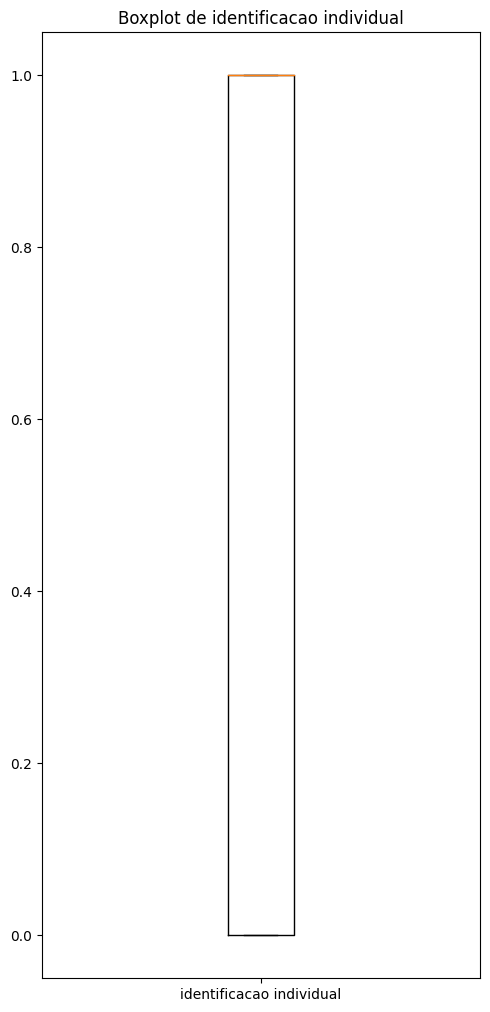

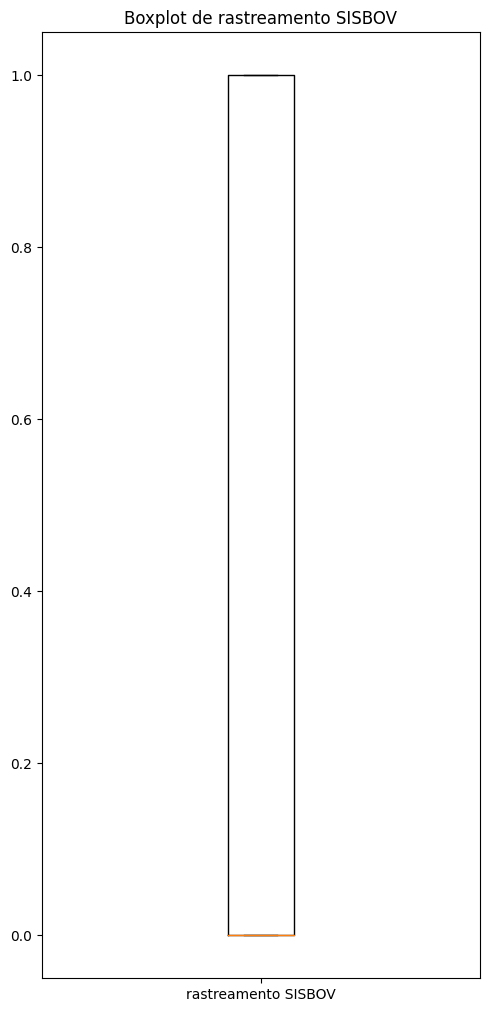

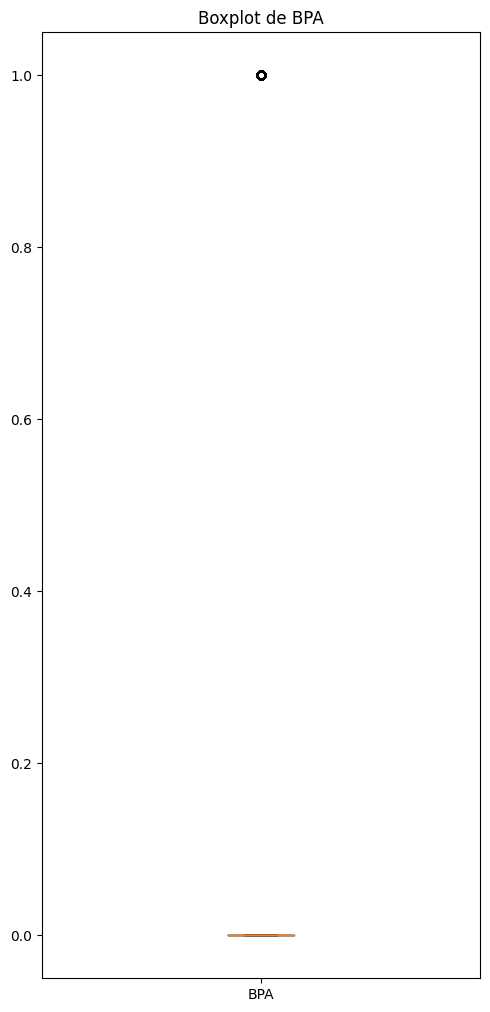

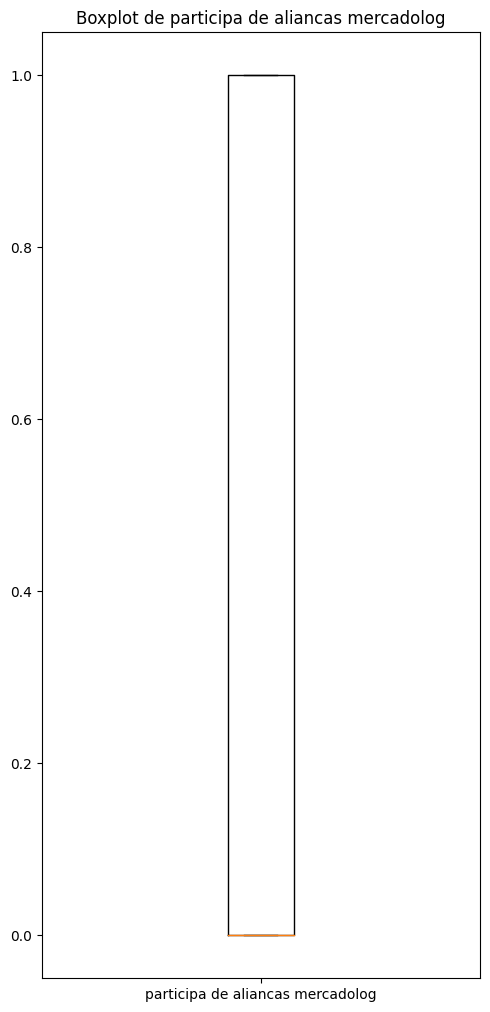

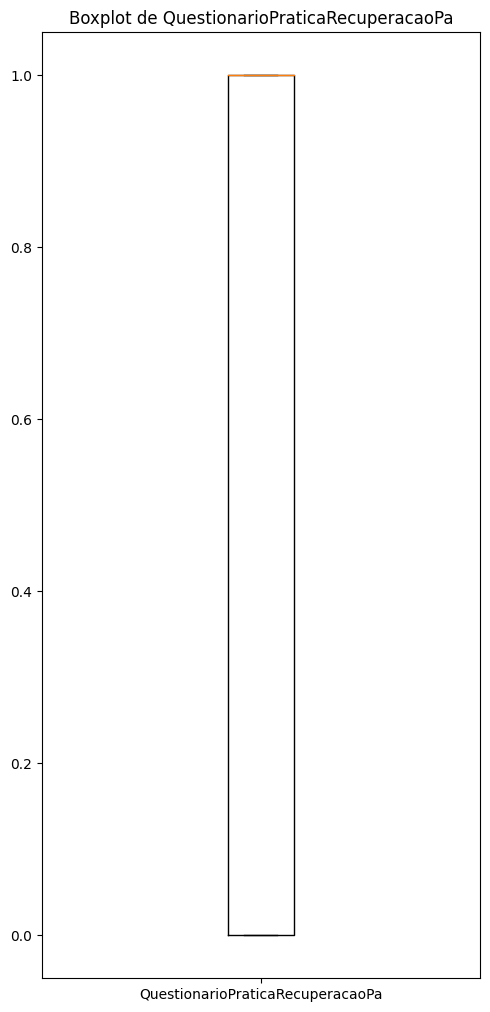

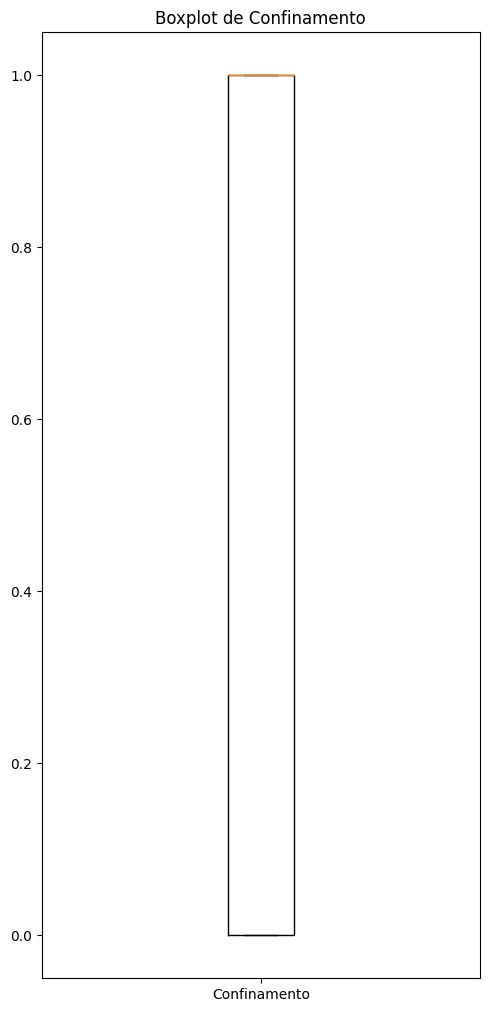

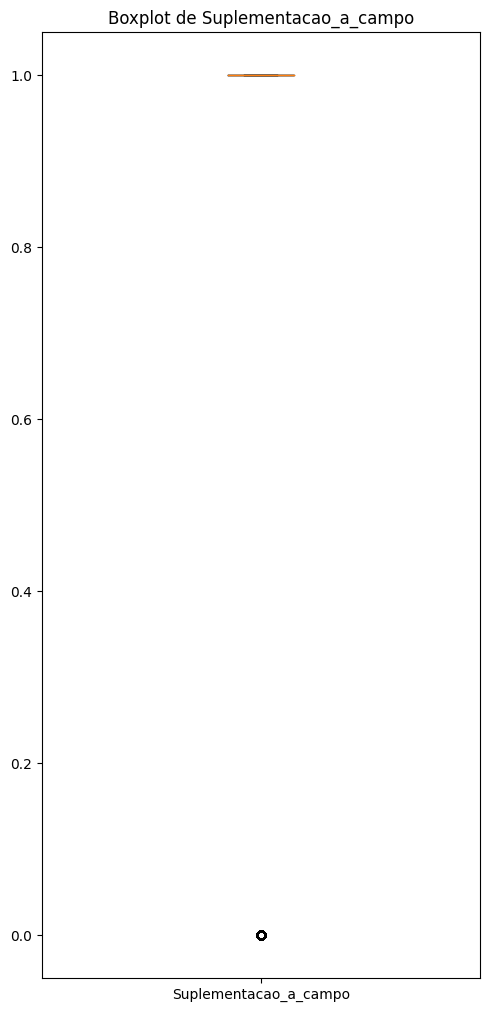

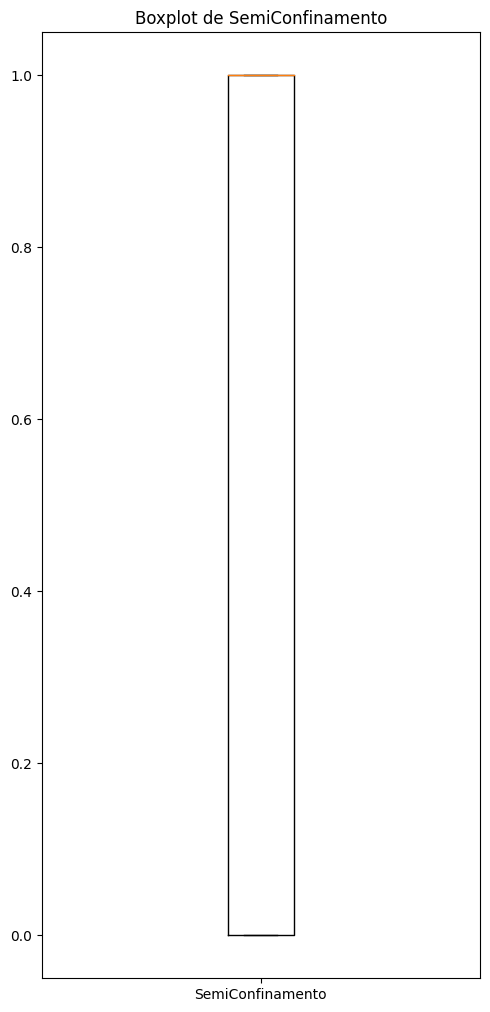

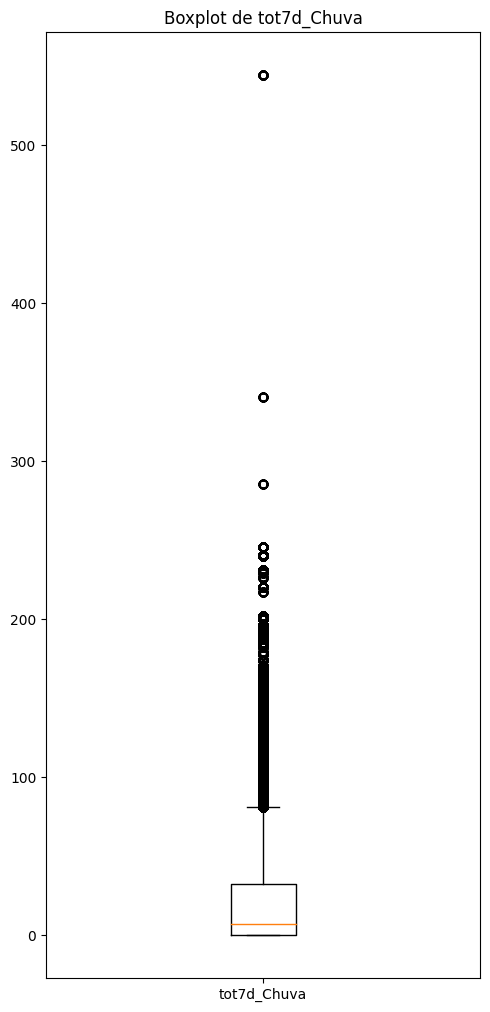

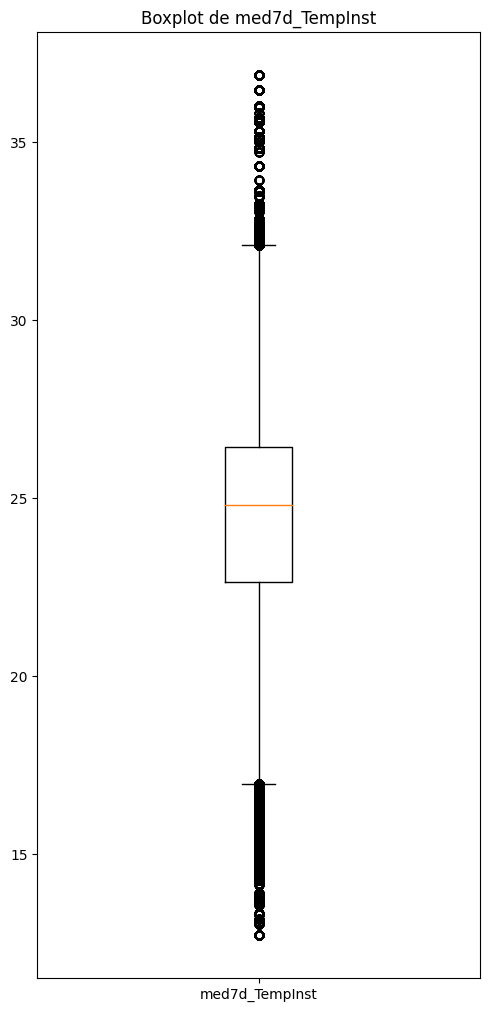

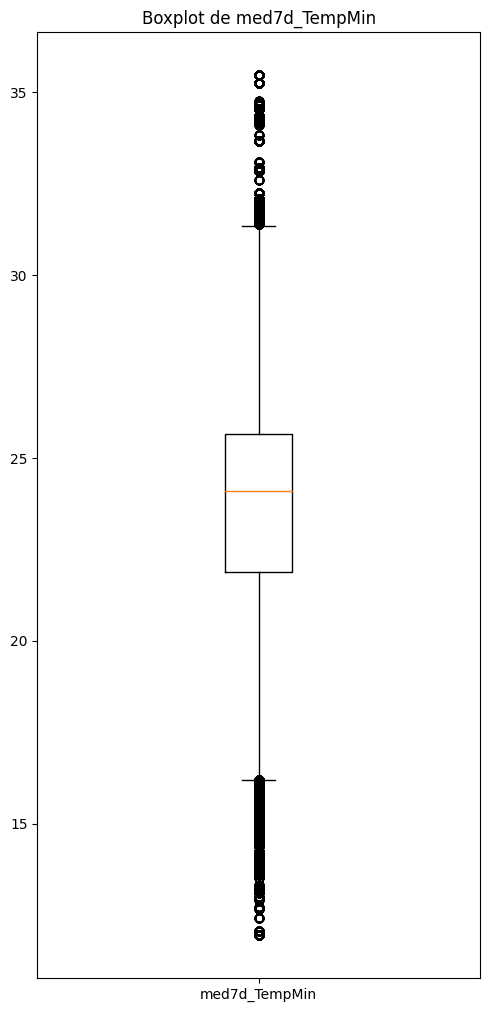

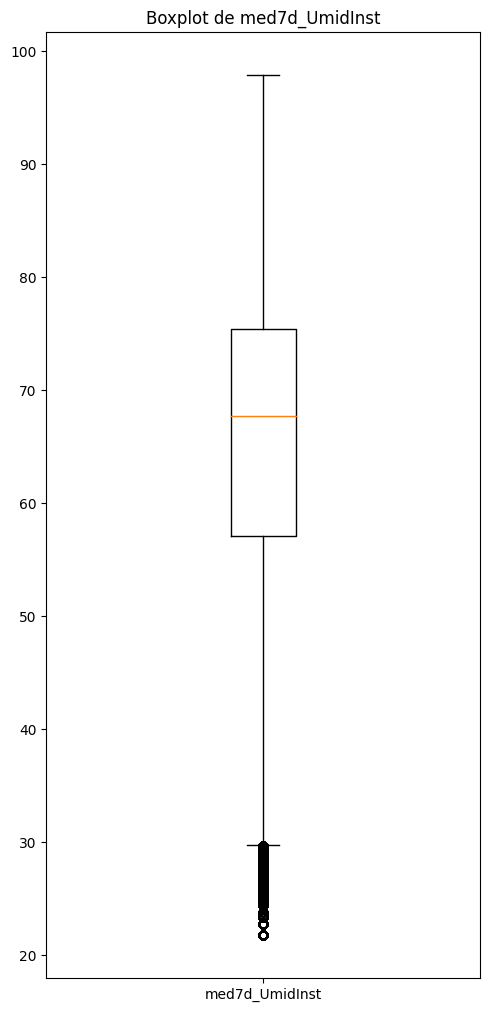

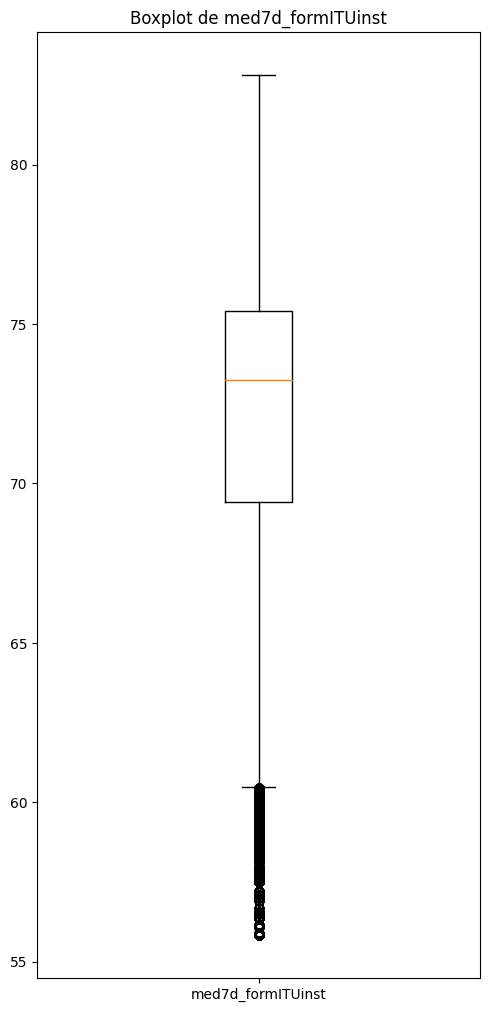

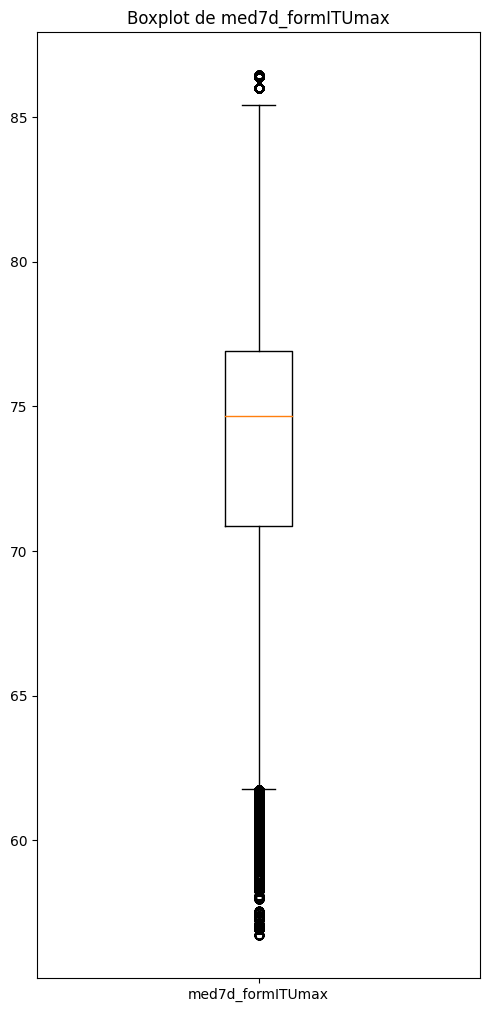

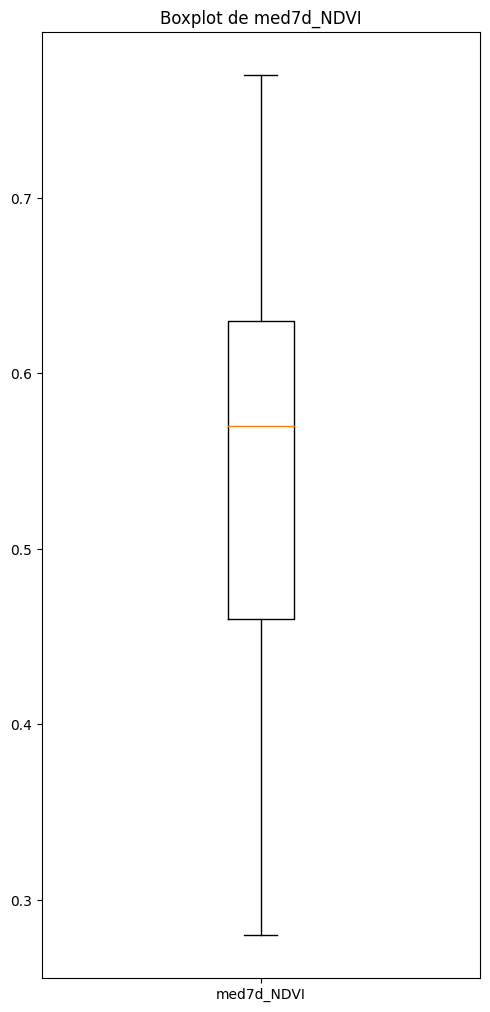

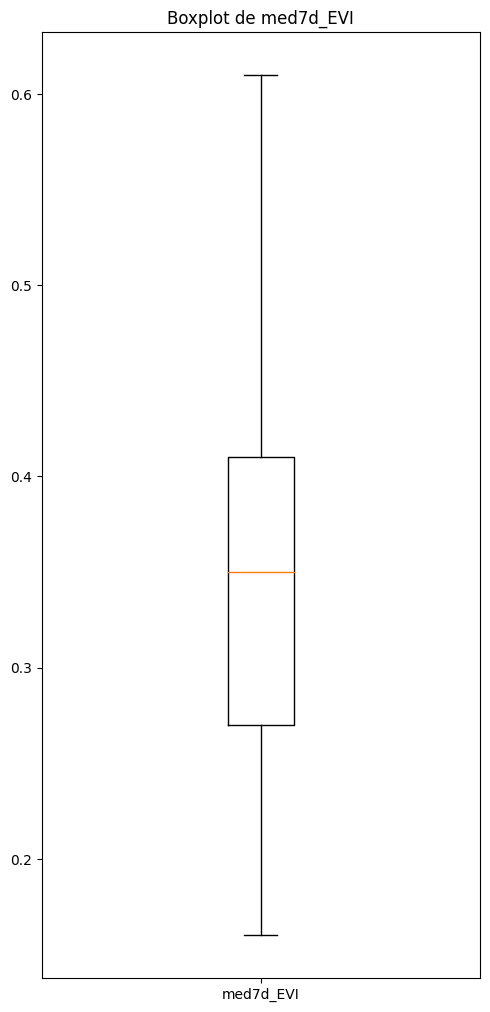

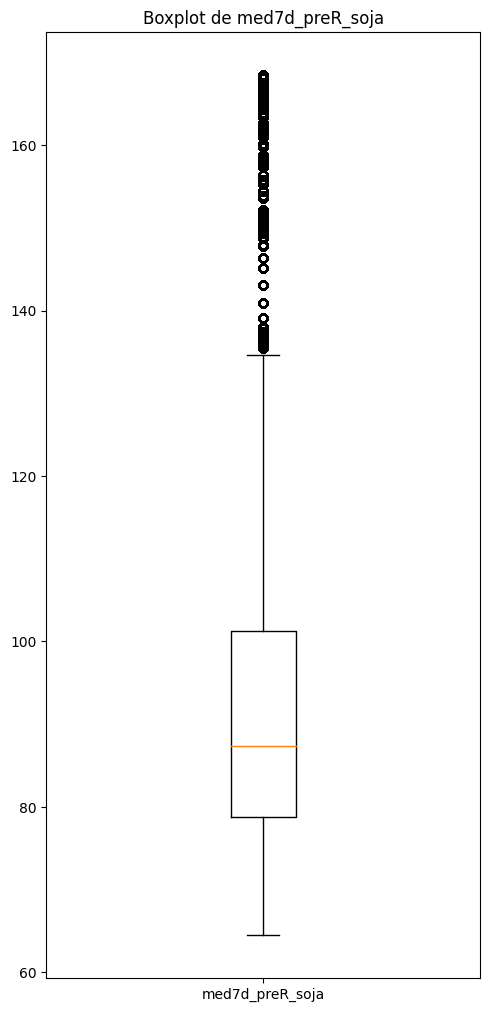

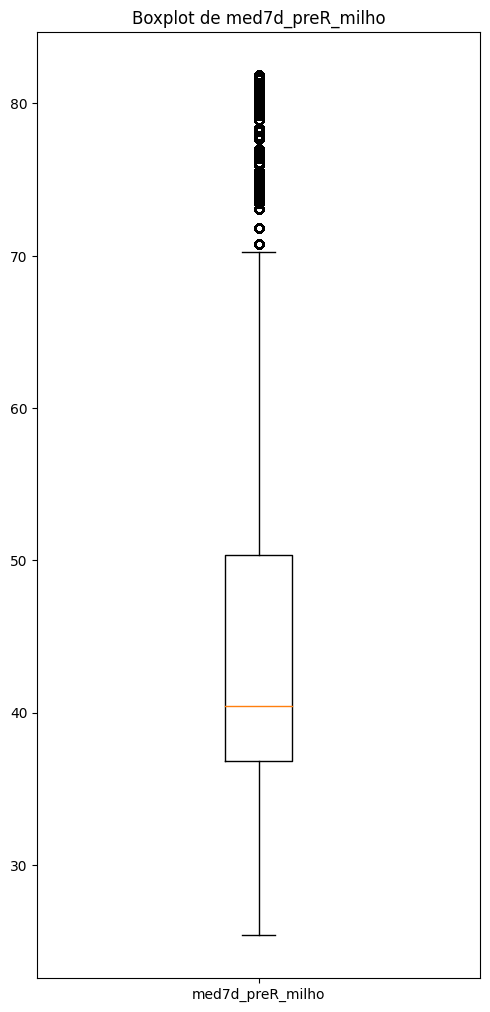

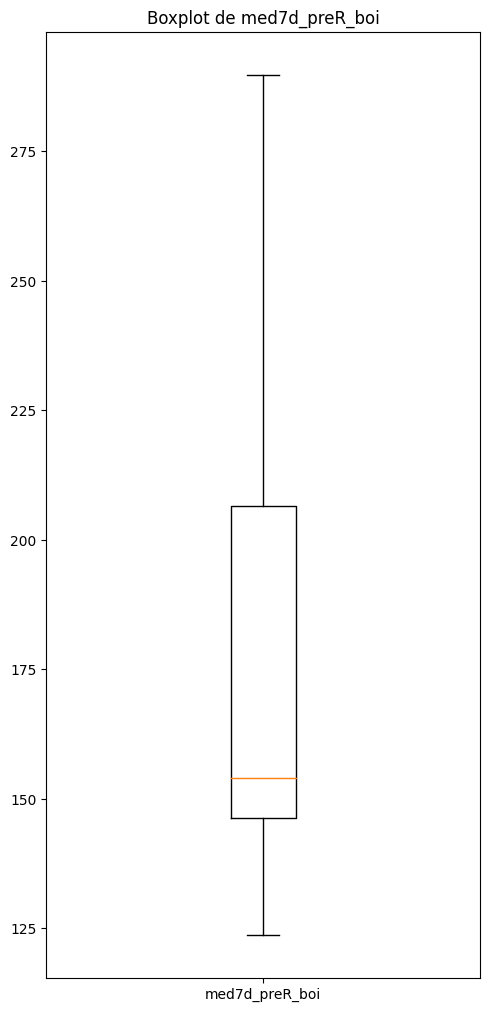

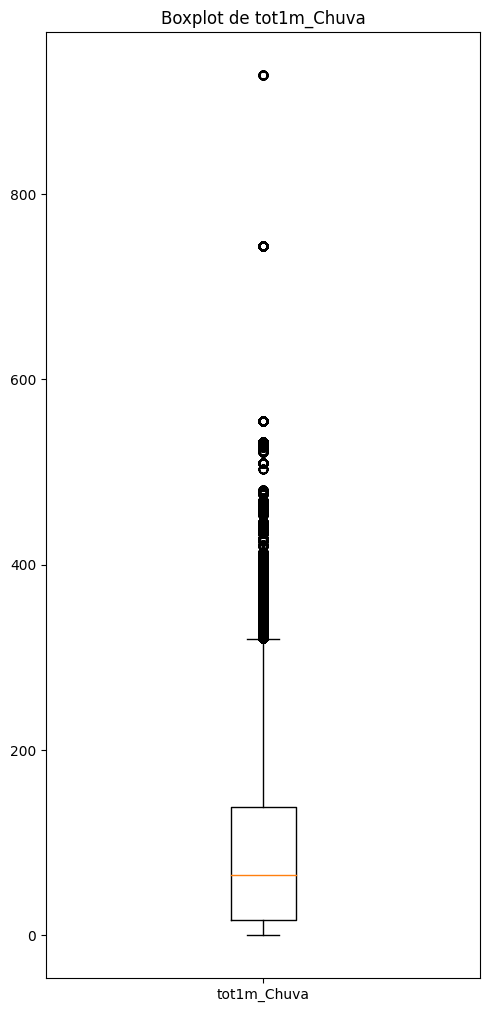

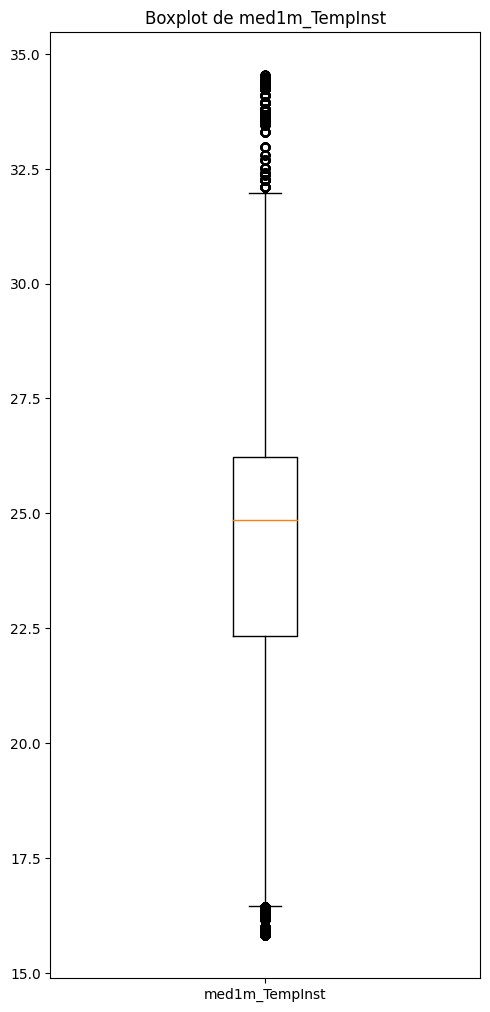

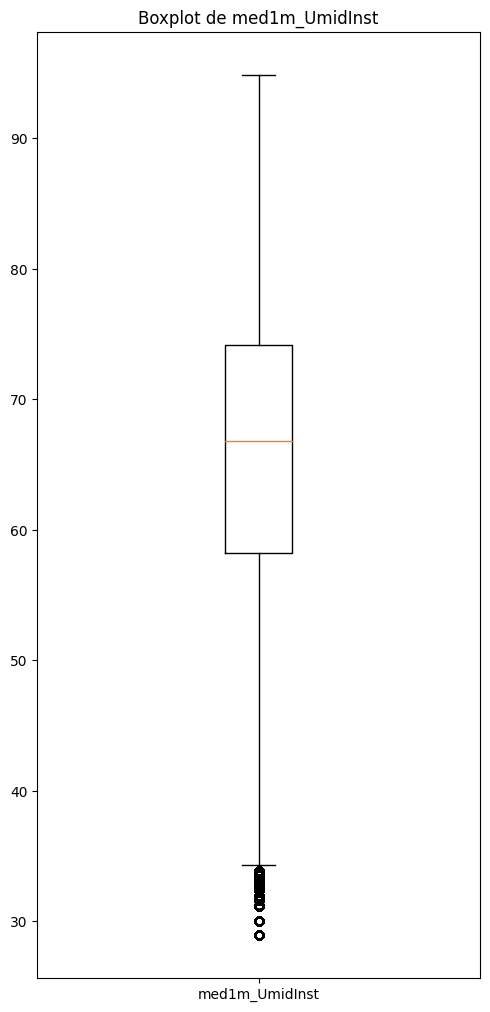

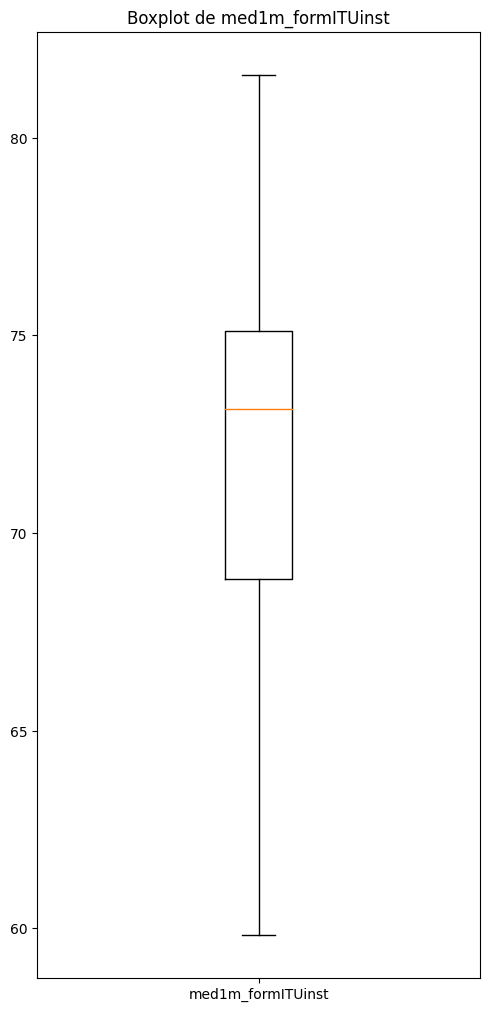

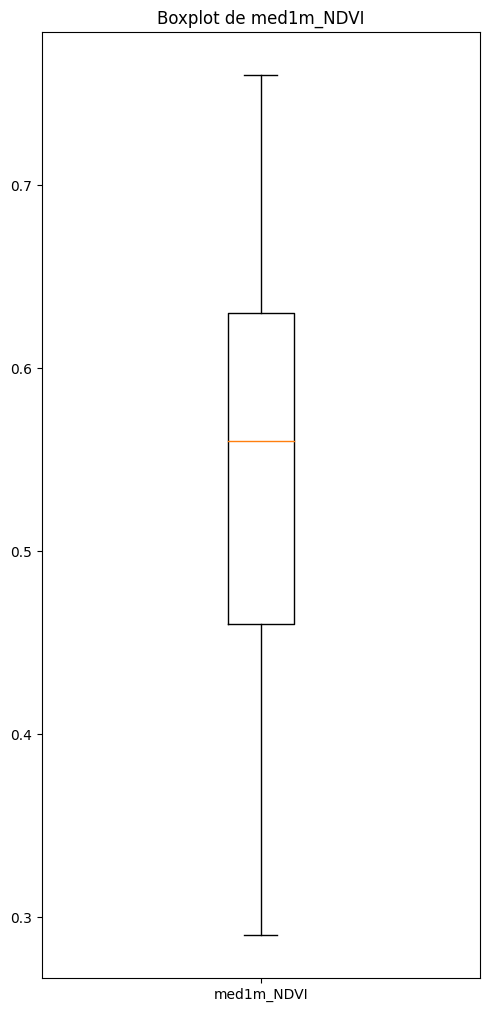

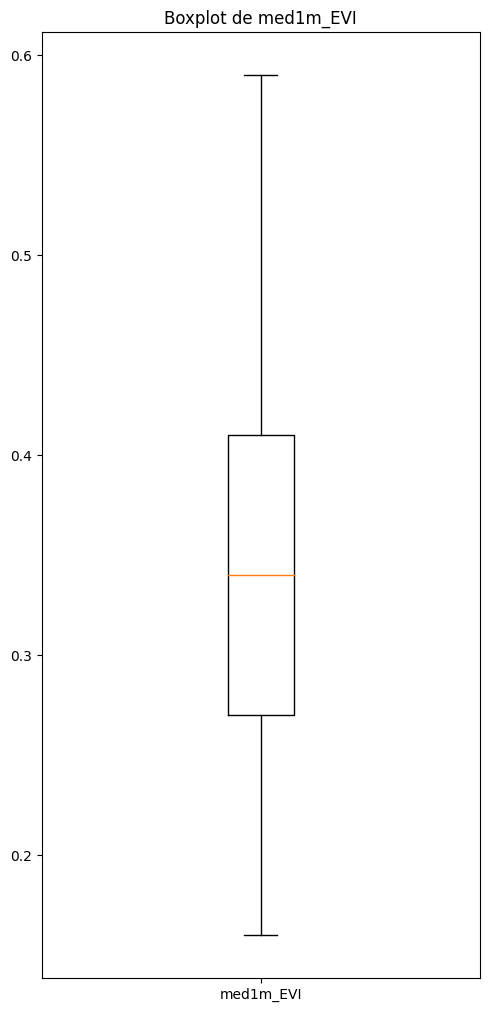

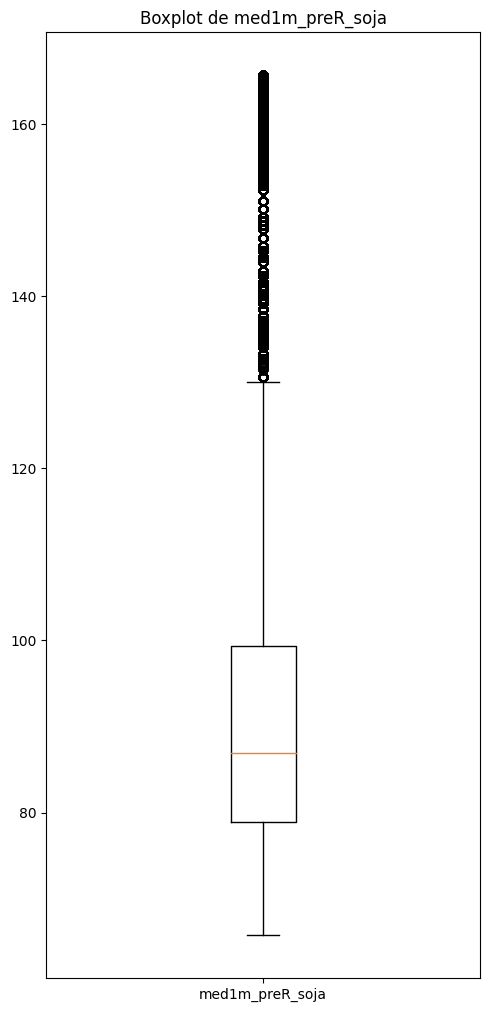

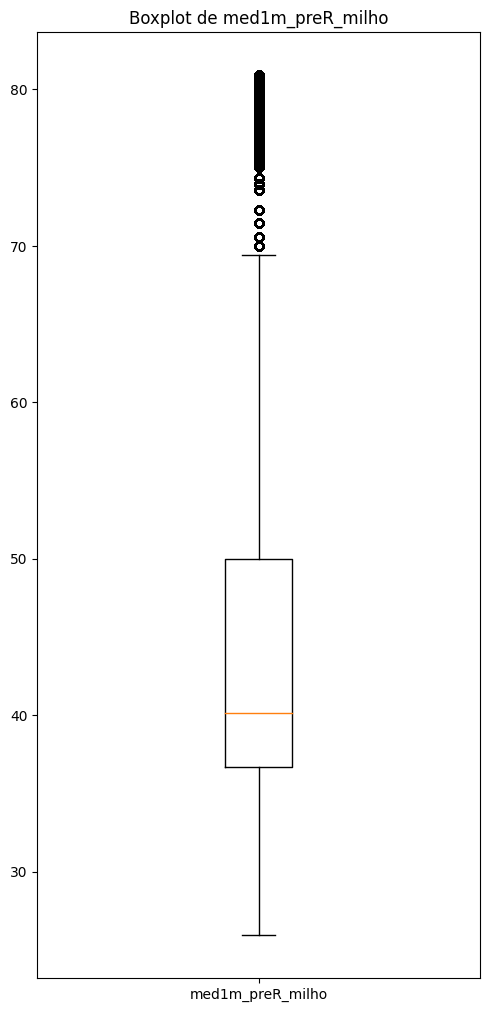

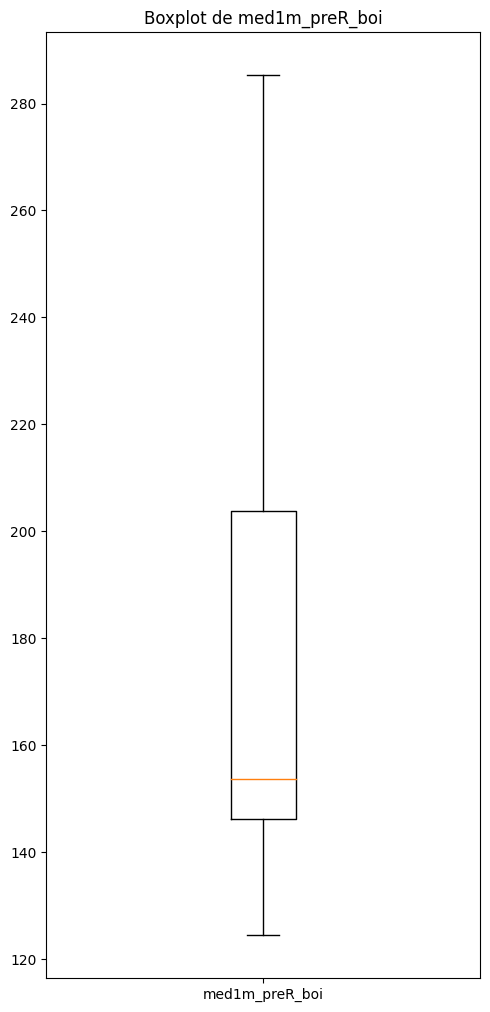

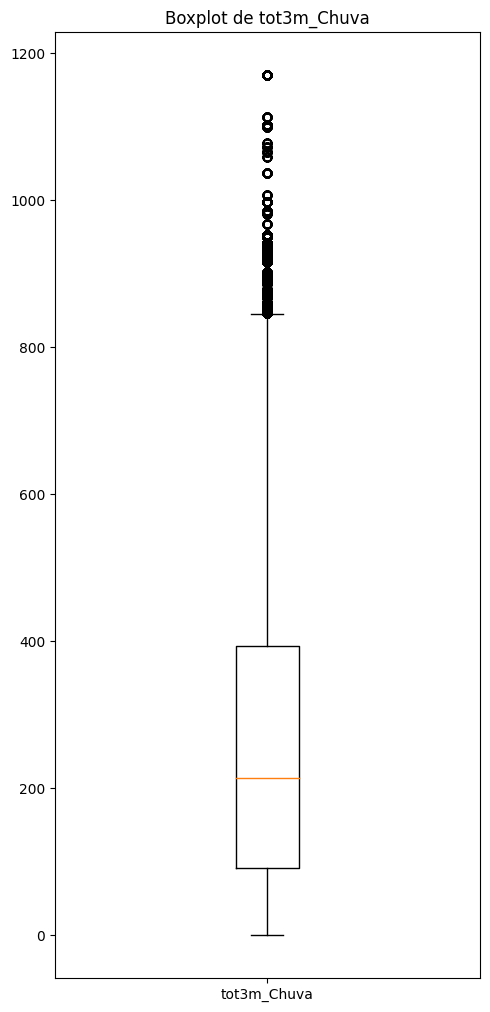

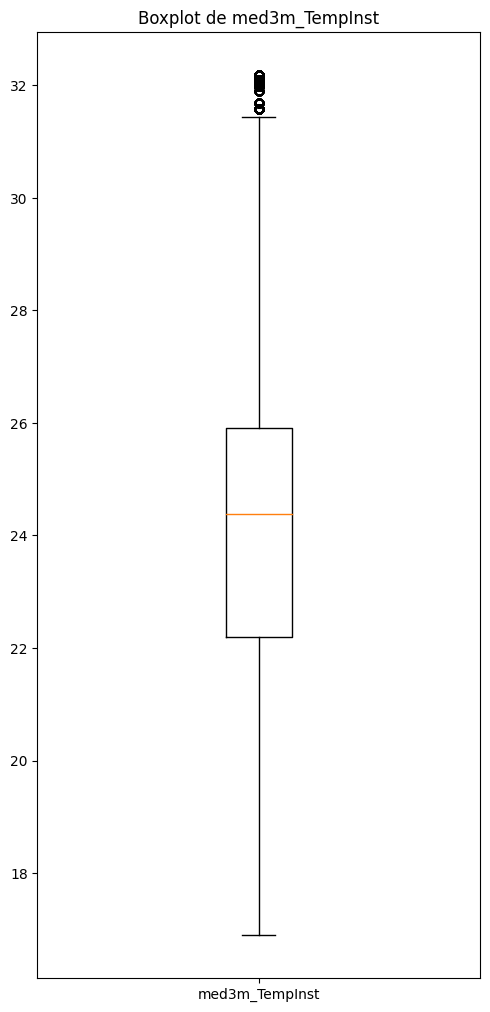

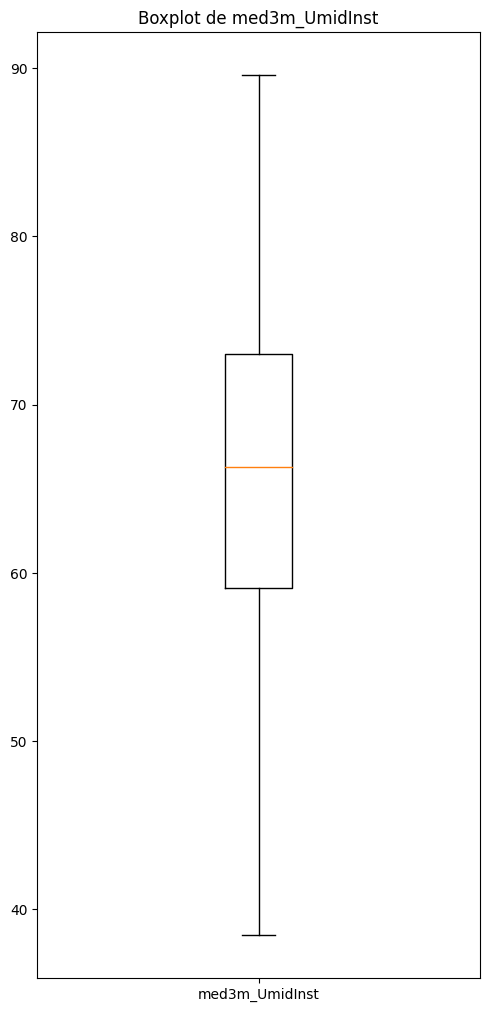

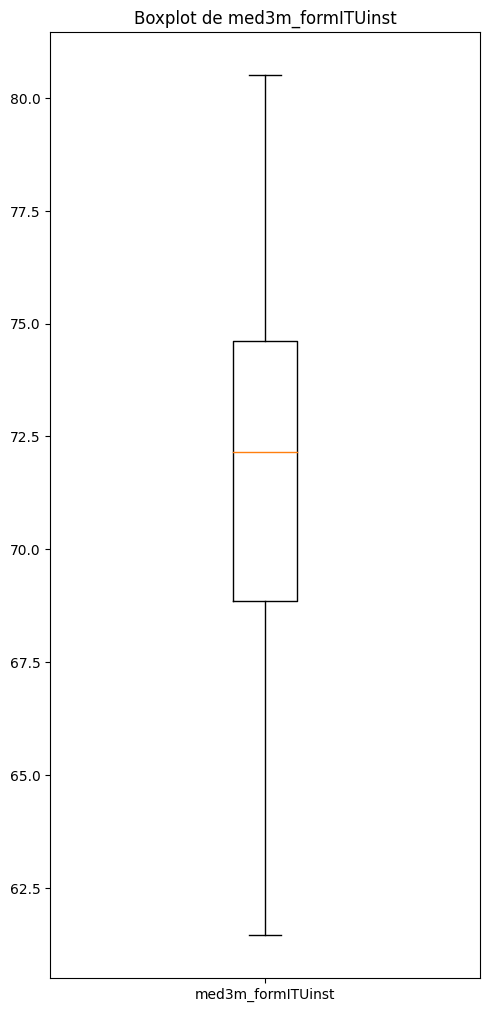

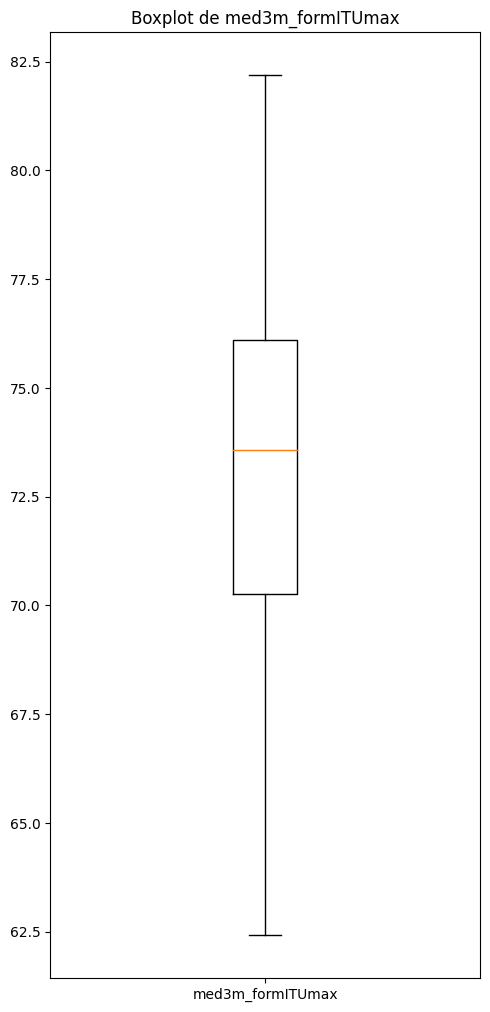

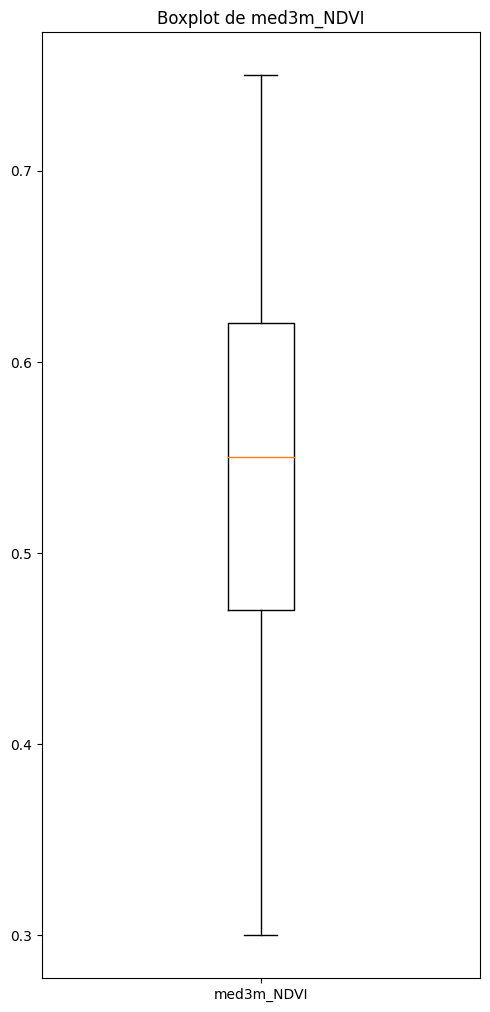

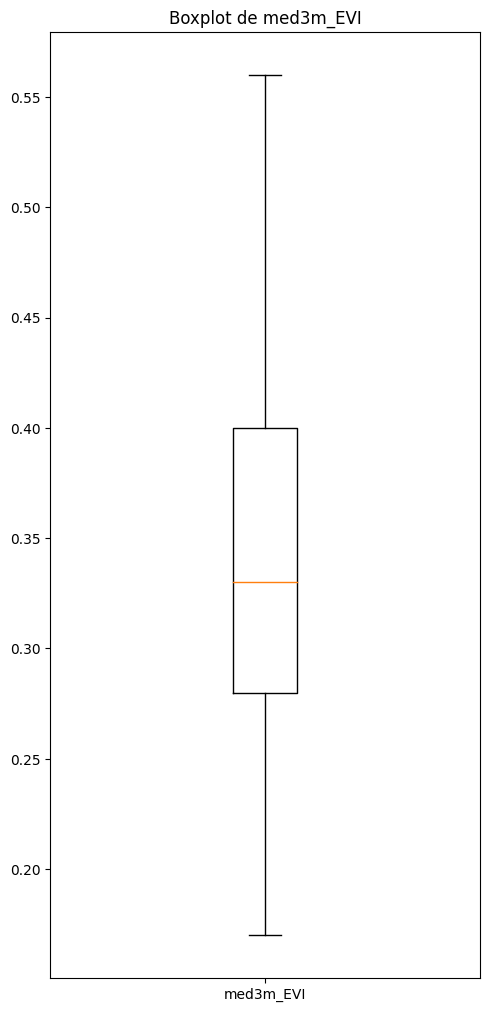

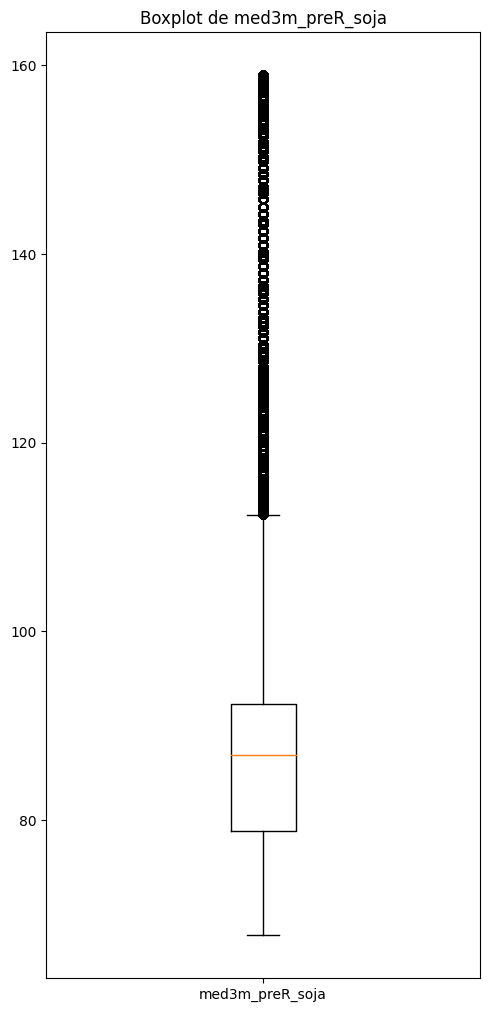

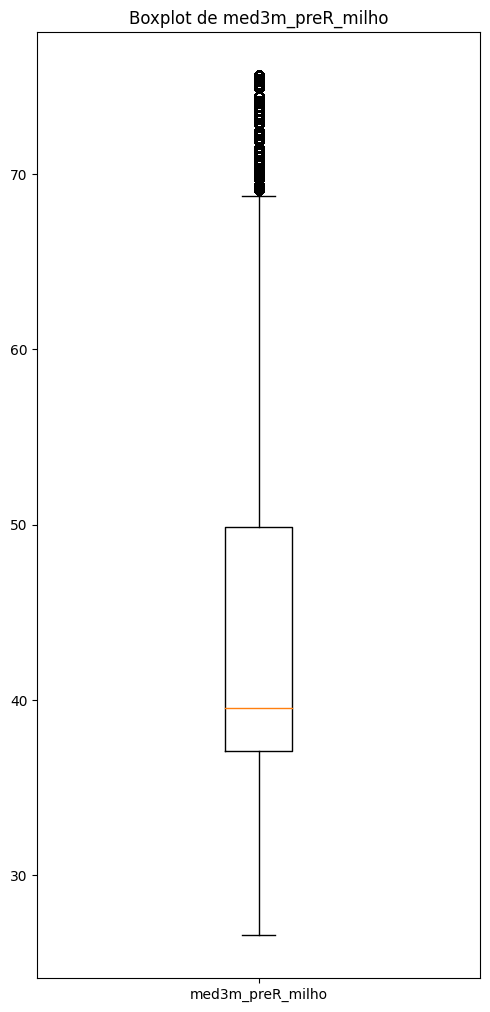

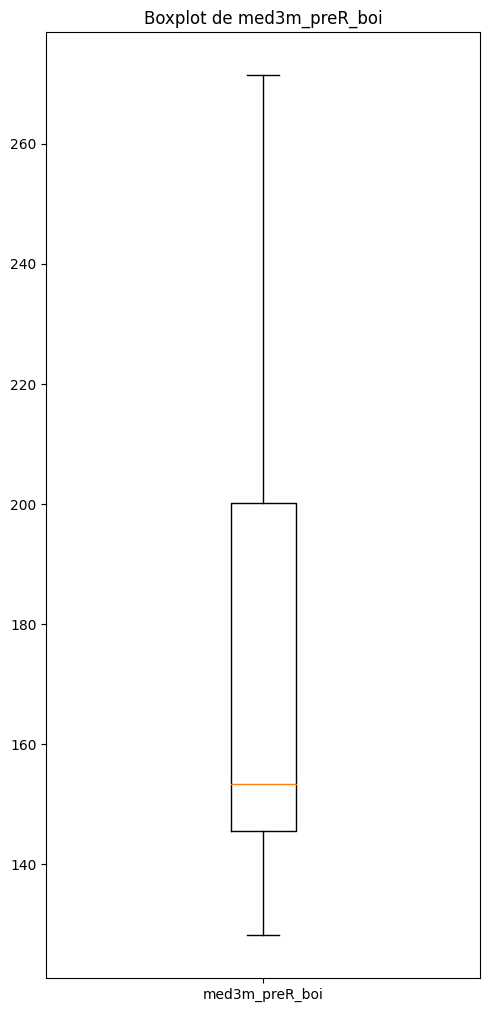

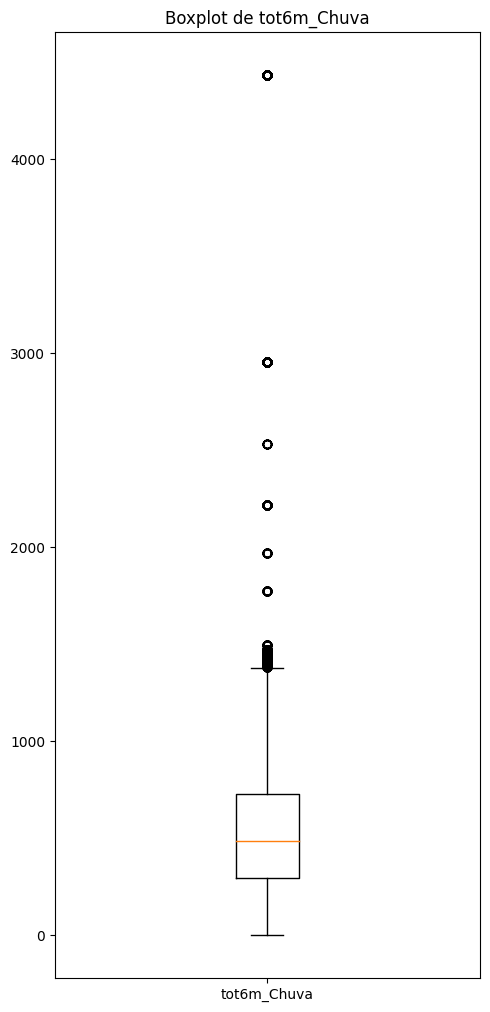

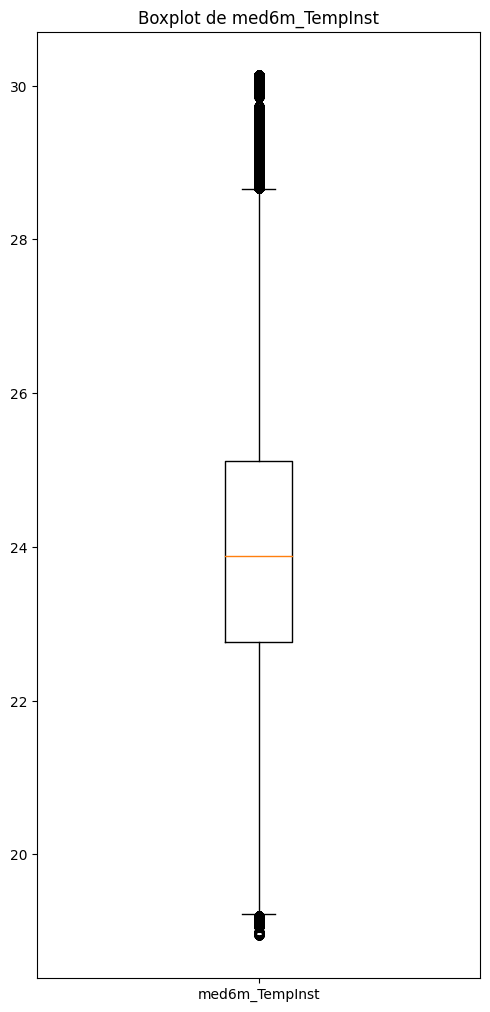

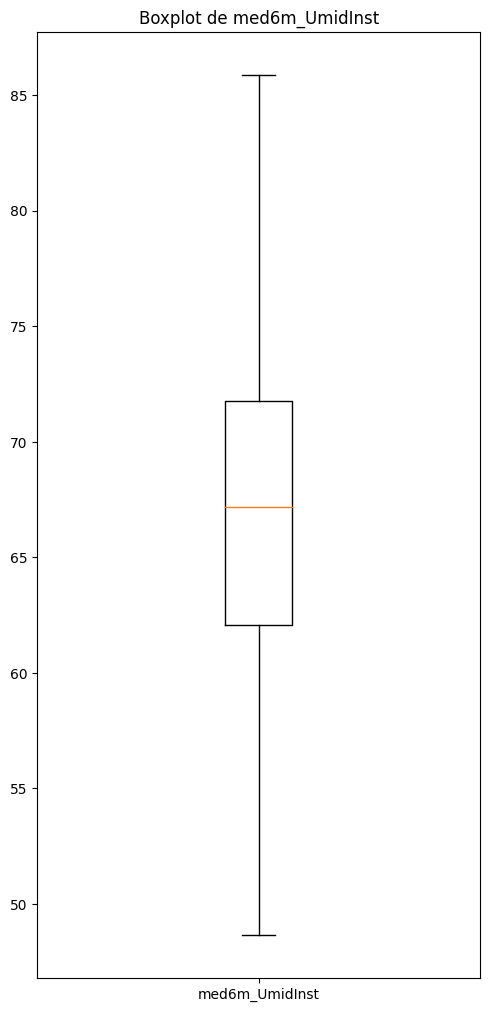

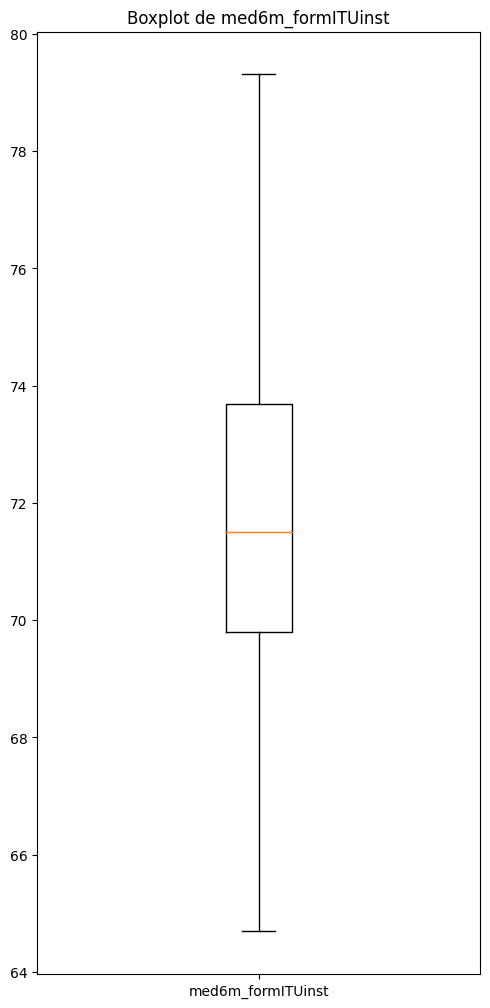

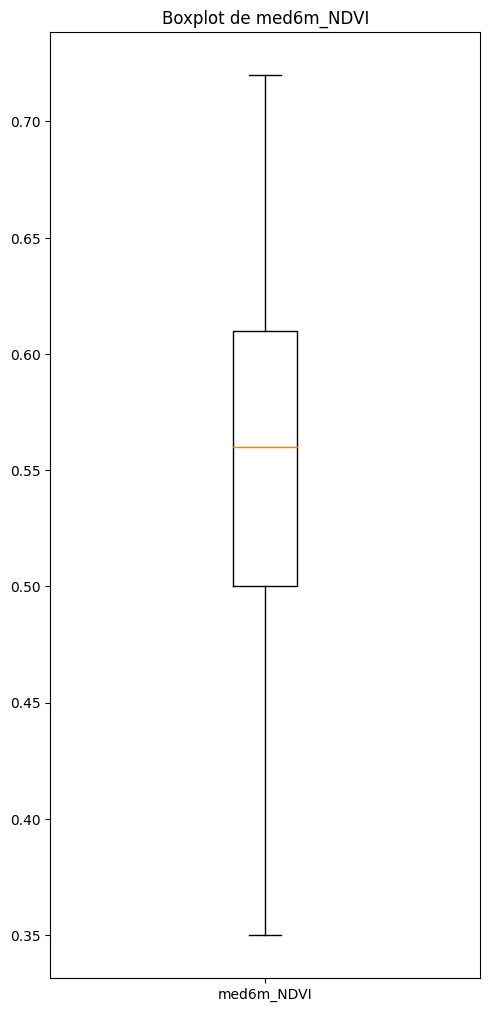

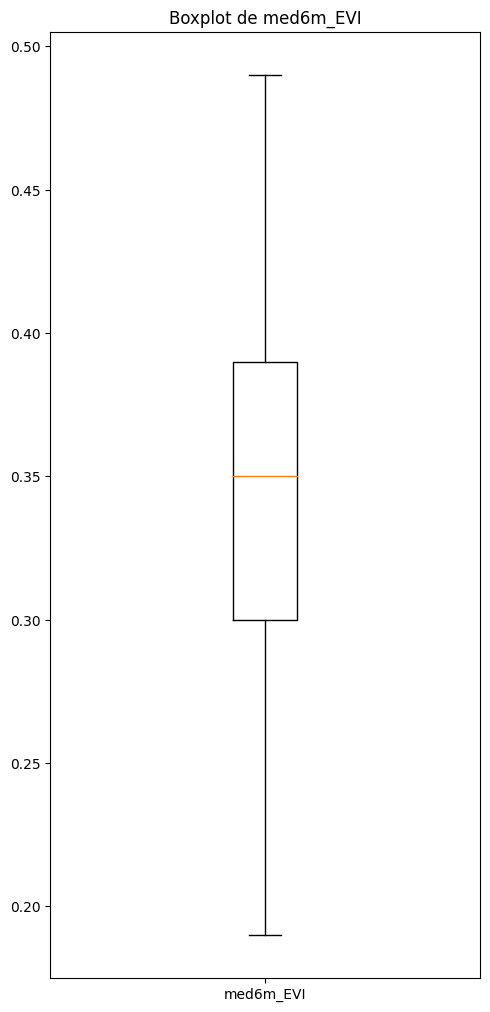

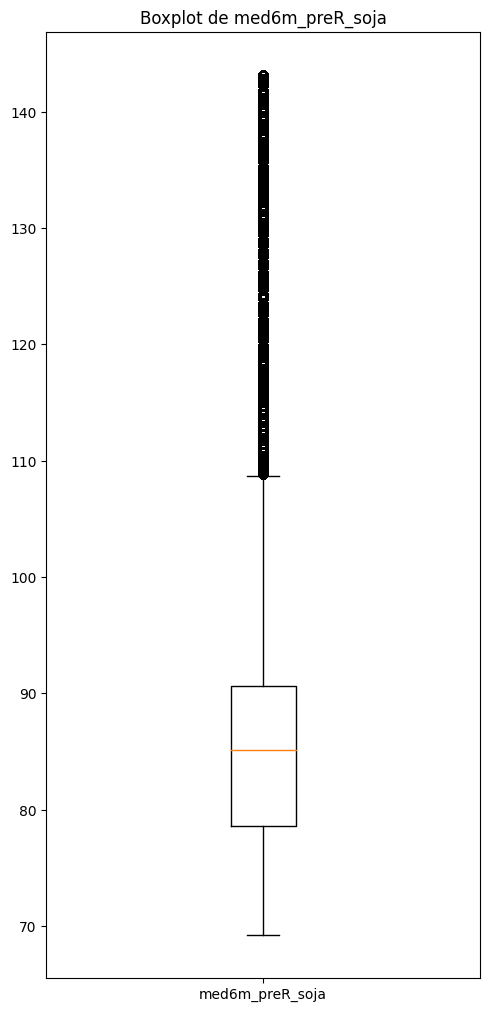

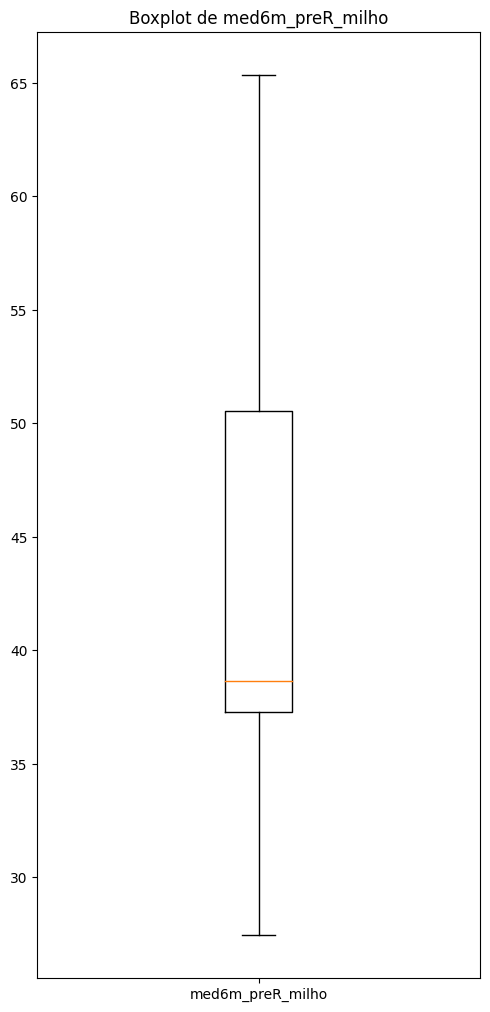

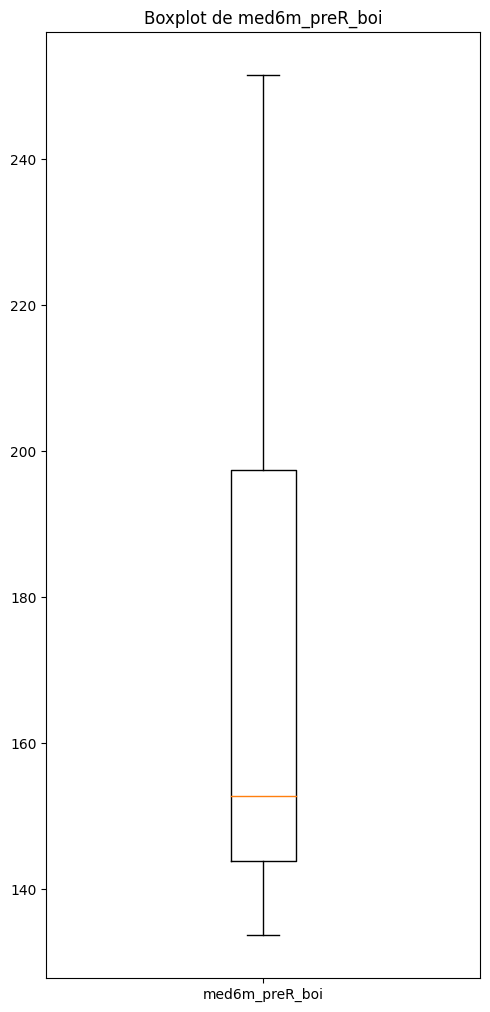

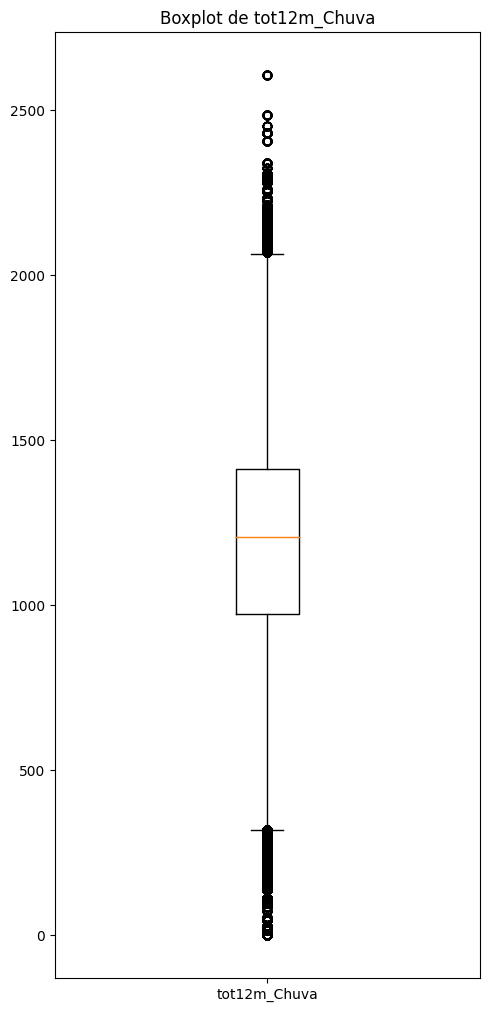

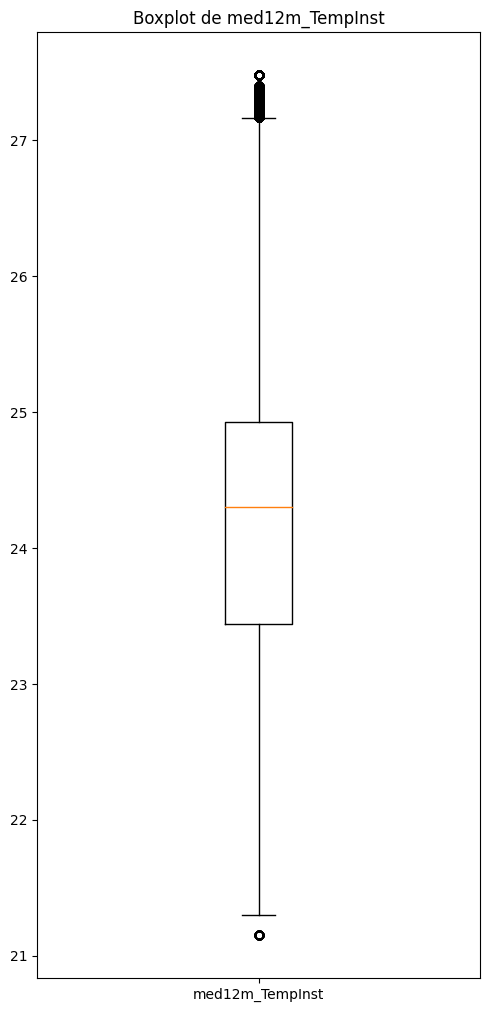

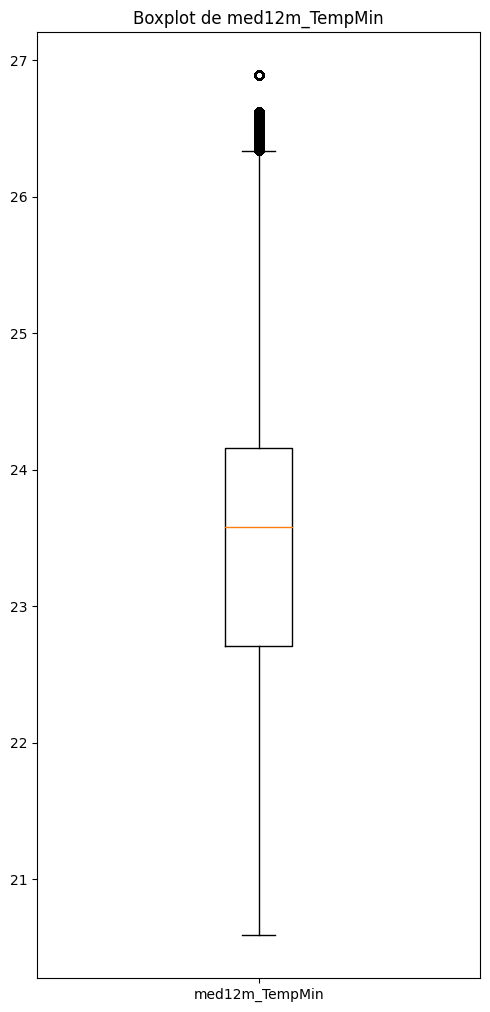

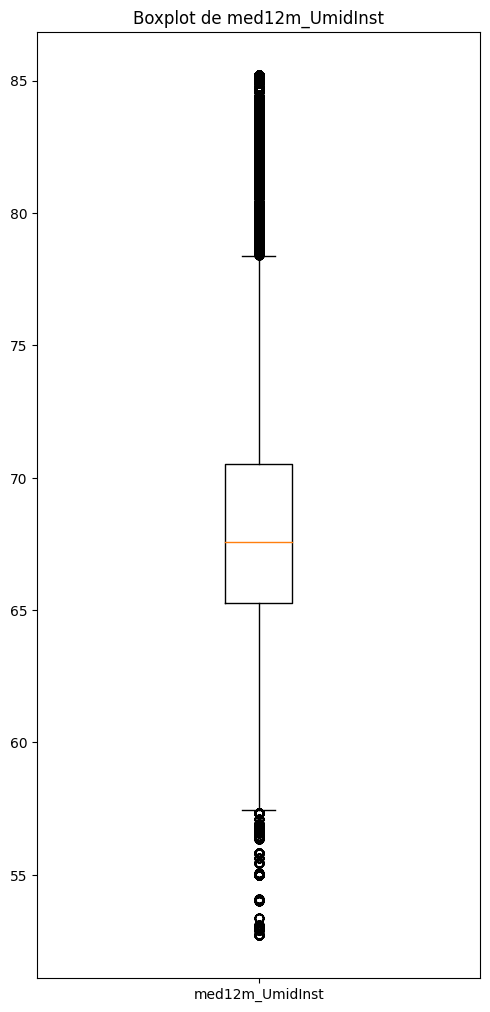

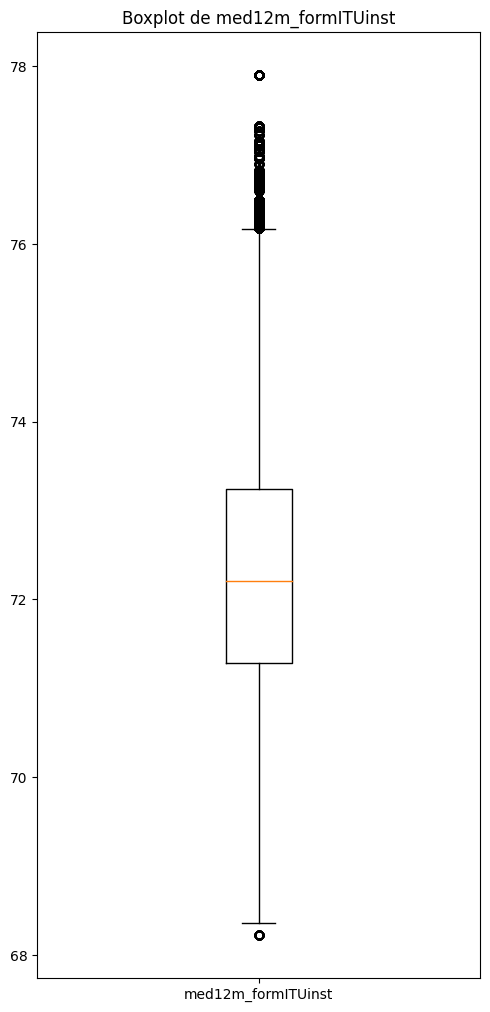

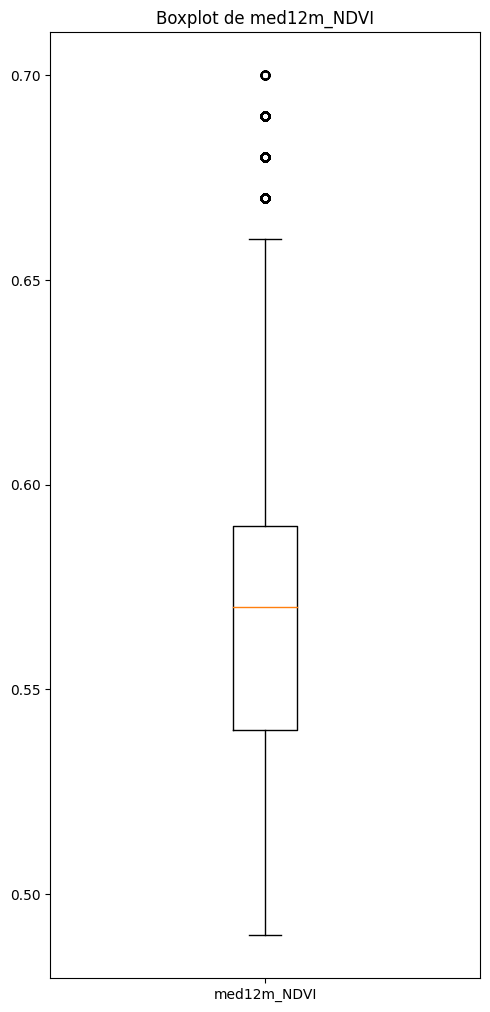

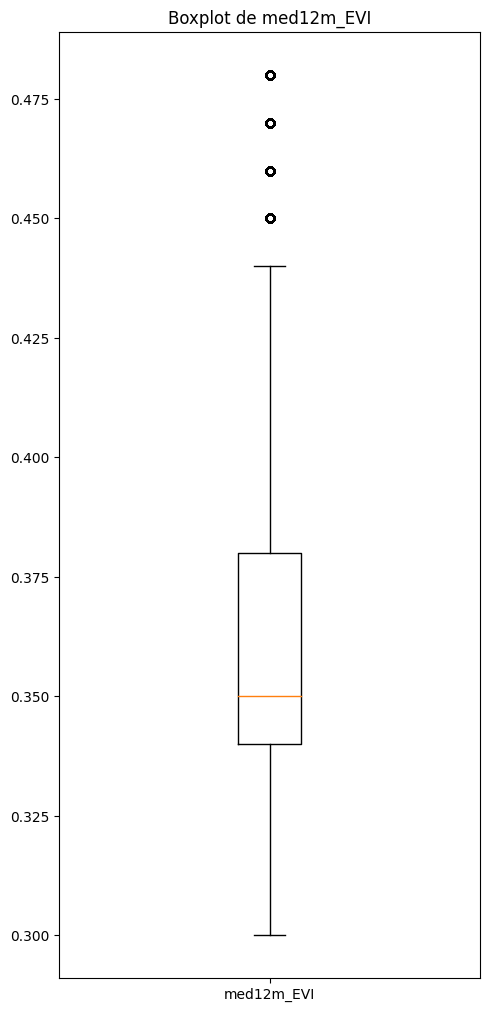

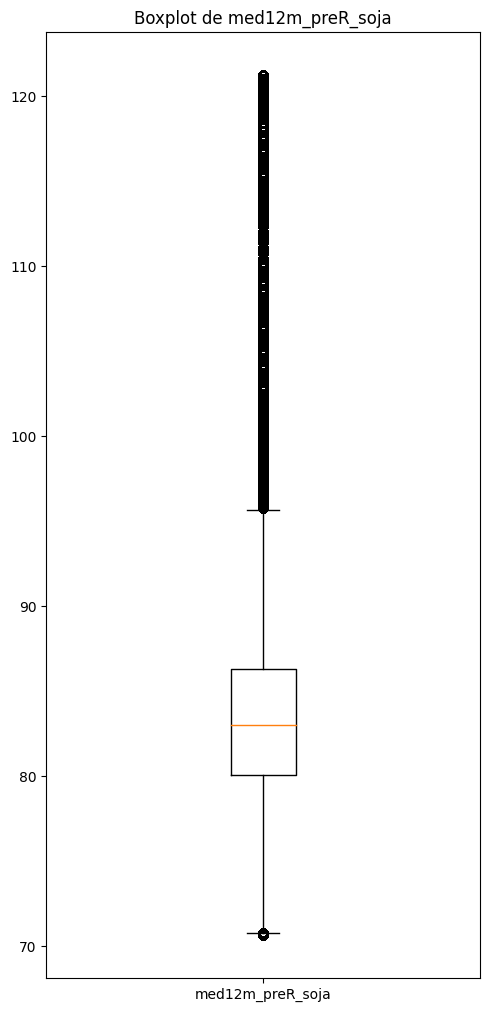

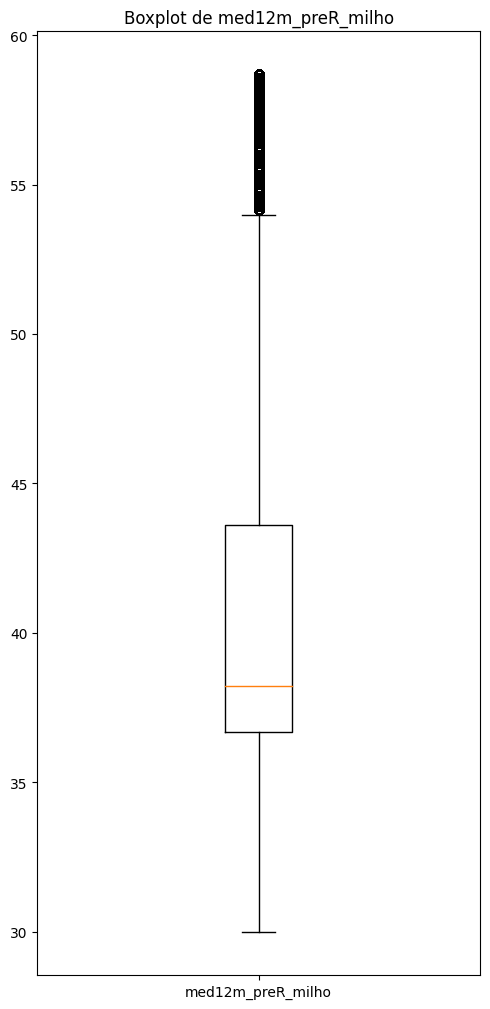

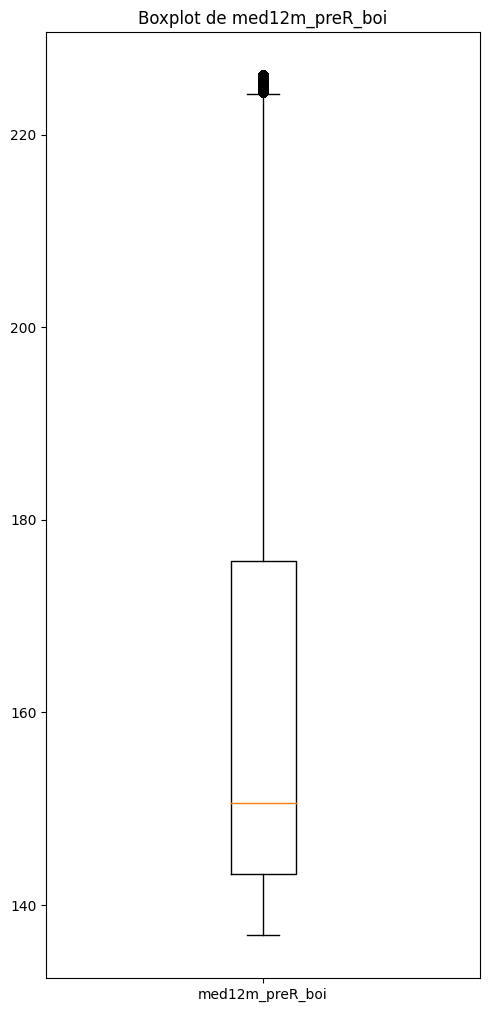

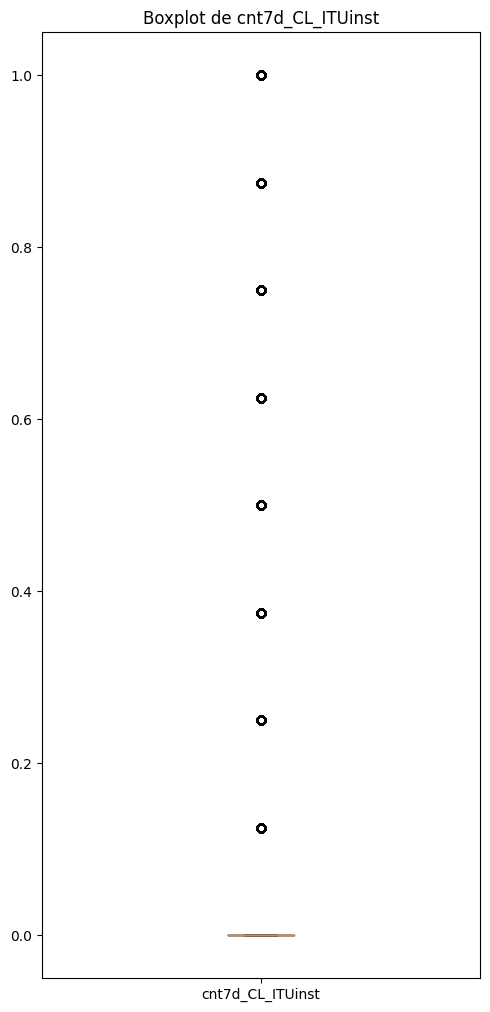

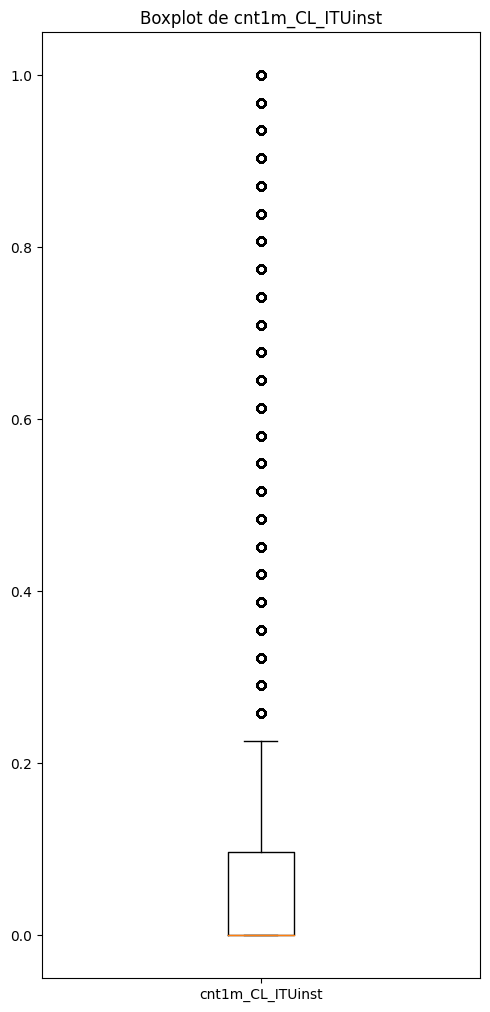

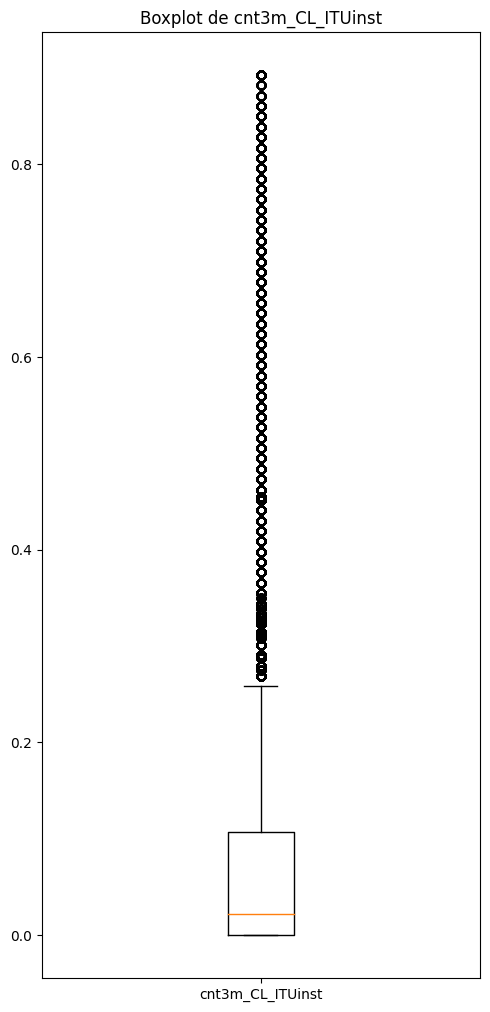

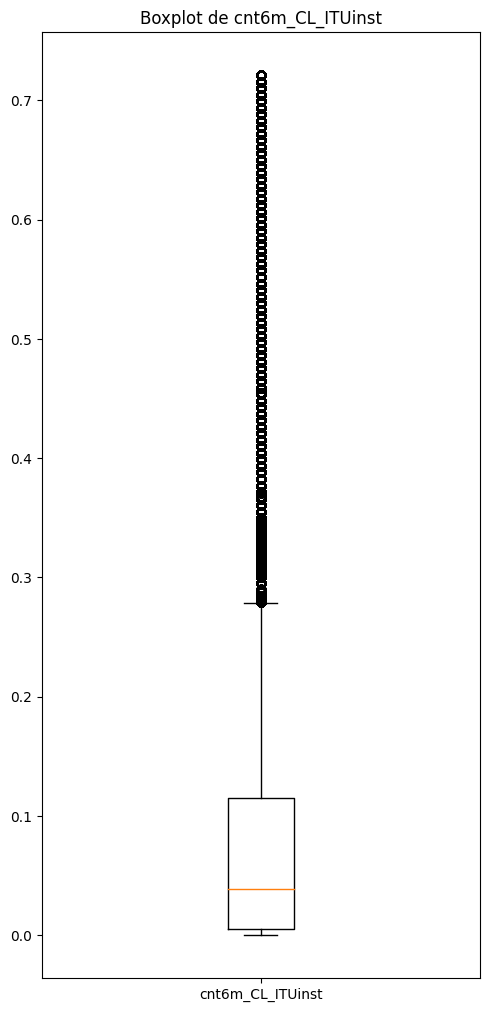

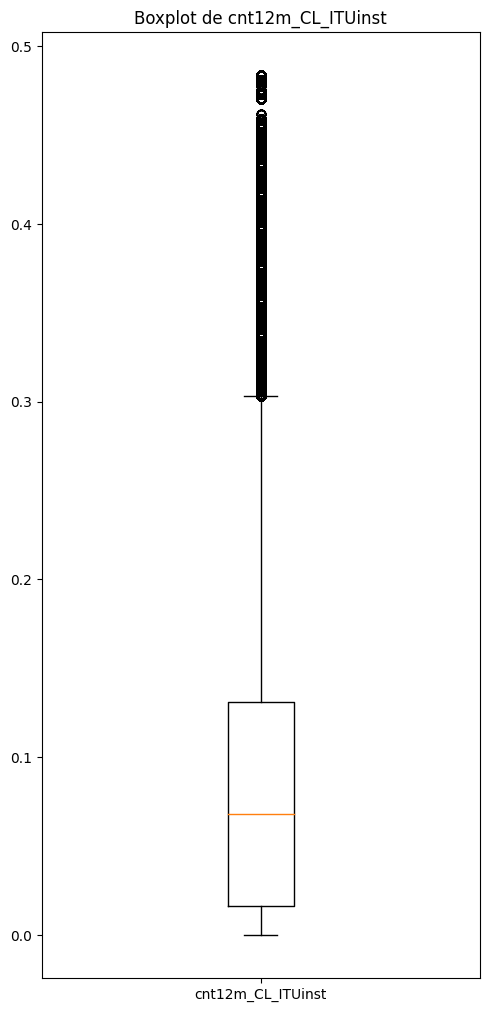



*****FIM IMPRIMIR BOXPLOT******
Function boxplot Took 0:01:45.636059



In [5]:
# Print boxplot for each attribute
reports.boxplot(data_frame=precoce_ms_data_frame)

## Complete data set after pre-processing steps

### Pre-processing steps

In [4]:
# Delete the duplicated rows by attribute
precoce_ms_data_frame = pre_processing.delete_duplicate_rows_by_attribute(
    data_frame=precoce_ms_data_frame, attribute_name='ID_ANIMAL', print_report=False)

precoce_ms_data_frame = utils.delete_columns(
    data_frame=precoce_ms_data_frame, delete_columns_names=['ID_ANIMAL'])

# Delete NaN rows
precoce_ms_data_frame = pre_processing.delete_nan_rows(
    data_frame=precoce_ms_data_frame, print_report=False)

# Apply ordinal encoder to the columns
precoce_ms_data_frame, settings.columns_ordinal_encoded = pre_processing.ordinal_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_ordinal_encoded=settings.columns_ordinal_encoded,
    columns_names=settings.ordinal_encoder_columns_names
)

# Apply label encoder to the columns
precoce_ms_data_frame, settings.columns_label_encoded = pre_processing.label_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_label_encoded=settings.columns_label_encoded,
    columns_names=settings.label_encoder_columns_names
)

# Apply one hot encoder to the columns
precoce_ms_data_frame, settings.columns_one_hot_encoded = pre_processing.one_hot_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_one_hot_encoded=settings.columns_one_hot_encoded,
    columns_names=settings.one_hot_encoder_columns_names
)

# Apply min max scaler to the columns
precoce_ms_data_frame, settings.columns_min_max_scaled = pre_processing.min_max_scaler_columns(
    data_frame=precoce_ms_data_frame, columns_min_max_scaled=settings.columns_min_max_scaled,
    columns_names=settings.min_max_scaler_columns_names
)

# Move the target column to the last position in dataframe
precoce_ms_data_frame = utils.move_cloumns_last_positions(
    data_frame=precoce_ms_data_frame, columns_names=['CATEGORIA', settings.class_column])

reports.informations(precoce_ms_data_frame)


*****INICIO DELETE DUPLICATE ROWS BY ATTRIBUTE******
Linhas duplicadas encontradas para o atributo ID_ANIMAL.
Linhas duplicadas deletadas.
*****FIM DELETE DUPLICATE ROWS BY ATTRIBUTE*********
Function delete_duplicate_rows_by_attribute Took 0:00:01.920824

*****INICIO DELETE COLUNAS******
Coluna ID_ANIMAL excluída.
*****FIM DELETE COLUNAS*********

*****INICIO DELETE NAN ROWS******
Linhas com valores NaN encontradas.
*****FIM DELETE NAN ROWS*********
Function delete_nan_rows Took 0:00:01.056741


*****INICIO ORDINAL ENCODER******
!!!>>> Coluna Maturidade não encontrada no DataFrame para ordinal encoding.
!!!>>> Coluna Acabamento não encontrada no DataFrame para ordinal encoding.
*****FIM ORDINAL ENCODER*********
Function ordinal_encoder_columns Took 0:00:00.927021


*****INICIO LABEL ENCODER******
*****FIM LABEL ENCODER*********
Function label_encoder_columns Took 0:00:00.790845


*****INICIO ONE-HOT ENCODER******
*****INICIO DELETE COLUNAS******
Coluna Tipificacao excluída.
*****FIM 

### Generate the latex table

In [8]:
reports.informations(precoce_ms_data_frame)


*****INICIO PRINT INFOS******
Número total de linhas do DataFrame: 2973076
Número de colunas: 34
Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2973076 entries, 60 to 3153592
Data columns (total 34 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   QuestionarioClassificacaoEstabel  uint8  
 1   ILP                               uint8  
 2   IFP                               uint8  
 3   ILPF                              uint8  
 4   QuestionarioPossuiOutrosIncentiv  uint8  
 5   QuestionarioFabricaRacao          uint8  
 6   regua de manejo                   UInt8  
 7   identificacao individual          UInt8  
 8   rastreamento SISBOV               UInt8  
 9   participa de aliancas mercadolog  UInt8  
 10  QuestionarioPraticaRecuperacaoPa  uint8  
 11  Confinamento                      UInt8  
 12  Suplementacao_a_campo             UInt8  
 13  SemiConfinamento                  UInt8  
 14  tot3m

In [10]:
precoce_ms_data_frame['CATEGORIA'].describe()

count   2973076.000000
mean          3.009223
std           1.734527
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: CATEGORIA, dtype: float64

In [27]:
precoce_ms_data_frame['CATEGORIA'].mean() / precoce_ms_data_frame['CATEGORIA'].std()

1.7348953707620383

In [26]:
precoce_ms_data_frame['CATEGORIA'].std() / precoce_ms_data_frame['CATEGORIA'].mean()

0.5764036361228853

In [24]:
summary_all_attributes = pd.DataFrame(columns=['Nome Atributo', 'Total Exemplos', 'Média', 'Desvio Padrão', 'Mínimo', 'Máximo'])

for column_name, column_data in precoce_ms_data_frame.iteritems():
    summary_all_attributes = pd.concat([summary_all_attributes, pd.DataFrame.from_records(
        [
            {
                'Nome Atributo': column_name,
                'Total Exemplos': column_data.size,
                'Média': column_data.mean(),
                'Desvio Padrão': column_data.std(),
                'Mínimo': float(column_data.min()),
                'Máximo': float(column_data.max())
            }
        ])])
with pd.option_context("max_colwidth", 1000):
    print(summary_all_attributes.to_latex(
            index=False,
            float_format="%.2f",
            # bold_rows=True,
            # column_format='cccp{20cm}',
            column_format='|c|c|c|c|c|c|',
            escape=True,
            # col_space=30,
            longtable=True,
        ))

\begin{longtable}{|c|c|c|c|c|c|}
\toprule
                   Nome Atributo & Total Exemplos &  Média &  Desvio Padrão &  Mínimo &  Máximo \\
\midrule
\endfirsthead

\toprule
                   Nome Atributo & Total Exemplos &  Média &  Desvio Padrão &  Mínimo &  Máximo \\
\midrule
\endhead
\midrule
\multicolumn{6}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
QuestionarioClassificacaoEstabel &        2973076 &   1.68 &           0.78 &    0.00 &    3.00 \\
                             ILP &        2973076 &   0.42 &           0.49 &    0.00 &    1.00 \\
                             IFP &        2973076 &   0.05 &           0.21 &    0.00 &    1.00 \\
                            ILPF &        2973076 &   0.04 &           0.19 &    0.00 &    1.00 \\
QuestionarioPossuiOutrosIncentiv &        2973076 &   0.05 &           0.22 &    0.00 &    1.00 \\
        QuestionarioFabricaRacao &        2973076 &   0.63 &           0.48 &    0.00 &    1.00 \\
              

/tmp/ipykernel_24905/440175592.py:21: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(summary_all_attributes.to_latex(


## Aggregated data set after pre-processing steps

### Pre-processing steps

In [8]:
precoce_ms_data_frame['CATEGORIA_BINARIA']

0         Alta qualidade
1        Baixa qualidade
2         Alta qualidade
3         Alta qualidade
4         Alta qualidade
              ...       
49636    Baixa qualidade
49637    Baixa qualidade
49638    Baixa qualidade
49639     Alta qualidade
49640     Alta qualidade
Name: CATEGORIA_BINARIA, Length: 49641, dtype: category
Categories (2, object): ['Baixa qualidade', 'Alta qualidade']

In [13]:
print('Total "Alta qualidade": {}'.format(precoce_ms_data_frame[precoce_ms_data_frame['CATEGORIA_BINARIA'] == 'Alta qualidade']['CATEGORIA_BINARIA'].count()))
print('Total "Baixa qualidade": {}'.format(precoce_ms_data_frame[precoce_ms_data_frame['CATEGORIA_BINARIA'] == 'Baixa qualidade']['CATEGORIA_BINARIA'].count()))

Total "Alta qualidade": 23440
Total "Baixa qualidade": 23296


In [5]:
# Delete the duplicated rows by attribute
precoce_ms_data_frame = pre_processing.delete_duplicate_rows_by_attribute(
    data_frame=precoce_ms_data_frame, attribute_name='ID_ANIMAL', print_report=False)

precoce_ms_data_frame = utils.delete_columns(
    data_frame=precoce_ms_data_frame, delete_columns_names=['ID_ANIMAL'])

# Delete NaN rows
precoce_ms_data_frame = pre_processing.delete_nan_rows(
    data_frame=precoce_ms_data_frame, print_report=False)

# Apply ordinal encoder to the columns
precoce_ms_data_frame, settings.columns_ordinal_encoded = pre_processing.ordinal_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_ordinal_encoded=settings.columns_ordinal_encoded,
    columns_names=settings.ordinal_encoder_columns_names
)

# Apply label encoder to the columns
precoce_ms_data_frame, settings.columns_label_encoded = pre_processing.label_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_label_encoded=settings.columns_label_encoded,
    columns_names=settings.label_encoder_columns_names
)

# Apply one hot encoder to the columns
precoce_ms_data_frame, settings.columns_one_hot_encoded = pre_processing.one_hot_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_one_hot_encoded=settings.columns_one_hot_encoded,
    columns_names=settings.one_hot_encoder_columns_names
)

# Apply min max scaler to the columns
precoce_ms_data_frame, settings.columns_min_max_scaled = pre_processing.min_max_scaler_columns(
    data_frame=precoce_ms_data_frame, columns_min_max_scaled=settings.columns_min_max_scaled,
    columns_names=settings.min_max_scaler_columns_names
)

# Move the target column to the last position in dataframe
precoce_ms_data_frame = utils.move_cloumns_last_positions(
    data_frame=precoce_ms_data_frame, columns_names=[settings.class_column])

reports.informations(precoce_ms_data_frame)


*****INICIO DELETE DUPLICATE ROWS BY ATTRIBUTE******
!!!>>> Atributo ID_ANIMAL não encontrado no DataFrame para delete duplicates rows by attibute.
*****FIM DELETE DUPLICATE ROWS BY ATTRIBUTE*********
Function delete_duplicate_rows_by_attribute Took 0:00:00.001085

*****INICIO DELETE COLUNAS******
!!!>>> Coluna " ID_ANIMAL " não encontrada no DataFrame para exclusão.
*****FIM DELETE COLUNAS*********

*****INICIO DELETE NAN ROWS******
Linhas com valores NaN encontradas.
*****FIM DELETE NAN ROWS*********
Function delete_nan_rows Took 0:00:00.033101


*****INICIO ORDINAL ENCODER******
*****FIM ORDINAL ENCODER*********
Function ordinal_encoder_columns Took 0:00:00.007024


*****INICIO LABEL ENCODER******
*****FIM LABEL ENCODER*********
Function label_encoder_columns Took 0:00:00.015319


*****INICIO ONE-HOT ENCODER******
*****INICIO DELETE COLUNAS******
Coluna Tipificacao excluída.
*****FIM DELETE COLUNAS*********
*****FIM ONE-HOT ENCODER*********
Function one_hot_encoder_columns Took 0:0

### Generate the latex table

In [5]:
summary_all_attributes = pd.DataFrame(columns=['Nome Atributo', 'Total Exemplos', 'Média', 'Desvio Padrão', 'Mínimo', 'Máximo'])

for column_name, column_data in precoce_ms_data_frame.iteritems():
    summary_all_attributes = pd.concat([summary_all_attributes, pd.DataFrame.from_records(
        [
            {
                'Nome Atributo': column_name,
                'Total Exemplos': column_data.size,
                'Média': column_data.mean(),
                'Desvio Padrão': column_data.std(),
                'Mínimo': float(column_data.min()),
                'Máximo': float(column_data.max())
            }
        ])])
with pd.option_context("max_colwidth", 1000):
    print(summary_all_attributes.to_latex(
            index=False,
            float_format="%.2f",
            # bold_rows=True,
            # column_format='cccp{20cm}',
            column_format='|c|c|c|c|c|c|',
            escape=True,
            # col_space=30,
            longtable=True,
        ))

\begin{longtable}{|c|c|c|c|c|c|}
\toprule
                   Nome Atributo & Total Exemplos &  Média &  Desvio Padrão &  Mínimo &  Máximo \\
\midrule
\endfirsthead

\toprule
                   Nome Atributo & Total Exemplos &  Média &  Desvio Padrão &  Mínimo &  Máximo \\
\midrule
\endhead
\midrule
\multicolumn{6}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
                QTD\_ANIMAIS\_LOTE &          46736 &   0.06 &           0.08 &    0.00 &    1.00 \\
                 PESO\_MEDIO\_LOTE &          46736 &   0.23 &           0.09 &    0.00 &    1.00 \\
QuestionarioClassificacaoEstabel &          46736 &   1.60 &           0.74 &    0.00 &    3.00 \\
                             ILP &          46736 &   0.39 &           0.49 &    0.00 &    1.00 \\
                             IFP &          46736 &   0.05 &           0.22 &    0.00 &    1.00 \\
                            ILPF &          46736 &   0.03 &           0.18 &    0.00 &    1.00 \\
Questionar

/tmp/ipykernel_36153/235589717.py:16: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(summary_all_attributes.to_latex(
